In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import TOFPET_cal_lib as TPcal

%matplotlib nbagg
%load_ext autoreload
%autoreload 2

# DATA SELECTION

In [ ]:
filename = "/home/viherbos/DATA_daq/CAL_data/calibration_tpulse_nocompressor_210713.h5"
channel = 63
tac     = 3
tpulse  = 359500
data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data_fit = data[data['delay']==tpulse]
#plt.figure()
#plt.plot((data['tfine']))
#delays = np.unique(data_tc['delay'].to_numpy())
#print(delays)

  # GAUSSIAN FITTING FOR SELECTED TFINE DATA

fig = plt.figure()
axis = fig.add_subplot(121)
axis2 = fig.add_subplot(122)

#data_sel = data[(data['tfine']>390) & (data['tfine']<407)]
rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
#coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,True,axis2)

# Two distributions
#print(np.std(data_fit['tfine'].to_numpy()))
if  np.std(data_fit['tfine'].to_numpy())> 10 :
    
    # Fit Left   
    data_fit_sel = data_fit[data_fit['tfine']<(rango_fit/2.0 + np.min(data_fit['tfine']))]
    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
    coeff_l,coeff_err_l,moda_l,sigma_l,chi_l = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,True,axis)
    
    data_fit_sel = data_fit[data_fit['tfine']>(rango_fit/2.0 + np.min(data_fit['tfine']))]
    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
    coeff_d,coeff_err_d,moda_d,sigma_d,chi_d = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,True,axis2)
    
    
else:
    # Usual case
    print('3')
    coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,True,axis)
    coeff_l = coeff_d = coeff
    coeff_err_l = coeff_err_d =coeff_err
    moda_d = moda_l = moda
    sigma_d = sigma_l = sigma
    chi_d = chi_l = chi
    # Fit fails with narrow distribution
    if (sigma < 1.5) :
        print("Fit failure")
        print('4')
        coeff,coeff_err,chi=TPcal.gauss_fit(data_fit['tfine'],rango_fit,True,axis)
        moda = coeff[1]
        sigma = coeff[2]
        coeff_l = coeff_d = coeff
        coeff_err_l = coeff_err_d =coeff_err
        moda_d = moda_l = moda
        sigma_d = sigma_l = sigma
        chi_d = chi_l = chi
                    
print(i,ch,tc,moda_l,sigma_l,chi_l)
print(i,ch,tc,moda_d,sigma_d,chi_d)
#axis.plot(TPcal.semigauss(np.arange(0,410), 400, 3, -10,100))


In [ ]:
fig = plt.figure()
axis = fig.add_subplot(121)
axis2 = fig.add_subplot(122)

#data_sel = data[(data['tfine']>390) & (data['tfine']<407)]
rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,True,axis2)

In [ ]:
ASIC = 'asic0'

# GAUSSIAN FITTING FOR ALL TFINE DATA

In [145]:
filename = "/home/viherbos/DATA_daq/CAL_data/calibration_tpulse_nocompressor_210713.h5"  #ASIC + "_tdc_tpulse.h5"

channels = range(0,64)
tacs = range(0,4)
        
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Find delay arrays
        delays = np.unique(data_tc['delay'].to_numpy())
                
        for i in delays: #np.arange(0,360,0.5):
            data_fit = data_tc[data_tc['delay']==i]
            if data_fit.size > 0:

                rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
                values,bins = np.histogram(data_fit['tfine'],rango_fit)
                peak = bins[np.argmax(values)]
                
                # Two distributions
                if  np.std(data_fit['tfine'].to_numpy())> 10 :
                
                        # Fit Left   
                    data_fit_sel = data_fit[data_fit['tfine']<(rango_fit/2.0 + np.min(data_fit['tfine']))]
                    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                    if (rango_fit_sel==0):
                        #Only one bin left
                        moda_l,sigma_l,chi_l = [np.min(data_fit_sel['tfine']),1,0]
                    else:    
                        coeff_l,coeff_err_l,moda_l,sigma_l,chi_l = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,False)
                    
                    data_fit_sel = data_fit[data_fit['tfine']>(rango_fit/2.0 + np.min(data_fit['tfine']))]
                    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                    if (rango_fit_sel==0):
                        #Only one bin left
                        moda_d,sigma_d,chi_d = [np.min(data_fit_sel['tfine']),1,0]
                    else:
                        coeff_d,coeff_err_d,moda_d,sigma_d,chi_d = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,False)
                    
                    # First mu and sigma are the most probable
                    if peak > (rango_fit/2.0 + np.min(data_fit['tfine'])):
                        a,b,c,d,e = coeff_l,coeff_err_l,moda_l,sigma_l,chi_l
                        coeff_l,coeff_err_l,moda_l,sigma_l,chi_l = coeff_d,coeff_err_d,moda_d,sigma_d,chi_d
                        coeff_d,coeff_err_d,moda_d,sigma_d,chi_d = a,b,c,d,e
                        
                
                else:
                    # Usual case
                    print('3')
                    coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,False) 
                    coeff_l = coeff_d = coeff
                    coeff_err_l = coeff_err_d =coeff_err
                    moda_d = moda_l = moda
                    sigma_d = sigma_l = sigma
                    chi_d = chi_l = chi
                    # Fit fails with narrow distribution
                    if (sigma < 1.5) :
                        print("Fit failure")
                        print('4')
                        coeff,coeff_err,chi=TPcal.gauss_fit(data_fit['tfine'],rango_fit,False)
                        moda = coeff[1]
                        sigma = coeff[2]
                        coeff_l = coeff_d = coeff
                        coeff_err_l = coeff_err_d = coeff_err
                        moda_d = moda_l = moda
                        sigma_d = sigma_l = sigma
                        chi_d = chi_l = chi
                        
                print(i,ch,tc,moda_l,sigma_l,chi_l,moda_d,sigma_d,chi_d)               
                res.append([ch,tc,i,moda_l,np.abs(sigma_l),moda_d,np.abs(sigma_d)])
                  
                    
df_tfine = pd.DataFrame(res,columns=['channel_id','tac_id','phase','mu','sigma','mu2','sigma2'])
        

3
0 0 0 372.1079999997846 2.0871365139904166 5.368575046932136 372.1079999997846 2.0871365139904166 5.368575046932136
3
10000 0 0 367.8139999998152 1.918908932895071 5.650982011281454 367.8139999998152 1.918908932895071 5.650982011281454
3
20000 0 0 364.483999999823 2.075880178992736 3.346839942068023 364.483999999823 2.075880178992736 3.346839942068023
3
30000 0 0 361.48599999979933 2.0010141454668187 1.0929405281837907 361.48599999979933 2.0010141454668187 1.0929405281837907
3
40000 0 0 353.5919999997732 2.1872040817150653 3.152414469041858 353.5919999997732 2.1872040817150653 3.152414469041858
3
50000 0 0 349.9579999998118 2.1087105354594295 2.2748589889852364 349.9579999998118 2.1087105354594295 2.2748589889852364
3
60000 0 0 346.3089999998035 2.1049451855106374 5.15684452712938 346.3089999998035 2.1049451855106374 5.15684452712938
3
70000 0 0 338.37999999980184 2.152020732102471 1.0043216321876907 338.37999999980184 2.152020732102471 1.0043216321876907
3
80000 0 0 334.848999999767

In [ ]:
storage = pd.HDFStore("/home/viherbos/DATA_daq/" + ASIC + "_tfine_fitted_210713.h5",'w',complib="zlib",complevel=4)
storage.put('tfine',df_tfine,index=False,format='table',data_columns=True)
storage.close()

# TDC CALIBRATION (Sawtooth procedure)

In [113]:
ASIC = "asic0"
channels = range(0,64) #[1,17,21,22,38,39,44,47]
tacs = range(0,4)
res=[]
data = pd.read_hdf("/home/viherbos/DATA_daq/" + ASIC + "_tfine_fitted_210713.h5",key='tfine')
data['phase'] = data['phase']/1000.0
for ch in channels:
    for tc in tacs:
        gb,coeff = TPcal.TDC_fit(data,ch,tc, plot=False)
        res.append([ch,tc,coeff[0],coeff[1],coeff[2],gb])
        print(coeff)


GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 0 / TAC = 0 / CHISQR_r = 0.330334
[-89.63408902 298.00000277 315.42700452]
GAP [[[298.5]
  [295. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 0 / TAC = 1 / CHISQR_r = 0.337921
[-89.3248331  298.05728529 299.41678281]
GAP [[[298.5]
  [293. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 0 / TAC = 2 / CHISQR_r = 0.345232
[-89.47141573 298.00000093 297.60937422]
GAP [[[298.5]
  [297. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 0 / TAC = 3 / CHISQR_r = 0.368496
[-89.72740865 298.00000265 299.02754009]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 1 / TAC = 0 / CHISQR_r = 0.431252
[-82.57395808 298.00000314 312.69260321]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 1 / TAC = 1 / CHISQR_r = 0.493246
[-83.0780816  298.00000109 298.21955459]
GAP [[[298.5]
  [298.5]]

 [[301. ]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 1 / TAC = 2 / CHISQR_r = 0.532733
[-82.98598342 298.00000117 293.34097014]
GAP [[[298.5]
  [298.5]]

 [[300. ]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 1 / TAC = 3 / CHISQR_r = 0.403631
[-82.67121874 298.00000212 294.29325312]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 2 / TAC = 0 / CHISQR_r = 0.348591
[-85.04258892 298.00000042 303.75119445]
GAP [[[298.5]
  [298.5]]

 [[301. ]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 2 / TAC = 1 / CHISQR_r = 0.406279
[-85.07996676 298.32519939 289.42635112]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 2 / TAC = 2 / CHISQR_r = 0.348163
[-85.16634959 298.00000092 289.32311982]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 2 / TAC = 3 / CHISQR_r = 0.404035
[-84.99767057 298.00000183 289.2668268 ]
GAP [[[300.5]
  [300.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 3 / TAC = 0 / CHISQR_r = 0.332835
[-86.10156324 300.38482934 316.03628329]
GAP [[[300.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 3 / TAC = 1 / CHISQR_r = 0.304556
[-86.38526362 300.47931758 300.08934652]
GAP [[[300.5]
  [300.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 3 / TAC = 2 / CHISQR_r = 0.388001
[-86.19894311 300.0400273  300.6424402 ]
GAP [[[300.5]
  [300.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 3 / TAC = 3 / CHISQR_r = 0.372878
[-85.97211762 300.39469641 300.06989477]
GAP [[[306.]
  [306.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 4 / TAC = 0 / CHISQR_r = 0.564291
[-84.03731511 305.50000035 310.14034566]
GAP [[[306.]
  [306.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 4 / TAC = 1 / CHISQR_r = 0.381294
[-83.82414938 305.50000091 293.52613019]
GAP [[[306.]
  [306.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 4 / TAC = 2 / CHISQR_r = 0.381786
[-84.1558929  305.50000317 292.35491179]
GAP [[[306.]
  [306.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 4 / TAC = 3 / CHISQR_r = 0.434016
[-83.82106968 305.57543065 294.17003542]
GAP [[[299.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 5 / TAC = 0 / CHISQR_r = 0.392975
[-88.00147143 299.00000146 325.81336556]
GAP [[[300.]
  [300.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 5 / TAC = 1 / CHISQR_r = 0.353390
[-87.80327198 299.50000089 308.57360149]
GAP [[[300.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 5 / TAC = 2 / CHISQR_r = 0.269657
[-88.05291128 300.33702002 307.82413941]
GAP [[[299.]
  [299.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 5 / TAC = 3 / CHISQR_r = 0.362057
[-87.90354183 298.50000015 308.3525849 ]
GAP [[[298.5]
  [296.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 6 / TAC = 0 / CHISQR_r = 0.424803
[-84.0672973  298.3464285  303.92025616]
GAP [[[298.5]
  [295.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 6 / TAC = 1 / CHISQR_r = 0.321356
[-84.35369923 298.00000329 294.16938667]
GAP [[[298.5]
  [296.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 6 / TAC = 2 / CHISQR_r = 0.377515
[-83.8451482  298.00000201 294.37604728]
GAP [[[298.5]
  [295.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 6 / TAC = 3 / CHISQR_r = 0.505104
[-84.40578093 298.00000149 290.87696511]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 7 / TAC = 0 / CHISQR_r = 0.361705
[-84.29881085 298.33599002 298.16402255]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 7 / TAC = 1 / CHISQR_r = 0.372021
[-84.48302667 298.0000004  278.77017876]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 7 / TAC = 2 / CHISQR_r = 0.367478
[-84.50424086 298.43776519 280.48407383]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 7 / TAC = 3 / CHISQR_r = 0.334166
[-84.59634057 298.00000282 282.64508541]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 8 / TAC = 0 / CHISQR_r = 0.317583
[-88.32533369 298.00000033 325.57994058]
GAP [[[298.5]
  [294.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 8 / TAC = 1 / CHISQR_r = 0.437218
[-87.81666999 298.00000118 309.18947351]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 8 / TAC = 2 / CHISQR_r = 0.369638
[-88.12892877 298.0000003  302.08716725]
GAP [[[298.]
  [298.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 8 / TAC = 3 / CHISQR_r = 0.364662
[-88.52702826 297.50000103 305.15843063]
GAP [[[298.5]
  [298.5]]

 [[301. ]
  [298.5]]

 [[303.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 9 / TAC = 0 / CHISQR_r = 0.446371
[-83.92625223 298.00000099 313.96283642]
GAP [[[298.5]
  [298.5]]

 [[300.5]
  [298.5]]

 [[304. ]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 9 / TAC = 1 / CHISQR_r = 0.472966
[-83.86131265 298.00000029 300.38223963]
GAP [[[300. ]
  [299. ]]

 [[304.5]
  [299. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 9 / TAC = 2 / CHISQR_r = 0.445459
[-83.92275853 299.50000194 295.54529521]
GAP [[[298.5]
  [298.5]]

 [[300.5]
  [298.5]]

 [[304. ]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 9 / TAC = 3 / CHISQR_r = 0.503582
[-84.7715414  298.00000062 296.48416492]
GAP [[[299.5]
  [298.5]]

 [[301. ]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 10 / TAC = 0 / CHISQR_r = 0.443815
[-85.21316336 299.27978037 315.75909232]
GAP [[[298.5]
  [298.5]]

 [[302.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 10 / TAC = 1 / CHISQR_r = 0.335432
[-85.28905999 298.00000298 301.49904442]
GAP [[[299.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 10 / TAC = 2 / CHISQR_r = 0.417815
[-84.99994794 299.07344385 299.55074878]
GAP [[[300.]
  [299.]]

 [[302.]
  [299.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 10 / TAC = 3 / CHISQR_r = 0.404092
[-85.02055724 299.50000029 302.66474723]
GAP [[[298.5]
  [297.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 11 / TAC = 0 / CHISQR_r = 0.400909
[-89.64683956 298.00000128 315.51501774]
GAP [[[291. ]
  [291. ]]

 [[297. ]
  [291. ]]

 [[298.5]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 11 / TAC = 1 / CHISQR_r = 0.410806
[-88.95277567 290.81031672 300.83210353]
GAP [[[298.5]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 11 / TAC = 2 / CHISQR_r = 0.326473
[-89.26381668 298.00000061 297.43390728]
GAP [[[298.5]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 11 / TAC = 3 / CHISQR_r = 0.497582
[-89.86247747 298.0000031  296.74053896]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 12 / TAC = 0 / CHISQR_r = 0.507323
[-83.77252093 298.00000069 316.65445258]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 12 / TAC = 1 / CHISQR_r = 0.464294
[-84.21881989 298.0000003  295.75571245]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 12 / TAC = 2 / CHISQR_r = 0.457110
[-83.80177635 298.00000277 298.25658313]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 12 / TAC = 3 / CHISQR_r = 0.424329
[-83.93953605 298.00000007 300.46319076]
GAP [[[298.5]
  [295.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 13 / TAC = 0 / CHISQR_r = 0.455554
[-86.10118951 298.00000267 319.38810087]
GAP [[[298.5]
  [295. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 13 / TAC = 1 / CHISQR_r = 0.324834
[-86.13471474 298.00000264 296.69452214]
GAP [[[297. ]
  [292.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 13 / TAC = 2 / CHISQR_r = 0.394479
[-85.89353281 296.50000151 298.95871265]
GAP [[[298.5]
  [295. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 13 / TAC = 3 / CHISQR_r = 0.358329
[-86.27917576 298.0000029  298.14955899]
GAP [[[291.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 14 / TAC = 0 / CHISQR_r = 0.374595
[-89.32067677 290.50341516 328.12262561]
GAP [[[291. ]
  [291. ]]

 [[292.5]
  [291. ]]

 [[296. ]
  [291. ]]

 [[298. ]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 14 / TAC = 1 / CHISQR_r = 0.427074
[-89.23140381 290.78418308 308.2072784 ]
GAP [[[291. ]
  [291. ]]

 [[292.5]
  [291. ]]

 [[296. ]
  [291. ]]

 [[297.5]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 14 / TAC = 2 / CHISQR_r = 0.542117
[-88.97777082 290.51147908 310.70802592]
GAP [[[291.]
  [291.]]

 [[296.]
  [291.]]

 [[298.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 14 / TAC = 3 / CHISQR_r = 0.465144
[-89.56865394 290.52802305 312.2380527 ]
GAP [[[298.5]
  [296.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 15 / TAC = 0 / CHISQR_r = 0.435843
[-85.35731852 298.00000125 307.80354079]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 15 / TAC = 1 / CHISQR_r = 0.421027
[-85.13560706 298.00000012 291.5523366 ]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 15 / TAC = 2 / CHISQR_r = 0.456191
[-84.89424515 298.23033129 291.932954  ]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 15 / TAC = 3 / CHISQR_r = 0.420493
[-85.20669358 298.00000033 290.11485359]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 16 / TAC = 0 / CHISQR_r = 0.460944
[-85.34988403 298.00000134 301.56497279]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 16 / TAC = 1 / CHISQR_r = 0.511698
[-84.82087138 298.00000041 290.02355502]
GAP [[[298.5]
  [297. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 16 / TAC = 2 / CHISQR_r = 0.466224
[-84.99357524 298.00000115 289.13275318]
GAP [[[298.5]
  [293. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 16 / TAC = 3 / CHISQR_r = 0.637100
[-85.48316288 298.00000299 290.94915038]
GAP [[[291.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 17 / TAC = 0 / CHISQR_r = 0.799416
[-83.26451133 290.52444447 294.97664506]
GAP [[[291.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 17 / TAC = 1 / CHISQR_r = 0.723544
[-83.00535457 290.51201052 278.81354579]
GAP [[[291.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 17 / TAC = 2 / CHISQR_r = 0.875675
[-82.05110569 290.50000322 277.14792086]
GAP [[[291.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 17 / TAC = 3 / CHISQR_r = 0.754237
[-82.39687424 290.59128962 276.55844863]
GAP [[[291. ]
  [291. ]]

 [[293.5]
  [291. ]]

 [[297. ]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 18 / TAC = 0 / CHISQR_r = 0.817306
[-83.18672937 290.50000075 298.65601441]
GAP [[[291.]
  [291.]]

 [[298.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 18 / TAC = 1 / CHISQR_r = 0.727579
[-83.39997167 290.50000099 287.00784744]
GAP [[[291. ]
  [291. ]]

 [[293.5]
  [291. ]]

 [[297. ]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 18 / TAC = 2 / CHISQR_r = 0.909279
[-82.62024861 290.50000188 286.47060467]
GAP [[[291. ]
  [291. ]]

 [[292.5]
  [291. ]]

 [[297. ]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 18 / TAC = 3 / CHISQR_r = 0.768959
[-83.48990381 290.50000034 284.93560795]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 19 / TAC = 0 / CHISQR_r = 0.588111
[-84.72147362 298.00000299 318.27951334]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 19 / TAC = 1 / CHISQR_r = 0.487626
[-83.947036   298.00000014 301.279676  ]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 19 / TAC = 2 / CHISQR_r = 0.746402
[-84.77420234 298.0000015  302.48127014]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 19 / TAC = 3 / CHISQR_r = 0.690082
[-85.05046879 298.00000142 302.7647664 ]
GAP [[[291.]
  [291.]]

 [[295.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 20 / TAC = 0 / CHISQR_r = 0.544318
[-84.35341487 290.50000097 307.95775917]
GAP [[[291.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 20 / TAC = 1 / CHISQR_r = 0.467060
[-84.27896016 290.5000032  297.40204974]
GAP [[[291.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 20 / TAC = 2 / CHISQR_r = 0.624132
[-84.27501412 290.50000097 292.55070471]
GAP [[[291.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 20 / TAC = 3 / CHISQR_r = 0.575257
[-84.47721647 290.50000043 293.45450256]
GAP [[[291.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 21 / TAC = 0 / CHISQR_r = 0.800528
[-89.08335913 290.50000125 326.18452123]
GAP [[[291.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 21 / TAC = 1 / CHISQR_r = 0.812236
[-88.98951596 290.500003   304.62659758]
GAP [[[291.]
  [289.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 21 / TAC = 2 / CHISQR_r = 0.802468
[-88.86680902 290.50000146 306.79947206]
GAP [[[291.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 21 / TAC = 3 / CHISQR_r = 0.804568
[-89.27503845 290.50000123 304.8610744 ]
GAP [[[291.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 22 / TAC = 0 / CHISQR_r = 0.461220
[-83.84384917 290.50000106 310.67535954]
GAP [[[291.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 22 / TAC = 1 / CHISQR_r = 0.501473
[-83.73308428 290.50000017 295.73844134]
GAP [[[291.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 22 / TAC = 2 / CHISQR_r = 0.428603
[-83.54691467 290.50000016 293.6316303 ]
GAP [[[291.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 22 / TAC = 3 / CHISQR_r = 0.474276
[-83.65683232 290.5000011  293.69396989]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 23 / TAC = 0 / CHISQR_r = 0.604989
[-83.78881896 298.00000306 309.94786564]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 23 / TAC = 1 / CHISQR_r = 0.579801
[-83.71444616 298.00000003 295.14016614]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 23 / TAC = 2 / CHISQR_r = 0.606361
[-83.50215958 298.00000308 293.3117806 ]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 23 / TAC = 3 / CHISQR_r = 0.608362
[-83.71423525 298.00000306 292.53832437]
GAP [[[291. ]
  [291. ]]

 [[297.5]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 24 / TAC = 0 / CHISQR_r = 0.505587
[-84.53316201 290.57508312 304.44059137]
GAP [[[291.]
  [291.]]

 [[295.]
  [291.]]]
Channel = 24 / TAC = 1 / CHISQR_r = 0.441415
[-84.5174413  290.89179582 286.83634183]
GAP [[[291.]
  [291.]]

 [[296.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 24 / TAC = 2 / CHISQR_r = 0.424531
[-84.49757938 290.82318213 286.41669074]
GAP [[[291.]
  [291.]]

 [[295.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 24 / TAC = 3 / CHISQR_r = 0.452873
[-84.65562121 290.77196374 289.28085479]
GAP [[[299. ]
  [299. ]]

 [[301.5]
  [299. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 25 / TAC = 0 / CHISQR_r = 0.455027
[-85.06581839 298.50000307 305.27252942]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 25 / TAC = 1 / CHISQR_r = 0.457637
[-84.63255935 298.2324798  291.41583368]
GAP [[[299.]
  [299.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 25 / TAC = 2 / CHISQR_r = 0.560398
[-84.16481731 298.9877183  292.20447576]
GAP [[[299.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 25 / TAC = 3 / CHISQR_r = 0.498481
[-84.4489511  299.00531844 290.79840832]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 26 / TAC = 0 / CHISQR_r = 0.436037
[-83.0942748  298.00000108 305.52608538]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 26 / TAC = 1 / CHISQR_r = 0.792196
[-81.8144236  298.00000043 291.85903496]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 26 / TAC = 2 / CHISQR_r = 0.406023
[-82.88238862 298.00000066 290.1545202 ]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 26 / TAC = 3 / CHISQR_r = 0.336732
[-82.82363932 298.00000065 289.12768557]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 27 / TAC = 0 / CHISQR_r = 0.352391
[-86.14282619 298.00000058 314.44261131]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 27 / TAC = 1 / CHISQR_r = 0.400396
[-86.31987007 298.0000001  297.61066468]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 27 / TAC = 2 / CHISQR_r = 0.427799
[-86.49133269 298.0000018  298.44539109]
GAP [[[298.5]
  [295. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 27 / TAC = 3 / CHISQR_r = 0.368753
[-85.90885107 298.00000327 298.95778457]
GAP [[[298.5]
  [298.5]]

 [[300.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 28 / TAC = 0 / CHISQR_r = 0.557784
[-85.43573837 298.000001   327.84891048]
GAP [[[298.5]
  [298.5]]

 [[300. ]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 28 / TAC = 1 / CHISQR_r = 0.385276
[-85.02474676 298.00000001 309.64113291]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 28 / TAC = 2 / CHISQR_r = 0.563343
[-84.88853197 298.00000277 309.35503268]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 28 / TAC = 3 / CHISQR_r = 0.416862
[-85.25854888 298.000001   306.90665569]
GAP [[[293.5]
  [292.5]]

 [[298.5]
  [292.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 29 / TAC = 0 / CHISQR_r = 0.325126
[-89.88841936 293.0000028  319.17162932]
GAP [[[295. ]
  [292.5]]

 [[298.5]
  [292.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 29 / TAC = 1 / CHISQR_r = 0.440404
[-89.88351066 294.50000035 304.46640905]
GAP [[[298.5]
  [292.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 29 / TAC = 2 / CHISQR_r = 0.442919
[-89.32968623 298.00000109 301.55627721]
GAP [[[293.5]
  [292.5]]

 [[295. ]
  [292.5]]

 [[298.5]
  [292.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 29 / TAC = 3 / CHISQR_r = 0.388225
[-90.01848855 293.07870163 301.31658779]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 30 / TAC = 0 / CHISQR_r = 0.441154
[-84.97126812 298.0000007  320.69238315]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 30 / TAC = 1 / CHISQR_r = 0.411857
[-84.68767133 298.00000048 304.45842198]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 30 / TAC = 2 / CHISQR_r = 0.415467
[-84.90126259 298.00000135 303.93000048]
GAP [[[298.5]
  [298.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 30 / TAC = 3 / CHISQR_r = 0.436797
[-85.22905112 298.00000096 303.35313504]
GAP [[[293.5]
  [291. ]]

 [[298. ]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 31 / TAC = 0 / CHISQR_r = 0.660050
[-89.76191239 293.00000048 335.88871704]
GAP [[[291. ]
  [291. ]]

 [[293.5]
  [291. ]]

 [[297. ]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 31 / TAC = 1 / CHISQR_r = 0.625565
[-89.36403386 290.52463907 320.73519131]
GAP [[[291. ]
  [291. ]]

 [[297.5]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 31 / TAC = 2 / CHISQR_r = 0.559331
[-89.66086697 290.56303272 318.5885303 ]
GAP [[[291. ]
  [291. ]]

 [[293.5]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 31 / TAC = 3 / CHISQR_r = 0.654078
[-89.8129093  290.73504096 317.85880718]
GAP [[[291. ]
  [291. ]]

 [[295. ]
  [291. ]]

 [[297. ]
  [291. ]]

 [[298.5]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 32 / TAC = 0 / CHISQR_r = 0.705938
[-85.00070791 290.68309727 317.4718691 ]
GAP [[[295. ]
  [291. ]]

 [[298.5]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 32 / TAC = 1 / CHISQR_r = 0.721494
[-84.42784628 294.50000005 304.1539944 ]
GAP [[[292. ]
  [292. ]]

 [[295. ]
  [292. ]]

 [[296.5]
  [292. ]]

 [[298.5]
  [292. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 32 / TAC = 2 / CHISQR_r = 0.614450
[-84.51901122 291.50000042 303.30121348]
GAP [[[291.]
  [291.]]

 [[295.]
  [291.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 32 / TAC = 3 / CHISQR_r = 0.590213
[-84.30197592 290.5        298.209439  ]
GAP [[[291. ]
  [291. ]]

 [[292.5]
  [291. ]]

 [[294.5]
  [291. ]]

 [[298.5]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 33 / TAC = 0 / CHISQR_r = 0.731552
[-89.50866971 290.26547551 332.03060217]
GAP [[[291. ]
  [291. ]]

 [[292.5]
  [291. ]]

 [[294.5]
  [291. ]]

 [[296.5]
  [291. ]]

 [[298.5]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 33 / TAC = 1 / CHISQR_r = 0.730248
[-89.07772606 290.10071798 322.3787252 ]
GAP [[[291. ]
  [291. ]]

 [[292.5]
  [291. ]]

 [[294.5]
  [291. ]]

 [[298.5]
  [291. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 33 / TAC = 2 / CHISQR_r = 0.646564
[-89.46923295 290.66421007 317.5693148 ]
GAP [[[291. ]
  [291. ]]

 [[292.5]
  [291. ]]

 [[294.5]
  [291. ]]

 [[297. ]
  [291. ]]

 [[298.5]
  [291. ]]]
Channel = 33 / TAC = 3 / CHISQR_r = 0.845055
[-89.79328287 290.68299582 315.90169626]
GAP [[[344.5]
  [337. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 34 / TAC = 0 / CHISQR_r = 0.578803
[-83.04012587 344.32946451 304.33663704]
GAP [[[341. ]
  [339.5]]

 [[343.5]
  [339.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 34 / TAC = 1 / CHISQR_r = 0.618980
[-82.70396427 340.50907378 293.10406017]
GAP [[[344.5]
  [340. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 34 / TAC = 2 / CHISQR_r = 0.745791
[-83.06596694 344.01404466 287.20060473]
GAP [[[339.5]
  [337. ]]

 [[341. ]
  [337. ]]

 [[343.5]
  [337. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 34 / TAC = 3 / CHISQR_r = 0.676816
[-82.44201961 339.24881266 290.88738387]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 35 / TAC = 0 / CHISQR_r = 0.372735
[-86.20471999 344.04332445 313.74531525]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 35 / TAC = 1 / CHISQR_r = 0.452542
[-85.70639309 344.26741767 295.78776352]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 35 / TAC = 2 / CHISQR_r = 0.514718
[-85.5831057  344.00981095 291.81010872]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 35 / TAC = 3 / CHISQR_r = 0.478521
[-85.95006207 344.47451769 294.55473992]
GAP [[[340.5]
  [340.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 36 / TAC = 0 / CHISQR_r = 0.337192
[-83.28927766 340.43053505 307.99558439]
GAP [[[340.5]
  [340.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 36 / TAC = 1 / CHISQR_r = 0.489791
[-82.38610061 340.37013295 294.62724308]
GAP [[[340.5]
  [340.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 36 / TAC = 2 / CHISQR_r = 0.363765
[-83.21414384 340.01536535 287.49655876]
GAP [[[340.5]
  [340.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 36 / TAC = 3 / CHISQR_r = 0.358294
[-82.777021   340.21179521 292.09246989]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 37 / TAC = 0 / CHISQR_r = 0.433380
[-83.30421062 344.31629011 327.90366719]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 37 / TAC = 1 / CHISQR_r = 0.919411
[-81.34845136 344.49999534 306.33010898]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 37 / TAC = 2 / CHISQR_r = 0.498428
[-82.63969792 344.21007089 306.07162686]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 37 / TAC = 3 / CHISQR_r = 0.446058
[-83.40476339 344.00000024 308.40208204]
GAP [[[352.]
  [352.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 38 / TAC = 0 / CHISQR_r = 0.278558
[-87.19622305 351.92163258 314.77916872]
GAP [[[352.]
  [352.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 38 / TAC = 1 / CHISQR_r = 0.268427
[-86.72764781 351.78592656 302.93668442]
GAP [[[352.]
  [352.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 38 / TAC = 2 / CHISQR_r = 0.289187
[-87.0598375  351.64751283 300.83438318]
GAP [[[352.]
  [352.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:133: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.coeff = np.array(self.guess)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:134: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.perr  = np.array(self.guess)


Channel = 38 / TAC = 3 / CHISQR_r = 0.297672
[-87.07283476 351.84830839 298.37669183]
GAP []
Channel = 39 / TAC = 0 / CHISQR_r = 0.495900
[-84.76423921 355.84299145 324.37354549]
GAP []


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 39 / TAC = 1 / CHISQR_r = 0.562881
[-84.82550048 359.49999998 308.54516523]
GAP []
Channel = 39 / TAC = 2 / CHISQR_r = 0.631982
[-84.95468385 356.28269494 307.62578714]
GAP []


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 39 / TAC = 3 / CHISQR_r = 0.392678
[-84.80052649 352.09747069 307.3716459 ]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 40 / TAC = 0 / CHISQR_r = 0.504339
[-87.91044834 344.03633999 320.03911401]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 40 / TAC = 1 / CHISQR_r = 0.440421
[-88.16239196 344.12231435 303.68109822]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 40 / TAC = 2 / CHISQR_r = 1.253959
[-87.4220879  344.99999997 300.15660071]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 40 / TAC = 3 / CHISQR_r = 0.390596
[-88.23241518 344.49999961 298.12855255]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 41 / TAC = 0 / CHISQR_r = 0.385159
[-87.6502939  344.04330438 310.62503352]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 41 / TAC = 1 / CHISQR_r = 0.498200
[-87.30134208 344.00000158 297.57849969]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 41 / TAC = 2 / CHISQR_r = 0.379366
[-87.87315963 344.00322895 292.01372332]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 41 / TAC = 3 / CHISQR_r = 0.536764
[-87.48929757 344.22834939 292.74643319]
GAP [[[344.5]
  [344.5]]

 [[350.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 42 / TAC = 0 / CHISQR_r = 0.433751
[-84.32370654 344.10315089 301.57868644]
GAP [[[344.5]
  [344.5]]

 [[348.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 42 / TAC = 1 / CHISQR_r = 0.367309
[-84.16800245 344.45959957 284.50251853]
GAP [[[344.5]
  [344.5]]

 [[346. ]
  [344.5]]

 [[350.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 42 / TAC = 2 / CHISQR_r = 0.361451
[-84.47476233 344.41856382 283.42159449]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 42 / TAC = 3 / CHISQR_r = 1.099283
[-83.997893   344.63969495 285.87949673]
GAP [[[344.5]
  [344.5]]

 [[347.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 43 / TAC = 0 / CHISQR_r = 0.708537
[-87.89051631 344.04173778 331.67101543]
GAP [[[344.5]
  [344.5]]

 [[347.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 43 / TAC = 1 / CHISQR_r = 1.004242
[-88.47371687 344.60021374 319.90655372]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 43 / TAC = 2 / CHISQR_r = 0.497894
[-88.33916986 344.06982526 314.53907661]
GAP [[[344.5]
  [344.5]]

 [[348. ]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 43 / TAC = 3 / CHISQR_r = 0.415826
[-88.49753693 344.01387364 317.52125905]
GAP [[[352. ]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 44 / TAC = 0 / CHISQR_r = 0.473209
[-83.86150418 351.52136005 301.68394569]
GAP [[[348. ]
  [344.5]]

 [[352. ]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 44 / TAC = 1 / CHISQR_r = 0.495623
[-83.06345013 347.68965944 289.07446598]
GAP [[[351. ]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 44 / TAC = 2 / CHISQR_r = 0.359591
[-83.55194383 350.81588809 286.00111173]
GAP [[[352.]
  [346.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 44 / TAC = 3 / CHISQR_r = 0.413821
[-84.27816538 351.60828508 287.64923455]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 45 / TAC = 0 / CHISQR_r = 0.354780
[-82.31166285 344.00915291 305.29421417]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 45 / TAC = 1 / CHISQR_r = 0.434165
[-82.21871511 344.02294007 290.20105563]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 45 / TAC = 2 / CHISQR_r = 0.448376
[-82.05932387 344.00000009 289.97916699]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 45 / TAC = 3 / CHISQR_r = 0.394951
[-82.03231078 344.02356737 290.24208993]
GAP [[[341.5]
  [341.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 46 / TAC = 0 / CHISQR_r = 1.769448
[-84.20569891 341.49951335 327.1681513 ]
GAP [[[341.5]
  [341.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 46 / TAC = 1 / CHISQR_r = 0.378696
[-86.83466589 341.4863114  309.36606633]
GAP [[[341.5]
  [341.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 46 / TAC = 2 / CHISQR_r = 0.366819
[-86.87217155 341.33800582 308.98663972]
GAP [[[341.5]
  [341.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 46 / TAC = 3 / CHISQR_r = 0.367809
[-87.26866972 341.46583493 309.86104933]
GAP [[[344.5]
  [344.5]]

 [[346.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 47 / TAC = 0 / CHISQR_r = 1.154545
[-85.14455809 344.82979769 313.08228776]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 47 / TAC = 1 / CHISQR_r = 1.266677
[-84.15507768 344.99999997 299.65750959]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 47 / TAC = 2 / CHISQR_r = 0.402845
[-85.09543615 344.31835946 295.14718278]
GAP [[[344.5]
  [344.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 47 / TAC = 3 / CHISQR_r = 0.400953
[-85.09028096 344.43155305 299.4979013 ]
GAP [[[344.5]
  [337. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 48 / TAC = 0 / CHISQR_r = 0.803908
[-83.0453806  344.3626111  301.27587769]
GAP [[[344.5]
  [337.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 48 / TAC = 1 / CHISQR_r = 0.668690
[-82.58145019 344.02490521 282.54374317]
GAP [[[344.5]
  [337. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 48 / TAC = 2 / CHISQR_r = 0.709403
[-83.46259216 344.33930393 284.03307563]
GAP [[[344.5]
  [337.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 48 / TAC = 3 / CHISQR_r = 0.895121
[-82.37051935 344.06773163 282.97145524]
GAP [[[337.]
  [337.]]

 [[343.]
  [337.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 49 / TAC = 0 / CHISQR_r = 0.509765
[-83.22700532 337.25410213 309.18154759]
GAP [[[337.5]
  [337.5]]

 [[343.5]
  [337.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 49 / TAC = 1 / CHISQR_r = 0.410996
[-83.6079591  337.41277919 297.18351587]
GAP [[[339.5]
  [337.5]]

 [[343. ]
  [337.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 49 / TAC = 2 / CHISQR_r = 0.427270
[-83.84078598 339.20492564 292.87631854]
GAP [[[337.5]
  [337.5]]

 [[343.5]
  [337.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 49 / TAC = 3 / CHISQR_r = 0.563567
[-83.09861135 337.0218258  297.70132425]
GAP [[[342.5]
  [342.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 50 / TAC = 0 / CHISQR_r = 0.745676
[-82.43296123 342.49999941 322.8955052 ]
GAP [[[342.5]
  [342.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 50 / TAC = 1 / CHISQR_r = 0.339637
[-84.34922387 342.03219686 308.96843681]
GAP [[[342.5]
  [342.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 50 / TAC = 2 / CHISQR_r = 0.357274
[-84.15276539 342.08561346 310.23815102]
GAP [[[342.5]
  [342.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 50 / TAC = 3 / CHISQR_r = 0.374753
[-83.83892717 342.13815132 305.92376438]
GAP [[[30.5]
  [30.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 51 / TAC = 0 / CHISQR_r = 0.285062
[-89.75691259  30.39682424 328.8703114 ]
GAP [[[30.5]
  [30.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 51 / TAC = 1 / CHISQR_r = 0.309777
[-90.31018996  30.00000025 308.40299214]
GAP [[[30.5]
  [30.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 51 / TAC = 2 / CHISQR_r = 0.297976
[-89.24427661  30.00000031 302.99319255]
GAP [[[30.5]
  [30.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 51 / TAC = 3 / CHISQR_r = 0.288175
[-89.77692354  30.01588151 304.243642  ]
GAP [[[30.5]
  [30.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 52 / TAC = 0 / CHISQR_r = 0.261571
[-83.52388114  30.04613452 310.39481995]
GAP [[[30.5]
  [30.5]]

 [[34.5]
  [30.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 52 / TAC = 1 / CHISQR_r = 0.246091
[-83.75892166  30.21179769 292.56541575]
GAP [[[30.5]
  [30.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 52 / TAC = 2 / CHISQR_r = 0.223053
[-83.6635391   30.00396274 295.12105735]
GAP [[[30.5]
  [30.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 52 / TAC = 3 / CHISQR_r = 0.263006
[-83.32318969  30.22162095 293.62147045]
GAP [[[7.5]
  [7.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 53 / TAC = 0 / CHISQR_r = 0.284621
[-81.45061242   7.05675276 289.87394198]
GAP [[[7.5]
  [7.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 53 / TAC = 1 / CHISQR_r = 0.319502
[-80.93276887   7.00021978 279.19537874]
GAP [[[7.5]
  [7.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 53 / TAC = 2 / CHISQR_r = 0.322488
[-80.91436079   7.00701634 271.88285589]
GAP [[[7.5]
  [7.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 53 / TAC = 3 / CHISQR_r = 0.306263
[-81.12195064   7.34876608 273.13105628]
GAP [[[1.5]
  [1.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 54 / TAC = 0 / CHISQR_r = 0.528033
[-86.70263538   1.47463962 313.91786482]
GAP [[[1.5]
  [1.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 54 / TAC = 1 / CHISQR_r = 0.481632
[-86.45137363   1.4962357  294.42153852]
GAP [[[1.5]
  [1.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 54 / TAC = 2 / CHISQR_r = 0.487195
[-86.56723797   1.49999991 292.93288464]
GAP [[[1.5]
  [1.5]]]
Channel = 54 / TAC = 3 / CHISQR_r = 0.615702
[-86.10160463   1.46451224 296.6640431 ]
GAP [[[7.5]
  [7.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 55 / TAC = 0 / CHISQR_r = 0.561452
[-85.3714537    7.0000001  314.88011139]
GAP [[[7.5]
  [7.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 55 / TAC = 1 / CHISQR_r = 0.431473
[-85.26779723   7.44310214 298.5473811 ]
GAP [[[7.5]
  [7.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 55 / TAC = 2 / CHISQR_r = 0.414883
[-85.41465314   7.36626517 296.56707949]
GAP [[[7.5]
  [7.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 55 / TAC = 3 / CHISQR_r = 0.484453
[-85.22326171   7.00283365 295.62286198]
GAP [[[ 9.5]
  [ 9.5]]

 [[12.5]
  [ 9.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 56 / TAC = 0 / CHISQR_r = 0.474500
[-87.12451927   9.47204263 317.81525761]
GAP [[[12.5]
  [ 9.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 56 / TAC = 1 / CHISQR_r = 0.390356
[-87.77900887  12.03859543 299.9176156 ]
GAP [[[ 9.5]
  [ 9.5]]

 [[12.5]
  [ 9.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 56 / TAC = 2 / CHISQR_r = 0.488838
[-86.95136601   9.41311262 300.46164945]
GAP [[[10.5]
  [ 8.5]]

 [[12.5]
  [ 8.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 56 / TAC = 3 / CHISQR_r = 0.469956
[-87.78507406  10.07452787 302.28754697]
GAP [[[2.5]
  [2.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 57 / TAC = 0 / CHISQR_r = 0.794668
[-80.1581483    2.4519182  293.54673243]
GAP [[[2.5]
  [2.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 57 / TAC = 1 / CHISQR_r = 0.782167
[-79.70637935   2.23502569 281.64186159]
GAP [[[2.5]
  [2.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 57 / TAC = 2 / CHISQR_r = 0.850267
[-79.89255906   2.09489885 279.60257081]
GAP [[[2.5]
  [2.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 57 / TAC = 3 / CHISQR_r = 0.704092
[-79.92840443   2.42174013 280.0576403 ]
GAP []


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 58 / TAC = 0 / CHISQR_r = 0.770665
[-81.98655745 358.51434797 297.75501379]
GAP []


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 58 / TAC = 1 / CHISQR_r = 0.688832
[-82.04264095 358.50905626 281.78423089]
GAP []


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 58 / TAC = 2 / CHISQR_r = 0.781088
[-81.88757184 358.52295587 281.09016225]
GAP []


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 58 / TAC = 3 / CHISQR_r = 0.855311
[-82.51013144 358.51204942 284.71859831]
GAP [[[3.5]
  [0. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 59 / TAC = 0 / CHISQR_r = 0.278246
[-89.51066894   3.4901019  323.94767988]
GAP [[[3.5]
  [0. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 59 / TAC = 1 / CHISQR_r = 0.437953
[-89.52874523   3.42628236 303.79303115]
GAP [[[0.]
  [0.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 59 / TAC = 2 / CHISQR_r = 3.903894
[-8.81161803e+01  5.08534096e-12  3.05799495e+02]
GAP [[[3.5]
  [0. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 59 / TAC = 3 / CHISQR_r = 0.429582
[-89.70969734   3.22056277 305.71110519]
GAP []


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 60 / TAC = 0 / CHISQR_r = 0.434147
[-81.33485409 358.50082041 288.99938054]
GAP []


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 60 / TAC = 1 / CHISQR_r = 0.350607
[-81.56157625 358.58140664 277.15884506]
GAP []


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 60 / TAC = 2 / CHISQR_r = 0.407160
[-81.80409654 358.50000004 275.36449304]
GAP []


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 60 / TAC = 3 / CHISQR_r = 0.391398
[-81.82832326 358.50000154 274.96158987]
GAP [[[352. ]
  [352. ]]

 [[354.5]
  [352. ]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 61 / TAC = 0 / CHISQR_r = 0.394655
[-85.80846719 351.9999984  313.93111829]
GAP []


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 61 / TAC = 1 / CHISQR_r = 0.413643
[-85.35136336 358.50000397 294.52321345]
GAP [[[352.]
  [352.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 61 / TAC = 2 / CHISQR_r = 0.344031
[-85.56188976 351.50981568 292.27690852]
GAP [[[359. ]
  [355.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or

Channel = 61 / TAC = 3 / CHISQR_r = 0.444599
[-85.44247279 358.50000391 292.65103017]
GAP []


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 62 / TAC = 0 / CHISQR_r = 0.296020
[-84.37214915 358.50000148 291.44860509]
GAP [[[353.]
  [353.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 62 / TAC = 1 / CHISQR_r = 0.366783
[-83.80673751 352.86039972 278.49175432]
GAP []


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Channel = 62 / TAC = 2 / CHISQR_r = 0.310111
[-84.02227689 358.5000002  274.79448719]
GAP [[[353.5]
  [353.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 62 / TAC = 3 / CHISQR_r = 0.323506
[-84.03035348 353.23214575 277.61804099]
GAP [[[352.]
  [352.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 63 / TAC = 0 / CHISQR_r = 0.415844
[-87.0106517  351.53409282 318.84844511]
GAP [[[352.]
  [352.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 63 / TAC = 1 / CHISQR_r = 0.295113
[-87.0261456  351.59131536 300.46873482]
GAP [[[352.]
  [352.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 63 / TAC = 2 / CHISQR_r = 0.530019
[-86.40797484 351.71550613 300.29409543]
GAP [[[352.]
  [352.]]

 [[356.]
  [352.]]

 [[358.]
  [352.]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Channel = 63 / TAC = 3 / CHISQR_r = 0.610885
[-86.39420435 351.76922029 296.21898619]


In [135]:
df_tfine_cal = pd.DataFrame(res,columns=['channel_id','tac_id','amplitude','shift','offset','chi'])
storage = pd.HDFStore('/home/viherbos/DATA_daq/CAL_results/tfine_cal_asic0.h5','w',complib="zlib",complevel=4)
storage.put('tfine_cal',df_tfine_cal,index=False,format='table',data_columns=True)
storage.close()

In [132]:
df_tfine_cal[df_tfine_cal['chi']>1]
df_tfine_cal

channel_id  tac_id  amplitude       shift      offset       chi
0             0       0 -89.634089  298.000003  315.427005  0.330334
1             0       1 -89.324833  298.057285  299.416783  0.337921
2             0       2 -89.471416  298.000001  297.609374  0.345232
3             0       3 -89.727409  298.000003  299.027540  0.368496
4             1       0 -82.573958  298.000003  312.692603  0.431252
..          ...     ...        ...         ...         ...       ...
251          62       3 -84.030353  353.232146  277.618041  0.323506
252          63       0 -87.010652  351.534093  318.848445  0.415844
253          63       1 -87.026146  351.591315  300.468735  0.295113
254          63       2 -86.407975  351.715506  300.294095  0.530019
255          63       3 -86.394204  351.769220  296.218986  0.610885

[256 rows x 6 columns]

In [137]:
channel = 46
tac     = 1
ASIC = 'asic0'
data = pd.read_hdf("/home/viherbos/DATA_daq/" + ASIC + "_tfine_fitted_210713.h5",key='tfine')
data['phase']=data['phase']/1000.0

gb,coeff = TPcal.TDC_fit(data,channel,tac, plot=True)
print(coeff)

plt.figure()
y=TPcal.sawtooth_inv_corr(data[(data['tac_id']==tac)&(data['channel_id']==channel)]['mu'],*coeff)
plt.plot(data[(data['tac_id']==tac)&(data['channel_id']==channel)]['mu'],y,'.')
wp=TPcal.sawtooth_inv_corr(np.arange(200,400,0.01),*coeff)


GAP [[[341.5]
  [341.5]]]


/home/viherbos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/viherbos/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Channel = 46 / TAC = 1 / CHISQR_r = 0.378696


<IPython.core.display.Javascript object>

[-86.83466589 341.4863114  309.36606633]


<IPython.core.display.Javascript object>

# QDC CALIBRATION

In [139]:
filename = '/home/viherbos/DATA_daq/CAL_data/asic2_qdc_tpulse.h5'

# GAUSSIAN FITTING FOR EFINE DATA

<IPython.core.display.Javascript object>


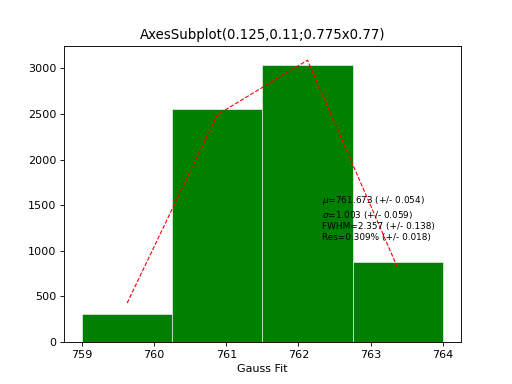

Fitting Problems
2 761.6625332152347
3 inf
4 0.05354298857420909
56 2 290 761.6732480839617 0.05354298857420909
[3.42113282e+03 7.61673248e+02 1.00281942e+00]


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


In [140]:
channel = 56
tac     = 2
phase   = 290

data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data = data[data['tpulse']==phase]
data = np.mod(data['efine'] + 1024 + 14, 1024)
fig = plt.figure()
axis = fig.add_subplot(111)

coeff_err = [1000,1000,1000]
#if (np.std(data) < 0.8):
#    coeff = [1000,np.mean(data),np.std(data)]
#else:
chisq_r = 10000
bins = 1
while ((np.abs(coeff_err[1]) > 1) & (bins < 30)) :
    axis.cla()
    bins = bins + 1 
    coeff,coeff_err,chisq_r=TPcal.gauss_fit(data,bins,True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
    print(bins,coeff_err[1])

print(channel,tac,phase,coeff[1],coeff_err[1]) 
print(coeff)

In [142]:
channels = range(0,64)
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Blind fit
        for i in np.arange(0,300,10):
            data_fit = data_tc[data_tc['tpulse']==i]
            data_fit = np.mod(data_fit['efine'] + 1024 + 14, 1024)
            # PETSYS Magic 
            
            coeff_err = [1000,1000,1000]
            bins = 1
            while ((np.abs(coeff_err[1]) > 1) & (bins < 30)) :
                bins = bins + 1 
                coeff,coeff_err,chisq_r=TPcal.gauss_fit(data_fit,bins,False) #True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
                #print(ch,tc,i,bins,chisq_r)
                
            print(ch,tc,i,coeff[1],coeff_err[1])

            res.append([ch,tc,i,coeff[1],np.abs(coeff[2])])

df_efine = pd.DataFrame(res,columns=['channel_id','tac_id','tpulse','mu','sigma'])

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

Fitting Problems
0 0 0 0.0 0.0
Fitting Problems
0 0 10 0.0 0.0
Fitting Problems
0 0 20 0.0 0.0
Fitting Problems
0 0 30 0.0 0.0
Fitting Problems
0 0 40 31.242418081711804 0.0047893046081157456
Fitting Problems
0 0 50 114.974044125944 0.02736928221003522
Fitting Problems
0 0 60 200.85517973761796 0.016471217151624692
Fitting Problems
0 0 70 271.64275202768835 0.026565096655652105
Fitting Problems
0 0 80 340.78445269747766 0.05090797290698935
Fitting Problems
0 0 90 408.37354500143243 0.0012213781504299766
Fitting Problems
0 0 100 475.3018267765485 0.15297271151105615
Fitting Problems
0 0 110 539.1978910925585 0.008255932807566752
Fitting Problems
0 0 120 597.88208654296 0.011223847778366308
Fitting Problems
0 0 130 650.0144922332175 0.11190124430913932
Fitting Problems
0 0 140 686.9195264783339 0.023433774889213194
Fitting Problems
0 0 150 708.9588461110536 0.06770840397754134
Fitting Problems
0 0 160 716.3039504382971 0.009466152274607486
Fitting Problems
0 0 170 718.3796642902053 0.020

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

0 2 120 596.7272582213399 0.000947204559193095
Fitting Problems
0 2 130 648.7069479789892 0.011372986318973469
Fitting Problems
0 2 140 686.6255688961322 0.029978507498455955
Fitting Problems
0 2 150 708.3763514033176 0.1174485365783893
Fitting Problems
0 2 160 716.6744660144445 0.00034647143152829313
Fitting Problems
0 2 170 718.2210062016534 0.052277807527907116
Fitting Problems
0 2 180 718.418110988869 0.017587432379141534
Fitting Problems
0 2 190 719.2361640754958 0.012625966573945283
Fitting Problems
0 2 200 719.0309704546182 0.03744671826350056
Fitting Problems
0 2 210 719.670516267375 0.0011839060838728613
Fitting Problems
0 2 220 719.7958360752289 0.0004158850189510345
Fitting Problems
0 2 230 719.962644616683 0.00013053128269132624
Fitting Problems
0 2 240 719.6010570941254 0.002441722931748856
Fitting Problems
0 2 250 719.1292904485381 0.01588104945138454
Fitting Problems
0 2 260 718.6798380823458 0.004613630073231986
Fitting Problems
0 2 270 718.9300238483081 0.0015794972772

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

0 3 160 716.2690665261553 0.016394044394536865
Fitting Problems
0 3 170 718.1038013765761 0.04500807004761694
Fitting Problems
0 3 180 718.749781861658 0.006528520078018295
Fitting Problems
0 3 190 719.1867847671791 0.0043941224751919555
Fitting Problems
0 3 200 719.1605836332296 0.018130935756152117
Fitting Problems
0 3 210 719.6480600119003 0.0006318870336555799
Fitting Problems
0 3 220 719.7697540825257 0.0005115057474538462
Fitting Problems
0 3 230 719.9657005603755 5.2434649538247684e-05
Fitting Problems
0 3 240 719.4727605850999 0.006993522727786289
Fitting Problems
0 3 250 718.5688439837185 0.01595743961832445
Fitting Problems
0 3 260 718.5274000188675 0.01073451553338673
Fitting Problems
0 3 270 718.856716629939 0.01762346267346326
Fitting Problems
0 3 280 718.9089048016822 0.002323784704304636
Fitting Problems
0 3 290 719.3232553030851 0.008725810791660358
Fitting Problems
1 0 0 0.0 0.0
Fitting Problems
1 0 10 0.0 0.0
Fitting Problems
1 0 20 0.0 0.0
Fitting Problems
1 0 30 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

1 0 90 361.6425609241971 0.07406531557672832
Fitting Problems
1 0 100 425.40484540783416 0.00446308691976146
Fitting Problems
1 0 110 486.47223167841946 0.01087783996899892
Fitting Problems
1 0 120 548.0041092529465 0.020784082967561464
Fitting Problems
1 0 130 605.0134378502175 0.023482279589234493
Fitting Problems
1 0 140 658.9244888393719 0.0072630302624466766
Fitting Problems
1 0 150 702.9028797819 0.0312316596701689
Fitting Problems
1 0 160 734.0912491317342 0.0028970080493172547
Fitting Problems
1 0 170 750.3600658568836 0.447985479157394
Fitting Problems
1 0 180 755.6780602899813 0.024655111990177805
Fitting Problems
1 0 190 757.4607227584679 0.0630909053002213
Fitting Problems
1 0 200 758.0232865480402 0.05217785979622312
Fitting Problems
1 0 210 757.9664174534222 0.05860748312019749
Fitting Problems
1 0 220 757.9893866268919 0.01661548605288268
Fitting Problems
1 0 230 758.5884887008016 0.02018948278813312
Fitting Problems
1 0 240 758.6758505485744 0.0046140982960015415
Fittin

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

1 1 130 604.57202013588 0.0669261334765425
Fitting Problems
1 1 140 658.3918180238962 0.007110179328069673
Fitting Problems
1 1 150 702.9774904587534 0.14266059862736258
Fitting Problems
1 1 160 734.4133335336802 0.0005226192953167129
Fitting Problems
1 1 170 749.7270777250025 0.22825237002644305
Fitting Problems
1 1 180 755.7153115454576 0.003506895513455146
Fitting Problems
1 1 190 757.3111542131608 0.037124085847872385
Fitting Problems
1 1 200 757.6178748538372 0.08293697975089497
Fitting Problems
1 1 210 757.3316233043334 0.12120809999988819
Fitting Problems
1 1 220 757.4327645711169 0.08895169426687038
Fitting Problems
1 1 230 757.7535256293226 0.11248188393408884
Fitting Problems
1 1 240 758.2235188429175 0.041987819946947065
Fitting Problems
1 1 250 757.4922602699221 0.12838100536328795
Fitting Problems
1 1 260 758.0038838315354 0.00574588889664439
Fitting Problems
1 1 270 758.2212697089697 0.037598921376670355
Fitting Problems
1 1 280 758.427808846862 0.007957407541423853
Fitti

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

1 2 150 701.9695228121814 0.03565902007002452
Fitting Problems
1 2 160 733.9175299400505 0.03346530274292724
Fitting Problems
1 2 170 749.828598383925 0.18150293917489047
Fitting Problems
1 2 180 755.9630322512464 0.00013451037975906706
Fitting Problems
1 2 190 757.244852127625 0.06262869234808302
Fitting Problems
1 2 200 757.8595236628164 0.06905602209342994
Fitting Problems
1 2 210 757.8093575147677 0.06694049604214536
Fitting Problems
1 2 220 758.3070070849742 0.028792786966034194
Fitting Problems
1 2 230 758.4943365310546 0.0260023192579292
Fitting Problems
1 2 240 758.5723205472262 0.006647326392674468
Fitting Problems
1 2 250 757.8658790053832 0.0378169488072149
Fitting Problems
1 2 260 757.7391526089998 0.07861529223773595
Fitting Problems
1 2 270 758.5407862675028 0.007158217496443391
Fitting Problems
1 2 280 758.6417947338442 0.008183369226609867
Fitting Problems
1 2 290 758.6981026779101 0.009532861423746791
Fitting Problems
1 3 0 0.0 0.0
Fitting Problems
1 3 10 0.0 0.0
Fitti

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

3 180 755.1939332616552 0.014372791408242738
Fitting Problems
1 3 190 757.785132285172 0.010405633970637812
Fitting Problems
1 3 200 758.0553732395665 0.01909537694677189
Fitting Problems
1 3 210 757.9000909453176 0.05790776757888263
Fitting Problems
1 3 220 758.3289421637221 0.019028085967718645
Fitting Problems
1 3 230 758.5753083686459 0.019563010433678592
Fitting Problems
1 3 240 758.6000241912074 0.005256606337920283
Fitting Problems
1 3 250 758.3574558540403 0.02414341795480095
Fitting Problems
1 3 260 758.3386510411599 0.017108526893495554
Fitting Problems
1 3 270 758.6292162666267 0.003805765190273711
Fitting Problems
1 3 280 758.8496303451456 0.0009680373733975328
Fitting Problems
1 3 290 758.7951154904807 0.0060707740133728125
Fitting Problems
2 0 0 0.0 0.0
Fitting Problems
2 0 10 0.0 0.0
Fitting Problems
2 0 20 0.0 0.0
Fitting Problems
2 0 30 0.0 0.0
Fitting Problems
2 0 40 22.886794540786667 0.00484945640444151
Fitting Problems
2 0 50 95.48963378759002 0.022059856088135668


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

2 0 100 440.8468581454734 0.020084699086020934
Fitting Problems
2 0 110 503.251553291302 0.035416847088294255
Fitting Problems
2 0 120 562.7323726577873 0.036496577865498536
Fitting Problems
2 0 130 618.6052017939616 0.054906546345073304
Fitting Problems
2 0 140 667.30514301447 0.13040070371260934
Fitting Problems
2 0 150 703.1750750405973 0.013309805332495057
Fitting Problems
2 0 160 721.1966468343444 0.2025005407718623
Fitting Problems
2 0 170 727.8571516534017 0.00629617351341534
Fitting Problems
2 0 180 729.603755157807 0.06945131565160852
Fitting Problems
2 0 190 729.8856447233862 0.021341013541674017
Fitting Problems
2 0 200 730.3548273889312 0.024354051179937584
Fitting Problems
2 0 210 730.1945359158963 0.026806228601011055
Fitting Problems
2 0 220 730.482084666626 0.006919515434083205
Fitting Problems
2 0 230 730.349257699109 0.030699590812906755
Fitting Problems
2 0 240 730.3325097262813 0.01005664621755169
Fitting Problems
2 0 250 729.6538355275419 0.005238816608931119
Fitti

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

2 1 120 563.565347984267 0.007470927302027438
Fitting Problems
2 1 130 618.7465586934371 0.12441983102430823
Fitting Problems
2 1 140 666.9432632792721 0.003639699551145549
Fitting Problems
2 1 150 703.0403169226727 0.012184290243881157
Fitting Problems
2 1 160 720.3488167183611 0.028218877773113472
Fitting Problems
2 1 170 727.683793809285 0.01893072175497843
Fitting Problems
2 1 180 729.4094288808468 0.055170552923056386
Fitting Problems
2 1 190 729.9142155707841 0.0406471688932517
Fitting Problems
2 1 200 730.1374677380941 0.03770529159346728
Fitting Problems
2 1 210 729.9283551535559 0.03966864391744542
Fitting Problems
2 1 220 730.2303797861138 0.06974434862584622
Fitting Problems
2 1 230 729.6719517415248 0.044561107704654206
Fitting Problems
2 1 240 730.0723111382088 0.03265424331331688
Fitting Problems
2 1 250 729.6402138314486 0.044320022115475165
Fitting Problems
2 1 260 729.3433008853021 0.031774133844634025
Fitting Problems
2 1 270 729.8197524205965 0.012102713726116909
Fit

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

2 2 160 720.1390799492531 0.02378388151176641
Fitting Problems
2 2 170 727.7831666415565 0.0031312888104356204
Fitting Problems
2 2 180 729.5015344944266 0.05843546227350909
Fitting Problems
2 2 190 730.0882552237078 0.021903740668276588
Fitting Problems
2 2 200 730.311270661725 0.028728070554468816
Fitting Problems
2 2 210 730.3697731096632 0.02173101612603422
Fitting Problems
2 2 220 730.2382971114689 0.04103415800789374
Fitting Problems
2 2 230 729.8439670851757 0.03609540566865323
Fitting Problems
2 2 240 730.2900130023197 0.012533612634958178
Fitting Problems
2 2 250 729.8118885602948 0.04937561638885274
Fitting Problems
2 2 260 729.6343280431812 0.04589027484378698
Fitting Problems
2 2 270 730.0108196257377 0.03595867171128496
Fitting Problems
2 2 280 729.329933252377 0.04298084320555152
Fitting Problems
2 2 290 730.162502149746 0.02429742959968044
Fitting Problems
2 3 0 0.0 0.0
Fitting Problems
2 3 10 0.0 0.0
Fitting Problems
2 3 20 0.0 0.0
Fitting Problems
2 3 30 0.0 0.0
Fittin

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

2 3 190 729.8080132051073 0.04713702796776555
Fitting Problems
2 3 200 729.6348640078501 0.0421797965035299
Fitting Problems
Fitting Problems
2 3 210 729.8668731673214 0.058794248782626374
Fitting Problems
2 3 220 729.810543094483 0.08646814777397051
Fitting Problems
2 3 230 729.6089033166843 0.05019053412259494
Fitting Problems
2 3 240 729.5467237571394 0.05860685805573849
Fitting Problems
2 3 250 729.5803114321175 0.05243816782998932
Fitting Problems
2 3 260 729.3118566463944 0.04815591200659777
Fitting Problems
2 3 270 730.4478068361138 0.024106005734033917
Fitting Problems
2 3 280 729.3250549821653 0.0382493186136624
Fitting Problems
2 3 290 729.9062829936117 0.015324435960424685
Fitting Problems
3 0 0 0.0 0.0
Fitting Problems
3 0 10 0.0 0.0
Fitting Problems
3 0 20 0.0 0.0
Fitting Problems
3 0 30 0.0 0.0
Fitting Problems
3 0 40 24.334864060862195 0.006287587397682885
Fitting Problems
3 0 50 96.54578542529505 0.002236392128839862
Fitting Problems
3 0 60 186.61775117328105 0.03366039

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

3 0 110 504.7182000655103 0.05276643280588183
Fitting Problems
3 0 120 560.9176187057469 0.019584461155287537
Fitting Problems
3 0 130 611.2928027330474 0.1450648776946026
Fitting Problems
3 0 140 650.3275686409505 0.2021924818109619
Fitting Problems
3 0 150 671.5252965413218 0.005398944199066648
Fitting Problems
3 0 160 679.2322433617643 0.012780024474037826
Fitting Problems
3 0 170 680.9001998956762 0.009099830191053116
Fitting Problems
3 0 180 681.3279121397479 0.01009206373719234
Fitting Problems
3 0 190 681.6644059203687 0.00012622398258472088
Fitting Problems
3 0 200 681.5977679644944 0.016549273373275546
Fitting Problems
3 0 210 681.4837385188531 0.0149727589388276
Fitting Problems
3 0 220 681.878160887007 0.0014644231245097027
Fitting Problems
3 0 230 682.2248494623686 0.025948772591380998
Fitting Problems
3 0 240 681.6749302657721 0.0010784588260329892
Fitting Problems
3 0 250 682.4508136798171 0.0059699392520301195
Fitting Problems
3 0 260 682.4969825585047 0.0064073763473673

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

3 1 140 649.3490425631422 0.029451528644579655
Fitting Problems
3 1 150 670.6242025158061 0.016363033801453066
Fitting Problems
3 1 160 678.450979859832 0.019540971802164672
Fitting Problems
3 1 170 681.2614457386327 0.0018362078628468555
Fitting Problems
3 1 180 681.5308747731093 0.0005985781365571255
Fitting Problems
3 1 190 681.4271846485705 0.0026830783553694133
Fitting Problems
3 1 200 681.7983956889867 0.003191655585662501
Fitting Problems
3 1 210 681.7665213905158 0.0007311055423932111
Fitting Problems
3 1 220 681.7492511991737 0.00031597482470214935
Fitting Problems
3 1 230 681.5013268227891 0.010710805105936428
Fitting Problems
3 1 240 681.4812289685038 0.014814087341913666
Fitting Problems
3 1 250 681.6148778299312 0.01316102638446244
Fitting Problems
3 1 260 682.2154121658102 0.0013955268151088361
Fitting Problems
3 1 270 682.7013911102033 0.0014611598290443601
Fitting Problems
3 1 280 681.6843025223108 0.008522572738550912
Fitting Problems
3 1 290 681.8723780803912 0.000974

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

3 2 180 681.3750413299585 0.01329281161858185
Fitting Problems
3 2 190 681.7409045247691 0.0002277716679438483
Fitting Problems
3 2 200 682.2112219254919 0.016517382633911427
Fitting Problems
3 2 210 681.52800590672 0.014756674495649965
Fitting Problems
3 2 220 681.9644428355502 0.0007612178371651147
Fitting Problems
3 2 230 682.3122466633747 0.02541232940066395
Fitting Problems
3 2 240 681.7605516818105 0.011116413451527543
Fitting Problems
3 2 250 682.538632862614 0.004119950380330592
Fitting Problems
3 2 260 682.5836039122527 0.005238955730048675
Fitting Problems
3 2 270 682.5197944564345 0.00939562928200013
Fitting Problems
3 2 280 682.7799066364279 0.001660465329306044
Fitting Problems
3 2 290 681.7352996598506 0.005605181188820183
Fitting Problems
3 3 0 0.0 0.0
Fitting Problems
3 3 10 0.0 0.0
Fitting Problems
3 3 20 0.0 0.0
Fitting Problems
3 3 30 0.0 0.0
Fitting Problems
3 3 40 22.708670666969518 0.009787958512992072
Fitting Problems
3 3 50 92.10291827471669 0.06390100702621025


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

3 3 210 682.2607004039027 0.009395480401968992
Fitting Problems
3 3 220 681.7843487157213 0.02221160002237734
Fitting Problems
3 3 230 682.5251273505365 0.002550488614377609
Fitting Problems
3 3 240 682.5546380176769 0.0036277579900922214
Fitting Problems
3 3 250 682.7083950712346 0.002431868777037301
Fitting Problems
3 3 260 682.8250866005317 0.0011775557545932406
Fitting Problems
3 3 270 682.6171099817287 0.0076710668483895616
Fitting Problems
3 3 280 682.8455655101885 0.006695516411564037
Fitting Problems
3 3 290 682.3594704290617 0.0029948440956506592
Fitting Problems
4 0 0 0.0 0.0
Fitting Problems
4 0 10 0.0 0.0
Fitting Problems
4 0 20 0.0 0.0
Fitting Problems
4 0 30 0.0 0.0
Fitting Problems
4 0 40 32.292130727322366 0.01512389378806489
Fitting Problems
4 0 50 106.447047388429 0.0018680284601841645
Fitting Problems
4 0 60 183.37743447940989 0.001729241285547475
Fitting Problems
4 0 70 248.25975696784832 0.025821149040572602
Fitting Problems
4 0 80 310.4780613299871 0.0456206388692

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: R

4 0 180 674.4055607980072 0.017507105106043485
Fitting Problems
4 0 190 673.5426148404568 0.022028907470421365
Fitting Problems
4 0 200 674.5092367729499 0.021415438310870834
Fitting Problems
4 0 210 675.1712845839085 0.027001464984697205
Fitting Problems
4 0 220 674.4099319728301 0.02004323111466952
Fitting Problems
4 0 230 674.1295729367149 0.04593493079559919
Fitting Problems
4 0 240 674.2094081615045 0.023293076167984855
Fitting Problems
4 0 250 673.6065197144176 0.013567411971986158
Fitting Problems
4 0 260 674.6650043908679 0.005688555911774955
Fitting Problems
4 0 270 674.5330217195657 0.015760897170062644
Fitting Problems
4 0 280 674.1877695769545 0.030981482688754006
Fitting Problems
4 0 290 674.2886684486296 0.01702801540343927
Fitting Problems
4 1 0 0.0 0.0
Fitting Problems
4 1 10 0.0 0.0
Fitting Problems
4 1 20 0.0 0.0
Fitting Problems
4 1 30 0.0 0.0
Fitting Problems
4 1 40 32.4945842371751 0.0010219252175238463
Fitting Problems
4 1 50 106.55211880252948 0.00777735432707314

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

4 1 240 673.9473622404774 0.016975441325541785
Fitting Problems
4 1 250 673.4887038427697 0.017416803245584284
Fitting Problems
4 1 260 674.5227999938536 0.00763150326058815
Fitting Problems
4 1 270 674.3524355489068 0.03119925735657432
Fitting Problems
4 1 280 674.0451237329999 0.04246159168860686
Fitting Problems
4 1 290 674.1446344119688 0.02475222111992911
Fitting Problems
4 2 0 0.0 0.0
Fitting Problems
4 2 10 0.0 0.0
Fitting Problems
4 2 20 0.0 0.0
Fitting Problems
4 2 30 0.0 0.0
Fitting Problems
4 2 40 32.14082501825194 0.002375779387066138
Fitting Problems
4 2 50 105.81250434841081 0.025528538027954698
Fitting Problems
4 2 60 182.86307424763595 0.0028592754495364307
Fitting Problems
4 2 70 247.59352508291178 0.014616656351701496
Fitting Problems
4 2 80 310.24347162675036 0.016385196998029553
Fitting Problems
4 2 90 372.4036051609688 0.10960655099736767
Fitting Problems
4 2 100 433.67807200222086 0.03862322585758546
Fitting Problems
4 2 110 492.5217655686061 0.018063160412586415


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
4 3 20 0.0 0.0
Fitting Problems
4 3 30 0.0 0.0
Fitting Problems
4 3 40 30.859629355711583 0.00024151423890890437
Fitting Problems
4 3 50 103.29779400369833 0.008087371988110707
Fitting Problems
4 3 60 180.4781303210917 0.13206034010106016
Fitting Problems
4 3 70 245.26687900146155 0.015363392858307016
Fitting Problems
4 3 80 306.96662519460045 0.0724228521265881
Fitting Problems
4 3 90 369.09492040619324 0.10767278615091831
Fitting Problems
4 3 100 429.8311445011528 0.004275466944948919
Fitting Problems
4 3 110 488.93269970525836 0.01372230129206652
Fitting Problems
4 3 120 544.8396910615911 0.01764255002183608
Fitting Problems
4 3 130 595.202549758646 0.007225965463527867
Fitting Problems
4 3 140 635.3337466929148 0.18334502660837623
Fitting Problems
4 3 150 661.0913662549631 0.0937581807543538
Fitting Problems
4 3 160 670.1100767702682 0.00902183771936708
Fitting Problems
4 3 170 673.2343401741086 0.005587034545044384
Fitting Problems
4 3 180 674.286047815812 0.03092

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

Fitting Problems
5 0 0 0.0 0.0
Fitting Problems
5 0 10 0.0 0.0
Fitting Problems
5 0 20 0.0 0.0
Fitting Problems
5 0 30 0.0 0.0
Fitting Problems
5 0 40 7.356116193264079 0.019541829862009686
Fitting Problems
5 0 50 52.05024002244036 0.004408047670226086
Fitting Problems
5 0 60 126.60445974058399 0.17764903506276314
Fitting Problems
5 0 70 195.24949012822395 0.02285922024088337
Fitting Problems
5 0 80 252.04413718852558 0.0399034105485401
Fitting Problems
5 0 90 305.4680411393118 0.09848392526964095
Fitting Problems
5 0 100 358.1038888978841 0.000954170526370968
Fitting Problems
5 0 110 412.4433023032036 0.0833435220717466
Fitting Problems
5 0 120 465.4503766954924 0.1873802041332289
Fitting Problems
5 0 130 513.8581799337674 0.00045617761486324256
Fitting Problems
5 0 140 559.739750117869 0.06981714556628674
Fitting Problems
5 0 150 600.3415049585905 0.0043054885841491254
Fitting Problems
5 0 160 632.7766258485009 0.12350548079200253
Fitting Problems
5 0 170 651.8928522114009 0.00431812

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

5 2 130 512.6471592217418 0.0364484740410303
Fitting Problems
5 2 140 558.5836276433836 0.02092936370294301
Fitting Problems
5 2 150 599.8542248770123 0.09613732592067206
Fitting Problems
5 2 160 632.569954470999 0.058829513958145375
Fitting Problems
5 2 170 651.6681645746753 0.022777349664210435
Fitting Problems
5 2 180 659.8579000481262 0.018941445135091002
Fitting Problems
5 2 190 663.4111275225692 0.03626838804589865
Fitting Problems
5 2 200 663.4384045175067 0.12654599793753116
Fitting Problems
5 2 210 663.9980638677948 0.10145192022454072
Fitting Problems
5 2 220 663.6072135726184 0.034098556699093285
Fitting Problems
5 2 230 663.9213299492789 0.10731007970202235
Fitting Problems
5 2 240 664.6172678804261 0.014008532161685834
Fitting Problems
5 2 250 664.3723567834213 0.011543405415951006
Fitting Problems
5 2 260 664.4747720442302 0.02754029647333094
Fitting Problems
5 2 270 664.157539085723 0.052635169022583556
Fitting Problems
5 2 280 664.7540682719086 0.011355804389551341
Fitt

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
5 3 180 659.3658027645348 0.010795958817322317
Fitting Problems
5 3 190 663.2015185990525 0.018409986855616955
Fitting Problems
5 3 200 663.966959733602 0.020284208933658156
Fitting Problems
5 3 210 664.0094081880533 0.09309901585235604
Fitting Problems
5 3 220 663.686110416984 0.02089950208409448
Fitting Problems
5 3 230 663.9359954893965 0.09942735910334691
Fitting Problems
5 3 240 664.1838247832907 0.0485569000907985
Fitting Problems
5 3 250 665.0056184370889 0.0021207991893611774
Fitting Problems
5 3 260 665.0495166216855 0.0027530239377649085
Fitting Problems
5 3 270 664.126903349188 0.0474826822972147
Fitting Problems
5 3 280 664.1467600392957 0.01075879293006543
Fitting Problems
5 3 290 664.8403064282741 0.020847148265716237
Fitting Problems
6 0 0 0.0 0.0
Fitting Problems
6 0 10 0.0 0.0
Fitting Problems
6 0 20 0.0 0.0
Fitting Problems
6 0 30 0.0 0.0
Fitting Problems
6 0 40 8.59670923458844 0.0026620145829410057
Fitting Problems
6 0 50 64.14483072191653 0.0465368

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

6 0 110 469.48028946744904 0.16660895132251408
Fitting Problems
6 0 120 527.9100379469747 0.0026909753833618344
Fitting Problems
6 0 130 584.7821510971063 0.011199329743039147
Fitting Problems
6 0 140 634.7647458872184 0.02065718698954886
Fitting Problems
6 0 150 677.4868495322808 0.10971270180001357
Fitting Problems
6 0 160 707.1761916476216 0.14859670122383653
Fitting Problems
6 0 170 719.3705924127581 0.0866725807580099
Fitting Problems
6 0 180 725.0291239467163 0.028691939958630255
Fitting Problems
6 0 190 726.1632892299307 0.009924908237694105
Fitting Problems
6 0 200 726.4534999175111 0.01550065661631749
Fitting Problems
6 0 210 725.6298624573826 0.001714264955639171
Fitting Problems
6 0 220 726.5707973830908 0.011066606186580083
Fitting Problems
6 0 230 726.1950573036974 0.0010596016367322195
Fitting Problems
6 0 240 726.5607614610318 0.012875057251318905
Fitting Problems
6 0 250 726.3438887576704 0.008415971344730707
Fitting Problems
6 0 260 726.530551283206 0.00507443762784590

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

6 1 150 676.8258127742296 0.049193250427823645
Fitting Problems
6 1 160 706.4757578503418 0.029486855586172686
Fitting Problems
6 1 170 719.5473720276945 0.011903929018841066
Fitting Problems
6 1 180 724.1645127218297 0.03531519464654709
Fitting Problems
6 1 190 725.4492882919022 0.007324268732407358
Fitting Problems
6 1 200 726.299808141158 0.02074591248366705
Fitting Problems
6 1 210 725.5769667001556 0.008039123049537853
Fitting Problems
6 1 220 726.3154411182464 0.028491561922838866
Fitting Problems
6 1 230 726.1714495992082 0.0066262764886934914
Fitting Problems
6 1 240 726.7932027020897 0.0028555278399004323
Fitting Problems
6 1 250 725.664838788708 0.0023180071032296635
Fitting Problems
6 1 260 726.3003982237274 0.014725971301225396
Fitting Problems
6 1 270 726.325437611393 0.017195321003626668
Fitting Problems
6 1 280 726.4311212549637 0.00955048646582467
Fitting Problems
6 1 290 726.2031938825025 0.010947820006578084
Fitting Problems
6 2 0 0.0 0.0
Fitting Problems
6 2 10 0.0 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

6 2 190 725.5890810867102 0.014151835364602955
Fitting Problems
6 2 200 726.3677450259823 0.014426078172122535
Fitting Problems
6 2 210 726.2006279589248 0.019009245518517393
Fitting Problems
6 2 220 726.4768769361569 0.014483837256487438
Fitting Problems
6 2 230 726.685122873548 0.0038356478461511858
Fitting Problems
6 2 240 726.4144711407736 0.019248503719694027
Fitting Problems
6 2 250 725.8381689429893 0.011417992731782154
Fitting Problems
6 2 260 726.4492348387912 0.00661673743803115
Fitting Problems
6 2 270 727.0330049176335 0.023946018266575463
Fitting Problems
6 2 280 725.9526413822925 0.0014529599228024748
Fitting Problems
6 2 290 726.3472864977741 0.006914084314040436
Fitting Problems
6 3 0 0.0 0.0
Fitting Problems
6 3 10 0.0 0.0
Fitting Problems
6 3 20 0.0 0.0
Fitting Problems
6 3 30 0.0 0.0
Fitting Problems
6 3 40 7.551507311097865 0.0024224262974193683
Fitting Problems
6 3 50 60.066241617425355 0.0027122469720812824
Fitting Problems
6 3 60 146.9008725100716 0.0613428148573

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

6 3 220 726.4899174592562 0.013518197887512748
Fitting Problems
6 3 230 726.10192540355 0.0037793556232360638
Fitting Problems
6 3 240 726.3909910938833 0.014931544831650862
Fitting Problems
6 3 250 726.2579426655707 0.004330669282368796
Fitting Problems
6 3 260 726.4610260710675 0.007447903069471492
Fitting Problems
6 3 270 727.0154219328467 0.022884830065304635
Fitting Problems
6 3 280 725.9633790790015 0.002280537596692568
Fitting Problems
6 3 290 726.3475761191729 0.00934562870661798
Fitting Problems
7 0 0 0.0 0.0
Fitting Problems
7 0 10 0.0 0.0
Fitting Problems
7 0 20 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 0 30 4.313175867956744 4.313175867956744
Fitting Problems
7 0 40 69.10006218273325 7.037773928767872e-05
Fitting Problems
7 0 50 176.58239367301286 0.035107593344727184
Fitting Problems
7 0 60 258.1922607168362 0.011550607610759066
Fitting Problems
7 0 70 334.87585734017387 0.004608659305487551
Fitting Problems
7 0 80 411.6604727187847 0.01358746589345102
Fitting Problems
7 0 90 487.41675101506024 0.0049705393525148675
Fitting Problems
7 0 100 558.1833066011393 0.0021856386617823817
Fitting Problems
7 0 110 623.6097753123938 0.00494832107555511
Fitting Problems
7 0 120 676.1656508240432 0.014312554251508514
Fitting Problems
7 0 130 710.0654496538556 0.005221444569405668
Fitting Problems
7 0 140 724.0682700389748 0.0009986659562075788
Fitting Problems
7 0 150 727.7109001747257 0.00013772307918186874
Fitting Problems
7 0 160 728.501218

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

7 0 290 728.982798817277 7.310605435725298e-05
Fitting Problems
7 1 0 0.0 0.0
Fitting Problems
7 1 10 0.0 0.0
Fitting Problems
7 1 20 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 1 30 4.172310756972111 4.172310756972111
Fitting Problems
7 1 40 69.46569952024133 0.01593022286137152
Fitting Problems
7 1 50 176.12901860593743 0.03507376594169473
Fitting Problems
7 1 60 257.74501365128344 0.03274886025216441
Fitting Problems
7 1 70 335.01634900526403 0.002648030068059639
Fitting Problems
7 1 80 411.2222330258542 0.14111931593608615
Fitting Problems
7 1 90 486.3569929317689 0.006092849303881251
Fitting Problems
7 1 100 556.7517585680969 0.035444769183139005
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

7 1 110 622.876324529666 0.04226281811679277
Fitting Problems
7 1 120 676.3405845951775 0.033254462880634404
Fitting Problems
7 1 130 710.1001053296663 0.0018047209333969469
Fitting Problems
7 1 140 723.5350618753387 0.004997978187626362
Fitting Problems
7 1 150 727.2958854561158 0.0065626509331275
Fitting Problems
7 1 160 727.6796521733154 0.007706050459140249
Fitting Problems
7 1 170 727.3958648925004 0.056048315060253324
Fitting Problems
7 1 180 728.4557140417038 0.0037891081295293367
Fitting Problems
7 1 190 727.7049838173489 0.043352251600600446
Fitting Problems
7 1 200 728.8688933802651 0.00014332204236196046
Fitting Problems
7 1 210 728.7420295611468 0.0015501928783854008
Fitting Problems
7 1 220 729.0693315026097 0.006339028243636235
Fitting Problems
7 1 230 728.823944136381 0.0010493581444505746
Fitting Problems
7 1 240 728.1834552280084 0.014364736397616366
Fitting Problems
7 1 250 728.6333784927783 0.000639009263469434
Fitting Problems
7 1 260 728.2349950579128 0.01513387121

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 2 30 4.091193626404894 4.091193626404894
Fitting Problems
7 2 40 68.8331517124325 0.009804100389210759
Fitting Problems
7 2 50 175.29034140974414 0.005624958005287423
Fitting Problems
7 2 60 257.3712955845526 0.005631400322605245
Fitting Problems
7 2 70 333.9169711462564 0.0029388864482939293
Fitting Problems
7 2 80 410.636976297619 0.1002187094131304
Fitting Problems
7 2 90 485.82941874849934 0.0035489704273915603
Fitting Problems
7 2 100 556.422957336709 0.02054363384316667
Fitting Problems
7 2 110 622.9090883397131 0.003197289069070606
Fitting Problems
7 2 120 675.6778995724814 0.13543129760030787
Fitting Problems
7 2 130 710.0210437366544 0.005098522911520053
Fitting Problems
7 2 140 723.6619608976384 0.0024126898730718912
Fitting Problems
7 2 150 727.4491155961144 0.0003284975123042042
Fitting P

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

7 2 240 728.3875252823957 0.007629836676819314
Fitting Problems
7 2 250 728.8042455977111 0.0002664593029329661
Fitting Problems
7 2 260 728.8897902955568 0.00026976089228707064
Fitting Problems
7 2 270 728.6996707217594 0.00040422359066882033
Fitting Problems
7 2 280 728.6346959159156 0.004371408578008732
Fitting Problems
7 2 290 728.8349602565261 0.00022472064926040055
Fitting Problems
7 3 0 0.0 0.0
Fitting Problems
7 3 10 0.0 0.0
Fitting Problems
7 3 20 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 3 30 3.9883172422244306 364640.5803858368
Fitting Problems
7 3 40 65.5546857933607 0.026560722449741052
Fitting Problems
7 3 50 172.87640799850323 0.0012608091126312076
Fitting Problems
7 3 60 254.44893879881477 0.0029026867357667225
Fitting Problems
7 3 70 331.26620305743575 0.0037136677777992225
Fitting Problems
7 3 80 406.66896020956295 0.0807246588212726
Fitting Problems
7 3 90 481.84375529568644 0.010133296195090263
Fitting Problems
7 3 100 552.1969494

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: Ru

Fitting Problems
7 3 170 727.6280099884767 0.05723691594938915
Fitting Problems
7 3 180 728.6441365948115 0.0017484959721462813
Fitting Problems
7 3 190 727.9594117945655 0.017179385429266086
Fitting Problems
7 3 200 729.0331893909942 0.00025836676235447897
Fitting Problems
7 3 210 728.8547146175293 0.002328877331503382
Fitting Problems
7 3 220 729.2172531295885 0.0014897944580780453
Fitting Problems
7 3 230 728.9383428166494 0.0002508147403244463
Fitting Problems
7 3 240 728.7472232475044 0.004686133405475792
Fitting Problems
7 3 250 728.7740563289948 0.0004685459475088312
Fitting Problems
7 3 260 728.4539084675735 0.0033245679937869217
Fitting Problems
7 3 270 728.7398303092671 0.0017399611764341313
Fitting Problems
7 3 280 728.7954064407444 0.0005343471068090578
Fitting Problems
7 3 290 728.3506382396298 0.005289097681453138
Fitting Problems
8 0 0 0.0 0.0
Fitting Problems
8 0 10 0.0 0.0
Fitting Problems
8 0 20 0.0 0.0
Fitting Problems
8 0 30 0.0 0.0
Fitting Problems
8 0 40 24.562913

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

8 0 100 457.48324073077185 0.013677522513011653
Fitting Problems
8 0 110 519.841668478659 0.09156010905129752
Fitting Problems
8 0 120 576.6684669967475 0.0015829462887038289
Fitting Problems
8 0 130 626.5340734190031 0.012509620924038463
Fitting Problems
8 0 140 664.0017126011988 0.003943923783253599
Fitting Problems
8 0 150 683.0714227656368 0.208097805694317
Fitting Problems
8 0 160 688.8534913029753 0.01289831264420811
Fitting Problems
8 0 170 689.4387482202701 0.019075099990266377
Fitting Problems
8 0 180 689.5671917233312 0.02197455880622866
Fitting Problems
8 0 190 691.0952123693929 0.027100957288596475
Fitting Problems
8 0 200 690.9154268199181 0.0023381094632859037
Fitting Problems
8 0 210 690.658379011117 0.01883204719253883
Fitting Problems
8 0 220 691.2263794790302 0.017987817553291992
Fitting Problems
8 0 230 691.1441667585672 0.03171620006711259
Fitting Problems
8 0 240 691.2229859498191 0.05576983800480432
Fitting Problems
8 0 250 691.2386025277873 0.020054777312643074
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

8 1 130 626.3021194694044 0.01268722192779694
Fitting Problems
8 1 140 663.6797511196336 0.01765338452341288
Fitting Problems
8 1 150 681.9670390174931 0.1892047357922663
Fitting Problems
8 1 160 688.5972775779992 0.0061989785885361495
Fitting Problems
8 1 170 689.3218038261857 0.011697930018715164
Fitting Problems
8 1 180 690.0275330468847 0.03624544596098362
Fitting Problems
8 1 190 690.4587411390372 0.01801219568208048
Fitting Problems
8 1 200 690.1179317455259 0.021410844071837645
Fitting Problems
8 1 210 691.0534907970851 0.025495436761478474
Fitting Problems
8 1 220 691.1334587808499 0.03514116320763775
Fitting Problems
8 1 230 690.9755885859372 0.03154479201567313
Fitting Problems
8 1 240 691.1810803416245 0.027831425147165835
Fitting Problems
8 1 250 691.0391084481058 0.01894729334692728
Fitting Problems
8 1 260 691.2962484427563 0.012974138037833502
Fitting Problems
8 1 270 691.1195347734844 0.007288275885065057
Fitting Problems
8 1 280 691.2712715237906 0.013876265880104465
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

8 2 150 682.1963927237568 0.17835163907816756
Fitting Problems
8 2 160 688.4048254258811 0.008972565151189035
Fitting Problems
8 2 170 689.4975310800148 0.019719973040395303
Fitting Problems
8 2 180 689.6633933634181 0.030689365219403866
Fitting Problems
8 2 190 691.1808227543914 0.02471833764132433
Fitting Problems
8 2 200 691.0256286161307 0.000751578911385467
Fitting Problems
8 2 210 691.2966999515112 0.01446281935386117
Fitting Problems
8 2 220 691.3223271739828 0.007532077866773278
Fitting Problems
8 2 230 691.2024355019851 0.019843743412818346
Fitting Problems
8 2 240 691.290488971669 0.02928465193528632
Fitting Problems
8 2 250 691.2985417820702 0.009906702326512183
Fitting Problems
8 2 260 691.5414038947944 0.0018413282729397836
Fitting Problems
8 2 270 691.2411312161969 0.04162872875676143
Fitting Problems
8 2 280 691.5136538883048 0.0028458911147499263
Fitting Problems
8 2 290 691.2558344618386 0.01852042840341106
Fitting Problems
8 3 0 0.0 0.0
Fitting Problems
8 3 10 0.0 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

3 170 689.3529589123568 0.019931683249797078
Fitting Problems
8 3 180 690.1673901627651 0.024936824725284835
Fitting Problems
8 3 190 690.5479954652556 0.018190054043051015
Fitting Problems
8 3 200 690.4100946619436 0.028367718375271255
Fitting Problems
8 3 210 691.1474063474508 0.01943950048276651
Fitting Problems
8 3 220 691.2199587940054 0.019974560653374857
Fitting Problems
8 3 230 691.143269482865 0.00029640187604978595
Fitting Problems
8 3 240 691.283469951671 0.011236735096099204
Fitting Problems
8 3 250 691.1975658504583 0.018293870382560355
Fitting Problems
8 3 260 691.3788488257676 0.0018068054910616435
Fitting Problems
8 3 270 691.3069486138785 0.0057111506910005865
Fitting Problems
8 3 280 691.3776720323004 0.005342928003036348
Fitting Problems
8 3 290 691.1196517725931 0.021603966379916906
Fitting Problems
9 0 0 0.0 0.0
Fitting Problems
9 0 10 0.0 0.0
Fitting Problems
9 0 20 0.0 0.0
Fitting Problems
9 0 30 0.0 0.0
Fitting Problems
9 0 40 17.396340622384706 0.00062548828301

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

9 0 50 83.92858693335859 0.0030811909402616226
Fitting Problems
9 0 60 182.33091055790442 0.011914376196855734
Fitting Problems
9 0 70 256.9436399791865 0.050145855307532516
Fitting Problems
9 0 80 325.53508952729175 0.01057998008874773
Fitting Problems
9 0 90 392.39515791903136 0.20398947087806368
Fitting Problems
9 0 100 458.94910225590155 0.002712407753344225
Fitting Problems
9 0 110 523.9258539073309 0.053973989279544395
Fitting Problems
9 0 120 584.2213991490481 0.08285828170479853
Fitting Problems
9 0 130 639.9649264966847 0.041714214714033186
Fitting Problems
9 0 140 686.7199322916274 0.011732330823291743
Fitting Problems
9 0 150 716.8005993387711 0.024618919251276856
Fitting Problems
9 0 160 731.3653520524664 0.023639720662065006
Fitting Problems
9 0 170 735.8752054010945 0.0017825042786357669
Fitting Problems
9 0 180 737.7833319056047 0.0001377057901577277
Fitting Problems
9 0 190 737.7972211622994 0.0003083877691900553
Fitting Problems
9 0 200 738.1066972504643 0.008233507024

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

9 1 110 523.1489121121351 0.07420785935418363
Fitting Problems
9 1 120 583.9756326950926 0.07584480615324711
Fitting Problems
9 1 130 639.1442464071797 0.04680094333856997
Fitting Problems
9 1 140 686.4410324541801 0.029961735010988658
Fitting Problems
9 1 150 716.590587153155 0.03584425759675287
Fitting Problems
9 1 160 731.4011999137034 0.01680283820796098
Fitting Problems
9 1 170 735.4534915005642 0.003204497992201826
Fitting Problems
9 1 180 737.4842142672622 0.0017115124374137572
Fitting Problems
9 1 190 737.5093625109604 0.0008819780967657223
Fitting Problems
9 1 200 737.8055017539165 0.00016203174358685104
Fitting Problems
9 1 210 737.4744943337149 0.0018382476254222482
Fitting Problems
9 1 220 737.7750477390704 0.0010609434359495613
Fitting Problems
9 1 230 737.4365612782815 0.00193789842052476
Fitting Problems
9 1 240 737.7722554212277 0.00011449294557151098
Fitting Problems
9 1 250 737.7248737574467 0.0013863813020160121
Fitting Problems
9 1 260 737.7089424412975 0.0005047842

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

9 2 160 730.7523267170435 0.0052105164454119175
Fitting Problems
9 2 170 735.5351183524807 0.005607558117317545
Fitting Problems
9 2 180 737.6122831186519 0.000713079904071652
Fitting Problems
9 2 190 737.6535324635347 0.0006012303501004908
Fitting Problems
9 2 200 737.4560816642236 0.0039888781752054035
Fitting Problems
9 2 210 737.6200295114312 5.732727929825231e-05
Fitting Problems
9 2 220 737.89510134489 0.00039331819555605375
Fitting Problems
9 2 230 737.533432811169 0.0002202586887025313
Fitting Problems
9 2 240 737.8153772000549 0.0008330089399381819
Fitting Problems
9 2 250 737.3169122430138 0.008118560887084882
Fitting Problems
9 2 260 737.7571242145519 0.0020119140180894007
Fitting Problems
9 2 270 737.5764068734451 0.0019258398785488998
Fitting Problems
9 2 280 738.2039599284268 0.0033319138418869696
Fitting Problems
9 2 290 737.521542884209 0.002830622302185133
Fitting Problems
9 3 0 0.0 0.0
Fitting Problems
9 3 10 0.0 0.0
Fitting Problems
9 3 20 0.0 0.0
Fitting Problems
9 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
9 3 290 737.412657941446 0.0003809138564479887
Fitting Problems
10 0 0 0.0 0.0
Fitting Problems
10 0 10 0.0 0.0
Fitting Problems
10 0 20 0.0 0.0
Fitting Problems
10 0 30 0.0 0.0
Fitting Problems
10 0 40 9.255838731541045 0.00372073112081091
Fitting Problems
10 0 50 76.77081195192126 0.04529140513956832
Fitting Problems
10 0 60 160.10817323378785 0.031163313589041407
Fitting Problems
10 0 70 226.39477603709608 0.010595595233279933
Fitting Problems
10 0 80 290.13082851998524 0.11616003380369896
Fitting Problems
10 0 90 350.95404453390563 0.028878954025202925
Fitting Problems
10 0 100 414.09096406247966 0.04404880434572299
Fitting Problems
10 0 110 474.0171392731161 0.08912677761326737
Fitting Problems
10 0 120 531.3400598749563 0.005114595137707731
Fitting Problems
10 0 130 583.2412176852652 0.016392356242640325
Fitting Problems
10 0 140 629.4540742368112 0.01908710773147521
Fitting Problems
10 0 150 663.4991127466088 0.014042154516034843
Fitting Problems
10 0 160 679.25

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

10 0 200 689.5261980692721 0.0011016044434801477
Fitting Problems
10 0 210 689.833831238782 0.00027538306945399787
Fitting Problems
10 0 220 689.8517164471342 0.001996703376953777
Fitting Problems
10 0 230 689.3990551896369 0.0035064369916328916
Fitting Problems
10 0 240 689.5609351788146 0.0008273930327838649
Fitting Problems
10 0 250 689.7906341908283 7.543067766860171e-05
Fitting Problems
10 0 260 689.178375376547 0.008670989968380192
Fitting Problems
10 0 270 689.4812912205613 0.013148017802909445
Fitting Problems
10 0 280 689.9948033957821 0.0002326893529522934
Fitting Problems
10 0 290 689.3621148455597 0.005940719004241924
Fitting Problems
10 1 0 0.0 0.0
Fitting Problems
10 1 10 0.0 0.0
Fitting Problems
10 1 20 0.0 0.0
Fitting Problems
10 1 30 0.0 0.0
Fitting Problems
10 1 40 9.462566560475887 0.00019145313994484647
Fitting Problems
10 1 50 76.25162591989006 0.04877544740188313
Fitting Problems
10 1 60 160.04127877398824 0.00950800036001485
Fitting Problems
10 1 70 225.595187557

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

10 1 240 688.6264840154964 0.011681457324708861
Fitting Problems
10 1 250 689.3992779577835 0.004016818054011368
Fitting Problems
10 1 260 689.2741138430243 0.039386910861929116
Fitting Problems
10 1 270 689.1365346620892 0.037996493798918646
Fitting Problems
10 1 280 689.5045156907297 0.0066269222280632735
Fitting Problems
10 1 290 689.3870542146371 0.0015318679663196394
Fitting Problems
10 2 0 0.0 0.0
Fitting Problems
10 2 10 0.0 0.0
Fitting Problems
10 2 20 0.0 0.0
Fitting Problems
10 2 30 0.0 0.0
Fitting Problems
10 2 40 8.593351074042085 0.005258524959240924
Fitting Problems
10 2 50 75.38672922497285 0.07812297555381592
Fitting Problems
10 2 60 159.21108779965246 0.07119360348872099
Fitting Problems
10 2 70 224.70729944037865 0.014345486993268658
Fitting Problems
10 2 80 288.5472797839963 0.005248358405052618
Fitting Problems
10 2 90 350.15736941345 0.04666354922140935
Fitting Problems
10 2 100 413.20660267461653 0.007348838826055231
Fitting Problems
10 2 110 472.61945999854834 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

10 2 270 688.5735702924075 0.06247934043889524
Fitting Problems
10 2 280 689.5400729427964 0.0025394496404919607
Fitting Problems
10 2 290 689.3076455228061 0.006844028570348245
Fitting Problems
10 3 0 0.0 0.0
Fitting Problems
10 3 10 0.0 0.0
Fitting Problems
10 3 20 0.0 0.0
Fitting Problems
10 3 30 0.0 0.0
Fitting Problems
10 3 40 7.565699329497918 0.014747960787767394
Fitting Problems
10 3 50 72.97698605504782 0.07390336315398231
Fitting Problems
10 3 60 156.1017079518571 0.03351246597494738
Fitting Problems
10 3 70 222.10978158143445 0.019421121980425886
Fitting Problems
10 3 80 285.9434494564572 0.23318942135538565
Fitting Problems
10 3 90 346.3341407396365 0.044253241909061686
Fitting Problems
10 3 100 409.55000263574163 0.2203564246230259
Fitting Problems
10 3 110 468.7728648408108 0.011590541037716862
Fitting Problems
10 3 120 525.9396893673705 0.01240362330512584
Fitting Problems
10 3 130 578.0354820939244 0.0011687919229681114
Fitting Problems
10 3 140 624.5316335779218 0.0166

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
11 0 0 0.0 0.0
Fitting Problems
11 0 10 0.0 0.0
Fitting Problems
11 0 20 0.0 0.0
Fitting Problems
11 0 30 0.0 0.0
Fitting Problems
11 0 40 0.0 0.0
Fitting Problems
11 0 50 27.6020521207203 0.0010551528165483857
Fitting Problems
11 0 60 82.19265235967033 0.02786683608642414
Fitting Problems
11 0 70 155.71101762980186 0.009891988518995615
Fitting Problems
11 0 80 212.60709563580303 0.011378459403679427
Fitting Problems
11 0 90 265.8207206879618 0.012204585392472172
Fitting Problems
11 0 100 316.9663833729783 0.028341737271289198
Fitting Problems
11 0 110 367.23746168650354 0.04427002888240355
Fitting Problems
11 0 120 417.46648360106207 0.04256230846296798
Fitting Problems
11 0 130 467.41137356388595 0.007817941985580303
Fitting Problems
11 0 140 514.7462276943553 0.04618100306939316
Fitting Problems
11 0 150 559.3324857441719 0.017159260983985736
Fitting Problems
11 0 160 600.1266260819108 0.018235123830384697
Fitting Problems
11 0 170 635.3608031287847 0.02714226522123

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

1 50 27.587603812070167 0.0008149456456198816
Fitting Problems
11 1 60 81.8971708165872 0.007776976456762385
Fitting Problems
11 1 70 155.11693420025892 0.008001789062773922
Fitting Problems
11 1 80 212.39637303211353 0.009314970441305158
Fitting Problems
11 1 90 265.7820344065544 0.006872375162124454
Fitting Problems
11 1 100 316.29868849697453 0.032276183675575165
Fitting Problems
11 1 110 366.76508554619795 0.0334593444095981
Fitting Problems
11 1 120 417.67287756816074 0.01412724518789377
Fitting Problems
11 1 130 466.7925407886263 0.06520986876542215
Fitting Problems
11 1 140 514.3895990288826 0.09700590182069083
Fitting Problems
11 1 150 558.7745031580499 0.013292479321203188
Fitting Problems
11 1 160 600.2984170913584 0.1954873884101315
Fitting Problems
11 1 170 634.1429310482912 0.010949871246111928
Fitting Problems
11 1 180 658.6023875015537 0.06387284935757684
Fitting Problems
11 1 190 670.70795568476 0.06258248142352499
Fitting Problems
11 1 200 675.568126014654 0.0070812685

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

11 2 90 264.67468608613854 0.025845833692749124
Fitting Problems
11 2 100 316.1677251996151 0.00664066261879757
Fitting Problems
11 2 110 365.8197011183553 0.06836226357670556
Fitting Problems
11 2 120 416.3920108278912 0.057258499286486214
Fitting Problems
11 2 130 466.16433703065866 0.048518570211091974
Fitting Problems
11 2 140 513.7110854411255 0.08594256655542112
Fitting Problems
11 2 150 558.4835154968107 0.1187891129188713
Fitting Problems
11 2 160 599.5031241014987 0.11271194240951098
Fitting Problems
11 2 170 634.1380499809659 0.008052036850301111
Fitting Problems
11 2 180 657.821601639119 0.003416814029946418
Fitting Problems
11 2 190 670.6318211676136 0.06782994258520723
Fitting Problems
11 2 200 675.59703600505 0.0013459498458731878
Fitting Problems
11 2 210 677.3841033244152 0.0712952281214777
Fitting Problems
11 2 220 678.1808100040108 0.04286480848401547
Fitting Problems
11 2 230 678.888026564065 0.00035747762901697824
Fitting Problems
11 2 240 678.6526631804347 0.004017

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

11 3 130 462.43860424714563 0.0080605351802534
Fitting Problems
11 3 140 509.6578754382573 0.06861607216956615
Fitting Problems
11 3 150 554.6658725227398 0.24609828724793087
Fitting Problems
11 3 160 595.7099877535503 0.10169585836328236
Fitting Problems
11 3 170 630.2927185485445 0.010767684572616568
Fitting Problems
11 3 180 655.6524939302152 0.002094933134274791
Fitting Problems
11 3 190 670.6604575899535 0.09730977293856272
Fitting Problems
11 3 200 675.5073788545855 0.013817512704200724
Fitting Problems
11 3 210 677.4070965480096 0.005928269539798839
Fitting Problems
11 3 220 677.9954502367649 0.002478548409396943
Fitting Problems
11 3 230 678.5747789496445 0.004766901432314551
Fitting Problems
11 3 240 678.3922826504361 0.011389201363423779
Fitting Problems
11 3 250 678.4406177754755 0.013572132378225644
Fitting Problems
11 3 260 678.3516452443129 0.020635900556161456
Fitting Problems
11 3 270 677.7964721484705 0.030717817824923985
Fitting Problems
11 3 280 678.2785273754262 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

12 0 70 306.9164502814058 0.017987124255270954
Fitting Problems
12 0 80 380.5719692032182 0.05069269045869647
Fitting Problems
12 0 90 451.9267351370283 0.014046634091036082
Fitting Problems
12 0 100 523.6613962994186 0.0007812063935039235
Fitting Problems
12 0 110 592.219261131108 0.16373982228188116
Fitting Problems
12 0 120 652.3982973743574 0.044348209752968354
Fitting Problems
12 0 130 702.8311675447552 0.04727140967794018
Fitting Problems
12 0 140 734.4349627007905 0.06099893176340448
Fitting Problems
12 0 150 746.699430504913 0.007902984748792308
Fitting Problems
12 0 160 749.416779390664 0.0009419290351475577
Fitting Problems
12 0 170 749.9569170136508 0.07820629673800662
Fitting Problems
12 0 180 751.4352656289313 0.0660255417356195
Fitting Problems
12 0 190 751.0991833717621 0.042684148461734135
Fitting Problems
12 0 200 750.6413050014387 0.023991334965648897
Fitting Problems
12 0 210 750.6016101049925 0.00033950119640551157
Fitting Problems
12 0 220 750.5380981848169 0.12382

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
12 1 80 379.8177187379491 0.014212722132567211
Fitting Problems
12 1 90 451.9805352397504 0.03771923658725056
Fitting Problems
12 1 100 523.3008143998139 0.050629410101151066
Fitting Problems
12 1 110 591.573455567204 0.05974061921723725
Fitting Problems
12 1 120 652.601551966387 0.0896912119990085
Fitting Problems
12 1 130 702.6403277848916 0.05011794944112215
Fitting Problems
12 1 140 734.1941362373846 0.138244799328616
Fitting Problems
12 1 150 746.1936434855556 0.026689878954403463
Fitting Problems
12 1 160 748.4373469490013 0.03835415118894465
Fitting Problems
12 1 170 750.201103442012 0.13291800784547184
Fitting Problems
12 1 180 751.0006793917755 0.10889924772849371
Fitting Problems
12 1 190 750.168972102235 0.049130127320917774
Fitting Problems
12 1 200 749.706752602256 0.007698734254527469
Fitting Problems
12 1 210 749.5417097049908 0.0025833704842032393
Fitting Problems
12 1 220 750.0779643151964 0.050276739189542355
Fitting Problems
12 1 230 750.380853314720

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

12 2 110 590.6629624193125 0.08047847911359259
Fitting Problems
12 2 120 651.0492540182587 0.026505082506703127
Fitting Problems
12 2 130 701.5594146286053 0.0764168051033308
Fitting Problems
12 2 140 733.7191583262464 0.011095904091991557
Fitting Problems
12 2 150 746.2737567419458 0.030755321179987853
Fitting Problems
12 2 160 749.1945196385138 0.0030167841809456684
Fitting Problems
12 2 170 749.6658950964191 0.04398727200566536
Fitting Problems
12 2 180 751.1789141208219 0.10294736722615015
Fitting Problems
12 2 190 750.9032949432726 0.05384715047559662
Fitting Problems
12 2 200 750.4456541371333 0.00445803843033252
Fitting Problems
12 2 210 750.3881036592875 0.0017458989201679614
Fitting Problems
12 2 220 750.2517880546116 0.08565275281708527
Fitting Problems
12 2 230 749.9055754297552 0.04042810080526016
Fitting Problems
12 2 240 750.6024502874163 0.0007605249987362455
Fitting Problems
12 2 250 749.797154809877 0.01085234891952537
Fitting Problems
12 2 260 750.1170214791849 0.0584

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

12 3 150 745.1546243995892 0.017800942113789516
Fitting Problems
12 3 160 748.3868808448176 0.03902443972576356
Fitting Problems
12 3 170 749.5527968215455 0.017734078389458157
Fitting Problems
12 3 180 751.1528435208709 0.12683510151871147
Fitting Problems
12 3 190 750.3239157419742 0.058989123498316684
Fitting Problems
12 3 200 749.605491670064 0.0034402855772309535
Fitting Problems
12 3 210 749.7087771090216 0.006256924331264866
Fitting Problems
12 3 220 750.2263084459734 0.0708204193306751
Fitting Problems
12 3 230 749.859414421071 0.036997335312107735
Fitting Problems
12 3 240 749.7740767878155 0.014320202985437713
Fitting Problems
12 3 250 749.7654022961669 0.013365656915478197
Fitting Problems
12 3 260 749.9244860139628 0.025233091196931935
Fitting Problems
12 3 270 751.2865388557177 0.04321859500151323
Fitting Problems
12 3 280 750.8674959517427 0.07402824926862595
Fitting Problems
12 3 290 750.0211275010073 0.02949074257858643
Fitting Problems
13 0 0 0.0 0.0
Fitting Problems
1

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

13 0 70 237.95446343249483 0.010374847416313887
Fitting Problems
13 0 80 300.9876499983419 0.004214098494723269
Fitting Problems
13 0 90 362.3323379141163 0.011829193082827176
Fitting Problems
13 0 100 423.78660685737526 0.018278335100522757
Fitting Problems
13 0 110 482.8749647357078 0.01415724209153056
Fitting Problems
13 0 120 540.3765410507108 0.023926302435759307
Fitting Problems
13 0 130 592.5867360097194 0.006821121077444564
Fitting Problems
13 0 140 637.9503892228795 0.02552724945995699
Fitting Problems
13 0 150 670.2347462985123 0.004150992225919359
Fitting Problems
13 0 160 687.842779961094 0.005542051959318276
Fitting Problems
13 0 170 695.1303124959119 0.009207891134991838
Fitting Problems
13 0 180 696.5395687894211 0.013880039570111384
Fitting Problems
13 0 190 697.4701516961383 0.001334501610329263
Fitting Problems
13 0 200 697.5247063277776 0.01380976620867928
Fitting Problems
13 0 210 697.5389978803382 0.02480867814718809
Fitting Problems
13 0 220 697.915845089851 0.001

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

13 1 110 482.22962734238035 0.009125934601517852
Fitting Problems
13 1 120 539.599961798304 0.0332487143472998
Fitting Problems
13 1 130 591.8568358956793 0.0020307101777552582
Fitting Problems
13 1 140 637.3880956534521 0.0008687327161886071
Fitting Problems
13 1 150 669.4861545824152 0.004176207454746481
Fitting Problems
13 1 160 687.409854051649 0.01820991272195363
Fitting Problems
13 1 170 694.6090225257694 0.0009306587920724741
Fitting Problems
13 1 180 696.469827458961 0.003583844065887196
Fitting Problems
13 1 190 696.9359045244116 0.00026079748148621717
Fitting Problems
13 1 200 697.4350796610335 0.008298910234774762
Fitting Problems
13 1 210 697.459253730881 0.009194389237336032
Fitting Problems
13 1 220 697.4087357702793 0.007291874695748993
Fitting Problems
13 1 230 697.4582956044769 0.006795481152940893
Fitting Problems
13 1 240 697.8376762999947 0.00034757781021181025
Fitting Problems
13 1 250 697.4248782178405 0.004721978296822464
Fitting Problems
13 1 260 696.64549877423

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

13 2 160 687.4928522466295 0.029465504197641358
Fitting Problems
13 2 170 694.7552882021498 0.0008103200574900466
Fitting Problems
13 2 180 696.753211872711 0.0002943261325717331
Fitting Problems
13 2 190 697.1648654690767 0.0004259529228648027
Fitting Problems
13 2 200 697.6987959859099 0.001529966260574093
Fitting Problems
13 2 210 697.7220501789863 0.0031110858451640095
Fitting Problems
13 2 220 697.5278583647696 0.003952194234377814
Fitting Problems
13 2 230 697.6986134854469 0.0018463887274236834
Fitting Problems
13 2 240 698.0002928874992 0.0009196242574985854
Fitting Problems
13 2 250 697.6673319232058 0.0008235731525344999
Fitting Problems
13 2 260 696.8466205759067 0.0032911760742355273
Fitting Problems
13 2 270 697.6826096849521 0.0017854076598198924
Fitting Problems
13 2 280 697.2730567154389 0.012385908403128828
Fitting Problems
13 2 290 697.6307913728465 0.0008825221328940239
Fitting Problems
13 3 0 0.0 0.0
Fitting Problems
13 3 10 0.0 0.0
Fitting Problems
13 3 20 0.0 0.0


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

13 3 200 697.8697303535007 0.0001258889930404358
Fitting Problems
13 3 210 697.912616678094 0.0001938759202392997
Fitting Problems
13 3 220 697.8726158338318 0.0004125094808617306
Fitting Problems
13 3 230 697.437577569896 0.015566833565290558
Fitting Problems
13 3 240 697.6541717791948 0.010525029711844812
Fitting Problems
13 3 250 697.8917700482739 0.0003563440554344061
Fitting Problems
13 3 260 697.6464226837542 0.00016600726570481367
Fitting Problems
13 3 270 697.8888875599116 0.00029782551263902725
Fitting Problems
13 3 280 697.590062161982 0.0013071395689271017
Fitting Problems
13 3 290 697.8481294369075 0.0004638451453930829
Fitting Problems
14 0 0 0.0 0.0
Fitting Problems
14 0 10 0.0 0.0
Fitting Problems
14 0 20 0.0 0.0
Fitting Problems
14 0 30 0.0 0.0
Fitting Problems
Fitting Problems
14 0 40 16.720434040796857 0.0023957550457721828
Fitting Problems
14 0 50 61.899009882541954 0.005709019426149816
Fitting Problems
14 0 60 138.1706234995349 0.016967555414957522
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:

14 0 120 472.4011327537021 0.1598473813845526
Fitting Problems
14 0 130 520.8357491466938 0.023190408936770865
Fitting Problems
14 0 140 565.78685581906 0.08573353916680879
Fitting Problems
14 0 150 604.6629171383677 0.0002283930631263155
Fitting Problems
14 0 160 634.399143391296 0.007855386910060314
Fitting Problems
14 0 170 651.4168598967259 0.024518309889573788
Fitting Problems
14 0 180 657.6585842416908 0.001442755221588334
Fitting Problems
14 0 190 659.5354103716078 0.0030241676945604794
Fitting Problems
14 0 200 659.220046955338 0.0011862538636841647
Fitting Problems
14 0 210 659.5369232679033 0.00250135483898313
Fitting Problems
14 0 220 660.0702268040935 0.0016343247015868775
Fitting Problems
14 0 230 659.2047681673072 0.005006883819929142
Fitting Problems
14 0 240 659.5310077495398 0.05449558248284238
Fitting Problems
14 0 250 660.2057249711106 0.004780693555540203
Fitting Problems
14 0 260 659.644802425361 0.0018258760532230205
Fitting Problems
14 0 270 659.7137279322391 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

14 1 140 566.0060385441603 0.01574008998649843
Fitting Problems
14 1 150 604.7530095834476 0.01710361373333013
Fitting Problems
14 1 160 633.7796368118204 0.005572495429505901
Fitting Problems
14 1 170 651.1635560826364 0.03367985968160169
Fitting Problems
14 1 180 657.4874782306958 0.004266292953108159
Fitting Problems
14 1 190 659.3505005865873 0.009868498424699423
Fitting Problems
14 1 200 659.5945076858684 0.003300867403450107
Fitting Problems
14 1 210 659.3575513653025 0.010570351410652712
Fitting Problems
14 1 220 659.9052824997675 0.0016758673493276453
Fitting Problems
14 1 230 659.5937258238704 0.0015800040297659964
Fitting Problems
14 1 240 659.47818965695 0.001375084218469716
Fitting Problems
14 1 250 659.9792282607394 6.027609427985846e-05
Fitting Problems
14 1 260 659.4460883558446 0.006724807354596939
Fitting Problems
14 1 270 658.9218406071464 0.01568528570855153
Fitting Problems
14 1 280 659.8432943488328 0.010959252020614983
Fitting Problems
14 1 290 659.7596918354602 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
14 2 170 650.7959408133192 0.000496007721892924
Fitting Problems
14 2 180 656.7105280441971 0.012964113667390828
Fitting Problems
14 2 190 658.5555340104413 0.007333707269844206
Fitting Problems
14 2 200 659.359215365542 0.01370056612016782
Fitting Problems
14 2 210 659.6358228307861 0.001959224502032208
Fitting Problems
14 2 220 659.6756445197755 0.0009639625653545446
Fitting Problems
14 2 230 659.3560562505131 0.0036443003917733395
Fitting Problems
14 2 240 659.571094975313 0.004676260835983173
Fitting Problems
14 2 250 659.7460145273542 0.0005718208341921171
Fitting Problems
14 2 260 659.1946173188657 0.012464394608300348
Fitting Problems
14 2 270 659.2696577397625 0.005498503199897328
Fitting Problems
14 2 280 659.4542575606016 0.007617851892766243
Fitting Problems
14 2 290 659.478003204781 0.005576140924672244
Fitting Problems
14 3 0 0.0 0.0
Fitting Problems
14 3 10 0.0 0.0
Fitting Problems
14 3 20 0.0 0.0
Fitting Problems
14 3 30 0.0 0.0
Fitting Problems
14 3 40 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

14 3 200 659.6693311313019 0.00219028642294856
Fitting Problems
14 3 210 659.4875206147461 0.0047746274091951335
Fitting Problems
14 3 220 660.0278073009231 0.004034557029251111
Fitting Problems
14 3 230 659.7134314647783 0.001197481718542536
Fitting Problems
14 3 240 660.0680135620753 0.0008778518476958323
Fitting Problems
14 3 250 660.1529476016464 0.0024727828721830512
Fitting Problems
14 3 260 659.5443135417598 0.0037292645761909057
Fitting Problems
14 3 270 659.6753435599854 0.008037504388809414
Fitting Problems
14 3 280 659.4545762222241 0.0019329590419174167
Fitting Problems
14 3 290 659.3921836524815 0.0033448551898211934
Fitting Problems
15 0 0 0.0 0.0
Fitting Problems
15 0 10 0.0 0.0
Fitting Problems
15 0 20 0.0 0.0
Fitting Problems
15 0 30 0.0 0.0
Fitting Problems
15 0 40 0.0 0.0
Fitting Problems
15 0 50 29.465195045296046 0.07168655740010567
Fitting Problems
15 0 60 105.24597367038719 0.03243449690642161
Fitting Problems
15 0 70 186.60406743191297 0.02017189388921975
Fittin

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

15 0 140 589.4976207986334 0.14690912663670247
Fitting Problems
15 0 150 637.0073403761828 0.046028440863615
Fitting Problems
15 0 160 677.6389867193631 0.016973468119515674
Fitting Problems
15 0 170 707.4410202571027 0.07816669721452803
Fitting Problems
15 0 180 723.91554061346 0.1365906208438303
Fitting Problems
15 0 190 730.7707306164232 0.016001933356178513
Fitting Problems
15 0 200 733.3642676986292 0.021199040308387852
Fitting Problems
15 0 210 733.6813996042837 0.009793644432286775
Fitting Problems
15 0 220 733.911860288127 0.034456643136975856
Fitting Problems
15 0 230 734.3375068450007 0.012229434074494526
Fitting Problems
15 0 240 734.3367238429099 0.0038284539244922027
Fitting Problems
15 0 250 734.3336988300397 0.0325555910208504
Fitting Problems
15 0 260 734.6732466084052 0.008370829066778171
Fitting Problems
15 0 270 734.1654489225524 0.015187939268169864
Fitting Problems
15 0 280 734.7277497661041 0.004247198604684888
Fitting Problems
15 0 290 734.4306624224239 0.0054771

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

15 1 190 730.4933063824008 0.02508832103438024
Fitting Problems
15 1 200 732.4593742774008 0.011306831700003834
Fitting Problems
15 1 210 733.3919625629597 0.020523143899502393
Fitting Problems
15 1 220 733.778017154666 0.014080369653423372
Fitting Problems
15 1 230 734.0338236460576 0.0280701724363946
Fitting Problems
15 1 240 733.6152050801131 0.01701775920244257
Fitting Problems
15 1 250 733.632426155869 0.04893397558954509
Fitting Problems
15 1 260 733.9350900705563 0.014455324894164208
Fitting Problems
15 1 270 733.9345262503275 0.04181113790660199
Fitting Problems
15 1 280 734.6029472809921 0.0009108520722587632
Fitting Problems
15 1 290 733.7592047841372 0.02328943202555156
Fitting Problems
15 2 0 0.0 0.0
Fitting Problems
15 2 10 0.0 0.0
Fitting Problems
15 2 20 0.0 0.0
Fitting Problems
15 2 30 0.0 0.0
Fitting Problems
15 2 40 0.0 0.0
Fitting Problems
15 2 50 29.695669629107908 0.0009212549451876744
Fitting Problems
15 2 60 103.84245824835064 0.03564831881697136
Fitting Problems

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:

Fitting Problems
15 2 230 734.0480256272544 0.015598927011136085
Fitting Problems
15 2 240 734.1544487703809 0.01267248378683147
Fitting Problems
15 2 250 733.7338945648145 0.05891036015991347
Fitting Problems
15 2 260 734.503060130399 0.014636564360447617
Fitting Problems
15 2 270 733.9937033604358 0.04522519511478089
Fitting Problems
15 2 280 734.53824025099 0.0095429731846984
Fitting Problems
15 2 290 734.2624029194701 0.01853278809801203
Fitting Problems
15 3 0 0.0 0.0
Fitting Problems
15 3 10 0.0 0.0
Fitting Problems
15 3 20 0.0 0.0
Fitting Problems
15 3 30 0.0 0.0
Fitting Problems
15 3 40 0.0 0.0
Fitting Problems
15 3 50 27.94479406632895 0.0005640891893417179
Fitting Problems
15 3 60 100.36786809274894 0.07230254543933774
Fitting Problems
15 3 70 182.708489128615 0.01732140097741319
Fitting Problems
15 3 80 245.33944485720505 0.021361169047675363
Fitting Problems
15 3 90 303.79049075090165 0.018742161054542312
Fitting Problems
15 3 100 361.42481015654204 0.01895503604941026
Fitt

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

15 3 270 734.3630317864854 0.023555671592721254
Fitting Problems
15 3 280 734.6508272181818 9.451777505144965e-05
Fitting Problems
15 3 290 734.2426734001511 0.01269786459306277
Fitting Problems
16 0 0 0.0 0.0
Fitting Problems
16 0 10 0.0 0.0
Fitting Problems
16 0 20 0.0 0.0
Fitting Problems
16 0 30 0.0 0.0
Fitting Problems
16 0 40 0.0 0.0
Fitting Problems
16 0 50 35.767256797294785 0.015797338864706828
Fitting Problems
16 0 60 103.1065442048297 0.1064646879143083
Fitting Problems
16 0 70 179.96390539081253 0.004087278857847158
Fitting Problems
16 0 80 243.38853509710881 0.00899966858380962
Fitting Problems
16 0 90 302.0137434647766 0.06354636995921148
Fitting Problems
16 0 100 358.93157026294995 0.04256600509720284
Fitting Problems
16 0 110 416.15692083633877 0.10987518355276639
Fitting Problems
16 0 120 471.62243127377525 0.07785269820406336
Fitting Problems
16 0 130 525.6827375133205 0.037529469382425094
Fitting Problems
Fitting Problems
16 0 140 579.0812463694363 0.0112125272707524

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

16 0 200 741.473859796769 0.0026091921089890302
Fitting Problems
16 0 210 743.2108065065062 0.2623360137888084
Fitting Problems
16 0 220 743.5153941592503 0.007080349253297999
Fitting Problems
16 0 230 743.7558143743913 0.002608383752219427
Fitting Problems
16 0 240 744.672401774324 0.04095985152778496
Fitting Problems
16 0 250 745.2199446540228 0.027264655766483965
Fitting Problems
16 0 260 744.5626923165036 0.02694605513406577
Fitting Problems
16 0 270 744.6377903746939 0.06687927911903817
Fitting Problems
16 0 280 744.634148212081 0.019611357247732282
Fitting Problems
16 0 290 745.2057610841321 0.034573050369626775
Fitting Problems
16 1 0 0.0 0.0
Fitting Problems
16 1 10 0.0 0.0
Fitting Problems
16 1 20 0.0 0.0
Fitting Problems
16 1 30 0.0 0.0
Fitting Problems
16 1 40 0.0 0.0
Fitting Problems
16 1 50 36.38762857569229 0.0237017360397476
Fitting Problems
16 1 60 102.45762794872526 0.04117852842494853
Fitting Problems
16 1 70 180.32695012791945 0.07840066407950187
Fitting Problems
16 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

16 1 270 744.9099687127956 0.007387433314530237
Fitting Problems
16 1 280 744.5348644663269 0.03866334417331447
Fitting Problems
16 1 290 744.5432082583845 0.06564445443104017
Fitting Problems
16 2 0 0.0 0.0
Fitting Problems
16 2 10 0.0 0.0
Fitting Problems
16 2 20 0.0 0.0
Fitting Problems
16 2 30 0.0 0.0
Fitting Problems
16 2 40 0.0 0.0
Fitting Problems
16 2 50 35.38924392210179 0.042367452319183166
Fitting Problems
16 2 60 101.24357865965122 0.07212924940870932
Fitting Problems
16 2 70 179.46464027041523 0.005096605094513888
Fitting Problems
16 2 80 242.6585192820093 0.004045572402955695
Fitting Problems
16 2 90 300.6968404380081 0.07834833293722877
Fitting Problems
16 2 100 357.8820781769671 0.024094400194542502
Fitting Problems
16 2 110 415.32419351703203 0.19272416186618696
Fitting Problems
16 2 120 470.19069094861976 0.008073884273595571
Fitting Problems
16 2 130 524.6873894008065 0.004476080973466326
Fitting Problems
16 2 140 577.3462635012095 0.02560124612824137
Fitting Problem

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

16 3 60 99.14151809462643 0.13545781806969776
Fitting Problems
16 3 70 176.6197709852867 0.014558789354697855
Fitting Problems
16 3 80 239.86981670122486 0.052687440836734205
Fitting Problems
16 3 90 297.8288054044467 0.016902942949303654
Fitting Problems
16 3 100 355.365133912308 0.1553492248030684
Fitting Problems
16 3 110 411.519231345237 0.08391803777147584
Fitting Problems
16 3 120 466.25005452500756 0.018266183371276355
Fitting Problems
16 3 130 520.5476478755384 0.010982687898475839
Fitting Problems
16 3 140 573.3787384178435 0.06835623324095155
Fitting Problems
16 3 150 622.1581383280011 0.0043411837523208196
Fitting Problems
16 3 160 667.2754289744071 0.00660867019042332
Fitting Problems
16 3 170 702.6753934623241 0.005673364376697327
Fitting Problems
16 3 180 726.4107044608479 0.008459092583104743
Fitting Problems
16 3 190 736.7837999605856 0.0021370966582997812
Fitting Problems
16 3 200 741.2127203161888 0.011551817689477576
Fitting Problems
Fitting Problems
16 3 210 742.674

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
17 0 0 0.0 0.0
Fitting Problems
17 0 10 0.0 0.0
Fitting Problems
17 0 20 0.0 0.0
Fitting Problems
17 0 30 0.0 0.0
Fitting Problems
17 0 40 0.0 0.0
Fitting Problems
17 0 50 28.127008763036542 0.009196622118759703
Fitting Problems
17 0 60 87.9326797480023 0.011891521353493443
Fitting Problems
17 0 70 157.3174105148748 0.010280961638072102
Fitting Problems
17 0 80 215.73536725564853 0.004947270531067673
Fitting Problems
17 0 90 269.5082014598948 0.00026890701654571676
Fitting Problems
17 0 100 322.71117402197285 0.010163239471147605
Fitting Problems
17 0 110 374.0181383018276 0.001876076128471629
Fitting Problems
17 0 120 425.72313237771806 0.14103918191881712
Fitting Problems
17 0 130 476.6719369452167 0.023006139194269713
Fitting Problems
17 0 140 526.3092429444317 0.13532111948557166
Fitting Problems
17 0 150 571.0715559862751 0.0041630472852482855
Fitting Problems
17 0 160 614.4319281774038 0.020452701225929248
Fitting Problems
17 0 170 651.2364842429423 0.13435387633

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

17 1 90 269.19789087098053 0.005067710667067265
Fitting Problems
17 1 100 321.79740993385366 0.008843107641867362
Fitting Problems
17 1 110 373.8279950738169 0.02548685209540198
Fitting Problems
17 1 120 424.85649456457963 0.011595351487314618
Fitting Problems
17 1 130 476.65238213840934 0.07567790863479178
Fitting Problems
17 1 140 525.8461973460165 0.18039969874440034
Fitting Problems
17 1 150 570.6344530097768 0.0005862237278959374
Fitting Problems
17 1 160 614.5060143543553 0.08937280094072288
Fitting Problems
17 1 170 650.8282163474468 0.1635253826672632
Fitting Problems
17 1 180 675.8762290791536 0.0014963044728531073
Fitting Problems
17 1 190 690.5147644500287 0.005104109459294731
Fitting Problems
17 1 200 696.6099396160989 0.03387238639133893
Fitting Problems
17 1 210 699.2033444994399 0.0014485058890059339
Fitting Problems
17 1 220 699.2175300439645 0.02144950400931142
Fitting Problems
17 1 230 700.373164279053 0.014344724452289969
Fitting Problems
17 1 240 700.4096421519748 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

17 2 130 475.466985623083 0.0994259306044712
Fitting Problems
17 2 140 524.5737673382137 0.1171823554074762
Fitting Problems
17 2 150 569.4106293647491 0.010691076689740977
Fitting Problems
17 2 160 613.3713770109041 0.13099301662494273
Fitting Problems
17 2 170 649.6877884926948 0.05311358842391261
Fitting Problems
17 2 180 675.4427529044733 0.0006203003166682419
Fitting Problems
17 2 190 690.6608737249989 0.006270371606712105
Fitting Problems
17 2 200 696.8899403894159 0.006133290530155441
Fitting Problems
17 2 210 699.0734968847818 0.0021307477298380486
Fitting Problems
17 2 220 699.2159354516954 0.016195732005134952
Fitting Problems
17 2 230 699.5536238376037 0.0008419024302550234
Fitting Problems
17 2 240 700.3002805929051 0.012665164210606239
Fitting Problems
17 2 250 699.3445195036194 0.023913046688576342
Fitting Problems
17 2 260 699.2526092893726 0.021234844282592667
Fitting Problems
17 2 270 700.0708336757597 0.028635881058129677
Fitting Problems
17 2 280 700.051331579321 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

17 3 160 609.6490222060127 0.058605298050491667
Fitting Problems
17 3 170 646.572106120565 0.081012379926319
Fitting Problems
17 3 180 673.5583975312518 0.005141351289600751
Fitting Problems
17 3 190 689.0306365652051 0.0010567438900954817
Fitting Problems
17 3 200 696.6003443203476 0.0016926356492710322
Fitting Problems
17 3 210 698.242846314641 0.0006948867802152464
Fitting Problems
17 3 220 699.1829491406135 0.018988603465749532
Fitting Problems
17 3 230 700.363634283888 0.014492297327888178
Fitting Problems
17 3 240 699.758145939075 0.0016580406050655428
Fitting Problems
17 3 250 699.4835553921296 0.02422902218189656
Fitting Problems
17 3 260 699.4775949528616 0.021394124507267895
Fitting Problems
17 3 270 700.1998139574656 0.02929760356952605
Fitting Problems
17 3 280 699.7370413998618 0.028094653653678484
Fitting Problems
17 3 290 699.984926242085 0.030109421725349028
Fitting Problems
18 0 0 0.0 0.0
Fitting Problems
18 0 10 0.0 0.0
Fitting Problems
18 0 20 0.0 0.0
Fitting Problem

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

18 0 100 372.708110980839 0.05641273546476145
Fitting Problems
18 0 110 432.35371999230705 0.18203881564563282
Fitting Problems
18 0 120 489.48899524481135 0.030081761061684503
Fitting Problems
18 0 130 546.7137971976898 0.000194807890200439
Fitting Problems
18 0 140 600.7505018889228 0.012745072553169626
Fitting Problems
18 0 150 649.0354060332531 0.0019785608915759375
Fitting Problems
18 0 160 692.7606177259792 0.1263710001157978
Fitting Problems
18 0 170 724.3029532632306 0.005641287182755611
Fitting Problems
18 0 180 740.8745918061237 0.006676288762453176
Fitting Problems
18 0 190 747.6803513020803 0.0032035472663746434
Fitting Problems
18 0 200 749.5181692337028 0.0017932152650955257
Fitting Problems
18 0 210 749.5937820953114 0.02932424465993226
Fitting Problems
18 0 220 750.0211439941979 0.010037421682347171
Fitting Problems
18 0 230 750.3970373440552 0.011120357687407594
Fitting Problems
18 0 240 750.4541845153794 0.03461874383667143
Fitting Problems
Fitting Problems
18 0 250 7

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

18 1 140 598.8440711112804 0.004237472489072915
Fitting Problems
18 1 150 648.4904735895719 0.0030242534728529154
Fitting Problems
18 1 160 691.6163318304533 0.05653568615571944
Fitting Problems
18 1 170 722.9946883576557 0.006273236674595802
Fitting Problems
18 1 180 740.2501472440453 0.09017504833672951
Fitting Problems
18 1 190 746.5783650703967 0.005974352588716369
Fitting Problems
18 1 200 749.1035731893547 0.005817912232928067
Fitting Problems
18 1 210 749.6347329246904 0.0020744023621424197
Fitting Problems
18 1 220 749.4595305443158 0.0467740240200881
Fitting Problems
18 1 230 750.4014210282788 0.012671047924928557
Fitting Problems
18 1 240 749.9744646821247 0.0061105070714297565
Fitting Problems
18 1 250 750.568088950884 0.01379863564315267
Fitting Problems
18 1 260 751.125982210713 0.025486225810216017
Fitting Problems
18 1 270 750.0857943247041 0.03272066455470349
Fitting Problems
18 1 280 749.5099997227538 0.024252500086729918
Fitting Problems
18 1 290 749.4259888383291 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

18 2 210 749.8877553693775 0.00032630761990808045
Fitting Problems
18 2 220 749.6575104350488 0.0032401504226589354
Fitting Problems
18 2 230 750.6822306268411 0.004704451878807218
Fitting Problems
18 2 240 750.1143009094686 0.01735044159832436
Fitting Problems
18 2 250 750.8682966152757 0.006262521017184609
Fitting Problems
18 2 260 751.3629121375926 0.0032348309804651936
Fitting Problems
18 2 270 750.3498057335016 0.017610898154754123
Fitting Problems
18 2 280 750.4256192170698 0.013250761177388815
Fitting Problems
18 2 290 750.2162195896008 0.02959821390231139
Fitting Problems
18 3 0 0.0 0.0
Fitting Problems
18 3 10 0.0 0.0
Fitting Problems
18 3 20 0.0 0.0
Fitting Problems
18 3 30 0.0 0.0
Fitting Problems
18 3 40 0.0 0.0
Fitting Problems
18 3 50 28.602226664774133 0.011461719729626181
Fitting Problems
18 3 60 99.15278118733994 0.008967883154799258
Fitting Problems
18 3 70 182.86181639236577 0.009988976331782497
Fitting Problems
18 3 80 248.41671323066745 0.03518512358606268
Fitting 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: Runtim

18 3 260 750.5628847007108 0.025625144103200104
Fitting Problems
18 3 270 749.4954057269526 0.02636086892302315
Fitting Problems
18 3 280 749.4647954934827 0.021245803067424386
Fitting Problems
18 3 290 749.883889821791 0.04466783361331289
Fitting Problems
19 0 0 0.0 0.0
Fitting Problems
19 0 10 0.0 0.0
Fitting Problems
19 0 20 0.0 0.0
Fitting Problems
19 0 30 0.0 0.0
Fitting Problems
19 0 40 0.0 0.0
Fitting Problems
19 0 50 32.4690776663243 0.08276644562198851
Fitting Problems
19 0 60 106.70217417284648 0.23874944915923632
Fitting Problems
19 0 70 190.72740109878197 0.03727701387470954
Fitting Problems
19 0 80 257.28473121473337 0.1008501959470263
Fitting Problems
19 0 90 318.33782808382455 0.035181124929511906
Fitting Problems
19 0 100 378.18289038966026 0.031327077841153496
Fitting Problems
19 0 110 439.2696204080005 0.07817496988196043
Fitting Problems
19 0 120 497.9136506684793 0.061526221708419655
Fitting Problems
19 0 130 556.0204554336042 0.015585236243311545
Fitting Problems
1

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

Fitting Problems
19 0 200 758.4355168315124 0.0033308639965870623
Fitting Problems
19 0 210 759.4157758841985 0.053194001765520506
Fitting Problems
19 0 220 760.344671011191 0.007144709425599823
Fitting Problems
19 0 230 759.8764613429316 0.03546702876105542
Fitting Problems
19 0 240 759.4483629687437 0.054400681673221735
Fitting Problems
19 0 250 759.4991327044129 0.06875752571607138
Fitting Problems
19 0 260 760.0964845983873 0.023456169347139323
Fitting Problems
19 0 270 760.0425669869079 0.0014275696848543046
Fitting Problems
19 0 280 759.7523640851391 0.06369860000931707
Fitting Problems
19 0 290 760.7852107391473 0.0004679045478561496
Fitting Problems
19 1 0 0.0 0.0
Fitting Problems
19 1 10 0.0 0.0
Fitting Problems
19 1 20 0.0 0.0
Fitting Problems
19 1 30 0.0 0.0
Fitting Problems
19 1 40 0.0 0.0
Fitting Problems
19 1 50 32.19714992994897 0.05587566379447589
Fitting Problems
19 1 60 105.45719482648805 0.001289367774332192
Fitting Problems
19 1 70 190.33265825931608 0.0101078603988

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
19 1 260 759.3948259355344 0.03404469772703
Fitting Problems
19 1 270 759.8098787693574 0.004086430467511121
Fitting Problems
19 1 280 760.1352891297728 0.026666365224756884
Fitting Problems
19 1 290 760.6329464294088 0.002364861933732643
Fitting Problems
19 2 0 0.0 0.0
Fitting Problems
19 2 10 0.0 0.0
Fitting Problems
19 2 20 0.0 0.0
Fitting Problems
19 2 30 0.0 0.0
Fitting Problems
19 2 40 0.0 0.0
Fitting Problems
19 2 50 32.421383808366556 0.061390377251869924
Fitting Problems
19 2 60 104.92374954606277 0.0018465128086734657
Fitting Problems
19 2 70 190.1733514852162 0.0820808269582384
Fitting Problems
19 2 80 256.2139579853028 0.02039761295483403
Fitting Problems
19 2 90 317.9930154972232 0.14323712905459773
Fitting Problems
19 2 100 377.35484539601265 0.01126231868849447
Fitting Problems
19 2 110 438.1159571948681 0.07482170217931734
Fitting Problems
19 2 120 497.47986947223154 0.13280880202598266
Fitting Problems
19 2 130 554.778513809848 0.004556528873782301
Fit

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
19 2 280 759.8031529334379 0.0684485550963578
Fitting Problems
19 2 290 760.7609497987578 0.0012259776682729039
Fitting Problems
19 3 0 0.0 0.0
Fitting Problems
19 3 10 0.0 0.0
Fitting Problems
19 3 20 0.0 0.0
Fitting Problems
19 3 30 0.0 0.0
Fitting Problems
19 3 40 0.0 0.0
Fitting Problems
19 3 50 30.28796253528185 0.13552940432977617
Fitting Problems
19 3 60 101.88892263221793 0.028358320830826896
Fitting Problems
19 3 70 186.55854263363062 0.0063368865195799935
Fitting Problems
19 3 80 253.07921461549043 0.019553251300497287
Fitting Problems
19 3 90 314.5169693384062 0.042532321181373546
Fitting Problems
19 3 100 373.60423523738615 0.06031642216936987
Fitting Problems
19 3 110 433.8439073338399 0.034782482266204076
Fitting Problems
19 3 120 492.8481422494029 0.05075786304209287
Fitting Problems
19 3 130 550.8453817265068 0.061972348465484876
Fitting Problems
19 3 140 605.1079411794433 0.059656120089495224
Fitting Problems
19 3 150 652.7527507454156 0.09032634109208

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
20 0 0 0.0 0.0
Fitting Problems
20 0 10 0.0 0.0
Fitting Problems
20 0 20 0.0 0.0
Fitting Problems
20 0 30 0.0 0.0
Fitting Problems
20 0 40 11.215400458082305 0.0007169138382861121
Fitting Problems
20 0 50 73.19757588400519 0.008277237026021358
Fitting Problems
20 0 60 149.20572830012964 0.000576757756468267
Fitting Problems
20 0 70 209.90902638140625 0.0064083058181442585
Fitting Problems
20 0 80 267.6021566457012 0.020625840692746752
Fitting Problems
20 0 90 324.1985683238653 0.03333967241752127
Fitting Problems
20 0 100 380.9285289256613 0.024162942689946114
Fitting Problems
20 0 110 436.02696012728524 0.003329172363668803
Fitting Problems
20 0 120 488.3103284664372 0.035667703288564875
Fitting Problems
20 0 130 536.1834850624778 0.03909148316882392
Fitting Problems
20 0 140 577.2430189723949 0.03938971087895413
Fitting Problems
20 0 150 607.1278142136879 0.12877717067564332
Fitting Problems
20 0 160 621.2327860199949 0.005771288250584339
Fitting Problems
20 0 170 62

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

20 1 50 73.11161204113003 0.003695645622288216
Fitting Problems
20 1 60 149.591364393327 0.08147797630698689
Fitting Problems
20 1 70 210.07102190051896 0.00036488993041092595
Fitting Problems
20 1 80 267.3798101117312 0.01635505118291715
Fitting Problems
20 1 90 324.7287050554343 0.009776049629374265
Fitting Problems
20 1 100 381.3016681997016 0.12136447397155022
Fitting Problems
20 1 110 436.4153256779136 0.09406568276207385
Fitting Problems
20 1 120 488.43347338990924 0.11290160990566178
Fitting Problems
20 1 130 536.019944124044 0.036930944848483055
Fitting Problems
20 1 140 576.9998323974471 0.023243841245955518
Fitting Problems
20 1 150 606.2516597197659 0.004265709800495492
Fitting Problems
20 1 160 620.5164689429065 0.0073525327561691734
Fitting Problems
20 1 170 625.8700620569674 0.00038864419882446015
Fitting Problems
20 1 180 627.2181316976167 0.0037720240756847056
Fitting Problems
20 1 190 627.8142251039168 4.976748449080875e-05
Fitting Problems
20 1 200 626.9019782105734 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
20 2 80 267.4346689825366 0.017897027839866658
Fitting Problems
20 2 90 324.02342445139186 0.015118802815738618
Fitting Problems
20 2 100 380.2702652527496 0.015502176161991978
Fitting Problems
20 2 110 435.1052846823988 0.0036895339599261373
Fitting Problems
20 2 120 487.4567391375374 0.0532525549176156
Fitting Problems
20 2 130 536.037048971793 0.09769767393586391
Fitting Problems
20 2 140 576.5179831603721 0.022087933862349973
Fitting Problems
20 2 150 606.4102260832223 0.07416332178887615
Fitting Problems
20 2 160 620.4301720249339 0.018419575575612926
Fitting Problems
20 2 170 625.4383984286769 0.014179583032022273
Fitting Problems
20 2 180 627.2776377032288 0.0026067829091713456
Fitting Problems
20 2 190 627.4254955905367 0.0012237836254472834
Fitting Problems
20 2 200 627.4731847723932 0.0005140235277885583
Fitting Problems
20 2 210 627.3794102438798 0.00024567847210173557
Fitting Problems
20 2 220 627.5639075046781 0.003221024595995377
Fitting Problems
20 2 230

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

20 3 80 264.58308779890405 0.007642797941337844
Fitting Problems
20 3 90 320.96518659473605 0.012428954924520267
Fitting Problems
20 3 100 377.16081469619746 0.09039263858542233
Fitting Problems
20 3 110 432.06430615218267 0.07045493661624759
Fitting Problems
20 3 120 484.16320433751565 0.14923312775937939
Fitting Problems
20 3 130 531.8063908285253 0.029513973768678783
Fitting Problems
20 3 140 573.3786265713127 0.03945309781991534
Fitting Problems
20 3 150 604.4268136146865 0.07311799673472101
Fitting Problems
20 3 160 619.5568316199162 0.014643924653989612
Fitting Problems
20 3 170 625.6966958991084 0.00032788043801021166
Fitting Problems
20 3 180 627.2839068028575 0.0031277121075921235
Fitting Problems
20 3 190 627.4517943295685 0.001632889428730008
Fitting Problems
20 3 200 627.1423776234525 0.0004509079205233819
Fitting Problems
20 3 210 627.4231814116963 0.0018324765831859771
Fitting Problems
20 3 220 628.1803081967252 0.004507744729539826
Fitting Problems
20 3 230 627.381432119

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
21 0 0 0.0 0.0
Fitting Problems
21 0 10 0.0 0.0
Fitting Problems
21 0 20 0.0 0.0
Fitting Problems
21 0 30 0.0 0.0
Fitting Problems
21 0 40 0.0 0.0
Fitting Problems
21 0 50 13.653786036240106 0.0015864180338320212
Fitting Problems
21 0 60 55.35247830338142 0.17754470977392423
Fitting Problems
21 0 70 125.67647628983703 0.06301349304251867
Fitting Problems
21 0 80 194.10448995910815 0.027626025493702137
Fitting Problems
21 0 90 247.8567981975436 0.008563958228317715
Fitting Problems
21 0 100 299.5457307096013 0.001783207159930023
Fitting Problems
21 0 110 349.8539215383367 0.0713165956880399
Fitting Problems
21 0 120 400.434828277465 0.115524896483109
Fitting Problems
21 0 130 449.472395434352 0.03774377088911765
Fitting Problems
21 0 140 498.43104785824625 0.003789360520465939
Fitting Problems
21 0 150 544.6455649123162 0.0382414393271092
Fitting Problems
21 0 160 589.5601091412532 0.17172056218912682
Fitting Problems
21 0 170 630.1892958197982 0.025968237692205895
Fitt

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

21 1 70 126.04720234383775 0.0419901742488053
Fitting Problems
21 1 80 193.5592929993266 0.030492253821822368
Fitting Problems
21 1 90 247.51866550991704 0.0021201812960690747
Fitting Problems
21 1 100 299.4825492528405 0.01639407002009576
Fitting Problems
21 1 110 349.84712030134096 0.08389544001557694
Fitting Problems
21 1 120 400.46594270105135 0.1778013638516852
Fitting Problems
21 1 130 448.9992348801186 0.0020267534044494232
Fitting Problems
21 1 140 498.98055533820747 0.20014571052386296
Fitting Problems
21 1 150 544.7393971269287 0.00491999457059363
Fitting Problems
21 1 160 589.5730172308712 0.17244903872760348
Fitting Problems
21 1 170 630.5633040370278 0.18641672634211068
Fitting Problems
21 1 180 665.8373597414687 0.03459403298870688
Fitting Problems
21 1 190 691.7055468986116 0.005394628615489602
Fitting Problems
21 1 200 707.5090671341032 0.03202010535393819
Fitting Problems
21 1 210 714.1447750919243 0.10441036123228313
Fitting Problems
21 1 220 716.8228776705485 0.02824

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

21 2 120 400.17091190839807 0.18501471804480235
Fitting Problems
21 2 130 448.7584794132661 0.06410598221138787
Fitting Problems
21 2 140 498.2783686932054 0.0041711064185781565
Fitting Problems
21 2 150 543.6350069562898 0.010120466812196466
Fitting Problems
21 2 160 588.8906549458077 0.00026429813975339315
Fitting Problems
21 2 170 629.7286454740462 0.08182433971339353
Fitting Problems
21 2 180 665.1358374966679 0.0030009501747472545
Fitting Problems
21 2 190 691.4454044365629 0.01322389208356829
Fitting Problems
21 2 200 707.3964547069114 0.010290822368674723
Fitting Problems
21 2 210 714.9404968462602 0.005516932385023644
Fitting Problems
21 2 220 716.915447558189 0.08977070434216142
Fitting Problems
21 2 230 718.5251909443026 0.005637512866645431
Fitting Problems
21 2 240 717.9919388852409 0.048926442309652526
Fitting Problems
21 2 250 717.9206611020279 0.044302322301088465
Fitting Problems
21 2 260 718.4598433680727 0.016998275105133374
Fitting Problems
21 2 270 718.5537908216132

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

21 3 170 625.7466490966403 0.10378968090682371
Fitting Problems
21 3 180 661.6967740628075 0.041137478489401545
Fitting Problems
21 3 190 688.4095102210806 0.0011036606577317235
Fitting Problems
21 3 200 705.7251539343501 0.0056384555285501035
Fitting Problems
21 3 210 713.6304847429889 0.05415508881207302
Fitting Problems
21 3 220 716.6851631444982 0.033506238148453237
Fitting Problems
21 3 230 718.4370503891417 0.014185751595538252
Fitting Problems
21 3 240 718.5780850069258 0.006462736170135848
Fitting Problems
21 3 250 718.5358882948507 0.005824079252700601
Fitting Problems
21 3 260 718.2839244284864 0.18156389811136028
Fitting Problems
21 3 270 718.6377237963164 0.014080901906817395
Fitting Problems
21 3 280 718.3054381691271 0.1319953819564123
Fitting Problems
21 3 290 718.4743445325785 0.13131140546137557
Fitting Problems
22 0 0 0.0 0.0
Fitting Problems
22 0 10 0.0 0.0
Fitting Problems
22 0 20 0.0 0.0
Fitting Problems
22 0 30 0.0 0.0
Fitting Problems
22 0 40 14.520888645425392 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

22 0 110 467.8499881178272 0.08242727907608688
Fitting Problems
22 0 120 523.2187827374728 0.012189282263599164
Fitting Problems
22 0 130 576.0137735453958 0.01449491631550699
Fitting Problems
22 0 140 622.6564245732396 0.015230455797097054
Fitting Problems
22 0 150 656.9889818087067 0.0031410247849849825
Fitting Problems
22 0 160 674.9364278832509 0.000322725869663344
Fitting Problems
22 0 170 681.6872467224862 0.0024618068402876845
Fitting Problems
22 0 180 683.3315910714529 0.00038760783235732563
Fitting Problems
22 0 190 683.7746785504862 0.00031737851697561964
Fitting Problems
22 0 200 683.4019199200093 0.00804148397522404
Fitting Problems
22 0 210 683.9140518733975 0.00011184126106103127
Fitting Problems
22 0 220 683.7463720019633 0.0008615783744193487
Fitting Problems
22 0 230 683.8291184035339 0.0005644684771854142
Fitting Problems
22 0 240 683.7782764353742 0.0009331985768585798
Fitting Problems
22 0 250 683.6840461909486 0.0010023943794260405
Fitting Problems
22 0 260 684.095

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

22 1 160 674.6575356660403 0.0001918920409955244
Fitting Problems
22 1 170 681.1639006859829 0.007554091284013907
Fitting Problems
22 1 180 682.6261805970446 0.027007322047367343
Fitting Problems
22 1 190 683.6533010423789 0.0013246559235090452
Fitting Problems
22 1 200 683.2642927146082 0.0011568873862161985
Fitting Problems
22 1 210 683.8045816028828 0.00023816136859367785
Fitting Problems
22 1 220 683.7740974355743 2.85696335909745e-05
Fitting Problems
22 1 230 683.3974283014079 0.0013370800145939175
Fitting Problems
22 1 240 683.8169502493165 8.05260219846965e-05
Fitting Problems
22 1 250 683.5633078840019 0.0022218251999535222
Fitting Problems
22 1 260 684.0588352968206 0.0002599332078988131
Fitting Problems
22 1 270 684.2177592027668 0.00030219740105562397
Fitting Problems
22 1 280 684.0609079876477 0.00011606297261936095
Fitting Problems
22 1 290 683.7283904738167 0.0016088820782548612
Fitting Problems
22 2 0 0.0 0.0
Fitting Problems
22 2 10 0.0 0.0
Fitting Problems
22 2 20 0.0 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:

22 2 220 683.5212225268367 0.0002586866465179007
Fitting Problems
22 2 230 683.2555960049968 0.0009026296548863619
Fitting Problems
22 2 240 683.5352601550403 0.00223135061489273
Fitting Problems
22 2 250 682.9511192272377 0.0014166164572777039
Fitting Problems
22 2 260 683.4955808044383 0.0034120072490601587
Fitting Problems
22 2 270 684.1010098700034 0.0006165347789377772
Fitting Problems
22 2 280 683.7916892540923 0.0009605341545093245
Fitting Problems
22 2 290 683.6036638135577 0.0009641743742660566
Fitting Problems
22 3 0 0.0 0.0
Fitting Problems
22 3 10 0.0 0.0
Fitting Problems
22 3 20 0.0 0.0
Fitting Problems
22 3 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages

Fitting Problems
Fitting Problems
22 3 40 13.077557990607657 13.077557990607657
Fitting Problems
22 3 50 72.08358072437194 0.004357154765857892
Fitting Problems
22 3 60 154.94552102597535 0.0027692383915556684
Fitting Problems
22 3 70 221.6760604440723 0.00822164961962108
Fitting Problems
22 3 80 284.2542819686526 0.0069924646726675435
Fitting Problems
22 3 90 344.1579004559139 0.012961594516825827
Fitting Problems
22 3 100 403.9787562640464 0.02419742313041726
Fitting Problems
22 3 110 462.75662687644166 0.08723907976354917
Fitting Problems
22 3 120 518.9972687101199 0.15871033655516306
Fitting Problems
22 3 130 571.5128849645649 0.14833891375060784
Fitting Problems
22 3 140 618.4061218679474 0.18323405224248218
Fitting Problems
22 3 150 654.5666867873143 0.002480205991278316
Fitting Problems
22 3 160 673.286403366268 0.0008646053983450031
Fitting Problems
22 3 170 681.304895590483 0.011772890797358167
Fitting Problems
22 3 180 683.1512402878552 0.014489000351971607
Fitting Problems
2

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
23 0 0 0.0 0.0
Fitting Problems
23 0 10 0.0 0.0
Fitting Problems
23 0 20 0.0 0.0
Fitting Problems
23 0 30 0.0 0.0
Fitting Problems
23 0 40 0.06171786120591581 0.06171786120591581
Fitting Problems
23 0 50 44.39623649986089 0.09475781737254807
Fitting Problems
23 0 60 130.45993956239568 0.00929715356452233
Fitting Problems
23 0 70 210.67595679324936 0.006017790871176877
Fitting Problems
23 0 80 274.38692155205894 0.010210044324305778
Fitting Problems
23 0 90 335.4044744100419 0.04791491387782963
Fitting Problems
23 0 100 396.161751113742 0.06205987146928261
Fitting Problems
23 0 110 457.18682066254127 0.13931768359886515
Fitting Problems
23 0 120 515.1470452299197 0.09191164682324589
Fitting Problems
23 0 130 569.4302136596275 0.006731666010198916
Fitting Problems
23 0 140 621.4428680942959 0.1405015974049357
Fitting Problems
23 0 150 663.9271849172176 0.003321658026139164
Fitting Problems
23 0 160 696.2796844714017 0.23542506034552968
Fitting Problems
23 0 170 712.78094

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

23 1 80 274.07673382983415 0.0014462378368259828
Fitting Problems
23 1 90 335.53698560009275 0.01881622392657055
Fitting Problems
23 1 100 395.8814724290188 0.01290080185469723
Fitting Problems
23 1 110 456.62586951318826 0.06794983923883266
Fitting Problems
23 1 120 514.6534027594075 0.045123572169497445
Fitting Problems
23 1 130 569.4292432926144 0.11141016589667613
Fitting Problems
23 1 140 620.4144774739667 0.0023338562547374885
Fitting Problems
23 1 150 663.2627499280665 0.012941065485942925
Fitting Problems
23 1 160 695.3496623221384 0.13309393223972285
Fitting Problems
23 1 170 711.7130364198172 0.0021528343416100724
Fitting Problems
23 1 180 718.272869581809 0.003583559253776868
Fitting Problems
23 1 190 720.2009226432925 0.011912125562706951
Fitting Problems
23 1 200 720.4989755403269 0.003010553163114078
Fitting Problems
23 1 210 720.5801741390811 0.0024773887516970324
Fitting Problems
23 1 220 721.4734553637848 0.004158160444428103
Fitting Problems
23 1 230 720.8560343171268

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

23 2 120 513.3270635749819 0.013819310248301759
Fitting Problems
23 2 130 568.5850383042366 0.11303994998481814
Fitting Problems
23 2 140 619.8829554673154 0.04203932070378526
Fitting Problems
23 2 150 662.8489544767396 0.02047199199719334
Fitting Problems
23 2 160 694.9049450942671 0.015050273696467803
Fitting Problems
23 2 170 711.6118386436475 0.0023844205956337584
Fitting Problems
23 2 180 718.3099048479104 0.0024976375181401693
Fitting Problems
23 2 190 720.260249543656 0.012531701284371295
Fitting Problems
23 2 200 720.7099663752672 0.001412200029212416
Fitting Problems
23 2 210 720.7028703341931 0.0008316587030732637
Fitting Problems
23 2 220 721.5746986736744 0.003713992151498389
Fitting Problems
23 2 230 720.9665411082798 0.0306378373753163
Fitting Problems
23 2 240 721.3694186800974 0.0005214171308572407
Fitting Problems
23 2 250 721.5589433839924 0.0004667820260128772
Fitting Problems
23 2 260 721.5002707920012 0.006142105244146832
Fitting Problems
23 2 270 721.5932954175627

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: R

3 170 710.6270918758113 0.0263258338143512
Fitting Problems
23 3 180 718.0597069149045 0.020303992956740565
Fitting Problems
23 3 190 720.2509190269795 0.008949550659563451
Fitting Problems
23 3 200 720.642914141339 0.0021578794077030685
Fitting Problems
23 3 210 720.3446296539099 0.007358721255257118
Fitting Problems
23 3 220 721.6458594637411 0.0005871020262150695
Fitting Problems
23 3 230 721.4622568041453 0.014672815559295005
Fitting Problems
23 3 240 721.5023690022624 0.0005705471698272947
Fitting Problems
23 3 250 721.7195799886285 0.0005676393561133446
Fitting Problems
23 3 260 722.0736246452116 0.010384716215836785
Fitting Problems
23 3 270 721.7514201644238 0.0008841159664637737
Fitting Problems
23 3 280 721.7972889682696 0.0002317503421157925
Fitting Problems
23 3 290 721.5617306728149 0.0007828253180838091
Fitting Problems
24 0 0 0.0 0.0
Fitting Problems
24 0 10 0.0 0.0
Fitting Problems
24 0 20 0.0 0.0
Fitting Problems
24 0 30 0.0 0.0
Fitting Problems
24 0 40 0.0 0.0
Fitting

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

24 0 120 454.7046534716261 0.012131802140336278
Fitting Problems
24 0 130 508.47910000653116 0.006913023779426015
Fitting Problems
24 0 140 559.5289232612619 0.013223272644671465
Fitting Problems
24 0 150 607.06218438873 0.006899670646218895
Fitting Problems
24 0 160 648.0263246873501 0.002003018832130011
Fitting Problems
24 0 170 681.0628597331099 0.02034494108748598
Fitting Problems
24 0 180 700.6095403738194 0.011184912783900127
Fitting Problems
24 0 190 709.8556856778971 0.02861224544467216
Fitting Problems
24 0 200 713.0115835361231 0.03935463213064176
Fitting Problems
24 0 210 712.928340876315 0.039574920630371185
Fitting Problems
24 0 220 713.7730217745852 0.0039906611903385274
Fitting Problems
24 0 230 714.2423589665626 0.11720104788779433
Fitting Problems
24 0 240 714.4274679133606 0.08599453337605287
Fitting Problems
24 0 250 713.4445250084208 0.06050858193486523
Fitting Problems
24 0 260 713.7568193870184 0.016743681030892126
Fitting Problems
24 0 270 713.1698955472235 0.076

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

24 1 180 700.8596981756616 0.004905166677200393
Fitting Problems
24 1 190 709.390427410432 0.02117707545554127
Fitting Problems
24 1 200 712.6511525030236 0.03989520292430398
Fitting Problems
24 1 210 712.5952448625378 0.04171354059239869
Fitting Problems
24 1 220 713.4746160971498 0.0031675936373773963
Fitting Problems
24 1 230 713.5489560231687 0.14109230895075695
Fitting Problems
24 1 240 714.2714367533086 0.235530526951942
Fitting Problems
24 1 250 713.5430551388189 0.011552169958564135
Fitting Problems
24 1 260 713.0553947240188 0.03711696892856771
Fitting Problems
24 1 270 712.3545756802496 0.0547437842475756
Fitting Problems
24 1 280 712.6109143088557 0.0023220834654647804
Fitting Problems
24 1 290 712.2644163112479 0.020082895027408933
Fitting Problems
24 2 0 0.0 0.0
Fitting Problems
24 2 10 0.0 0.0
Fitting Problems
24 2 20 0.0 0.0
Fitting Problems
24 2 30 0.0 0.0
Fitting Problems
24 2 40 0.0 0.0
Fitting Problems
24 2 50 24.850987327290316 0.0009097507225337124
Fitting Problems

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

24 2 220 713.2821319736281 0.002309174116053076
Fitting Problems
24 2 230 714.1922721126587 0.151479969067169
Fitting Problems
24 2 240 714.3506039100006 0.16128990427995624
Fitting Problems
24 2 250 713.2685517000021 0.0573568596514722
Fitting Problems
24 2 260 713.6228640326108 0.019587263153201525
Fitting Problems
24 2 270 713.0590749247576 0.06732181556772539
Fitting Problems
24 2 280 713.2817048789548 0.06497782157692787
Fitting Problems
24 2 290 712.4211183687934 0.03935566252506906
Fitting Problems
24 3 0 0.0 0.0
Fitting Problems
24 3 10 0.0 0.0
Fitting Problems
24 3 20 0.0 0.0
Fitting Problems
24 3 30 0.0 0.0
Fitting Problems
24 3 40 0.0 0.0
Fitting Problems
24 3 50 23.51583140227724 0.001912571228502948
Fitting Problems
24 3 60 87.14291179096178 0.003171461742277093
Fitting Problems
24 3 70 168.01038183021666 0.0021092020300469525
Fitting Problems
24 3 80 229.47357378360397 0.007468961369466625
Fitting Problems
24 3 90 287.42626535601204 0.010456178085391383
Fitting Problems
2

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

24 3 270 713.2137218069687 0.09424029636404352
Fitting Problems
24 3 280 713.03387320635 0.030948584508920643
Fitting Problems
24 3 290 713.1541884635328 0.09196036713140629
Fitting Problems
25 0 0 0.0 0.0
Fitting Problems
25 0 10 0.0 0.0
Fitting Problems
25 0 20 0.0 0.0
Fitting Problems
25 0 30 0.0 0.0
Fitting Problems
25 0 40 55.3259313352351 0.06086525311276834
Fitting Problems
25 0 50 149.7235780393015 0.008182329555364286
Fitting Problems
25 0 60 227.5969088958085 0.020106310216735066
Fitting Problems
25 0 70 298.1666313459516 0.012003599057531214
Fitting Problems
25 0 80 366.9734818855135 0.023518665356738747
Fitting Problems
25 0 90 435.3899669843213 0.040806037516541244
Fitting Problems
25 0 100 499.99838634781923 0.017401280777219957
Fitting Problems
25 0 110 560.7557256125658 0.07582938439638763
Fitting Problems
25 0 120 614.1855765931305 0.011583653212468964
Fitting Problems
25 0 130 651.2510631927382 0.0026212800846820185
Fitting Problems
25 0 140 670.1624498302202 0.009087

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

25 0 210 677.7997991998132 0.011104100776838858
Fitting Problems
25 0 220 678.9300322361535 0.022865800452505865
Fitting Problems
25 0 230 677.7775301238314 0.010571014297203042
Fitting Problems
25 0 240 679.266391137323 0.1729267766023449
Fitting Problems
Fitting Problems
25 0 250 678.1175817172413 0.02630209272517046
Fitting Problems
25 0 260 678.1062334517894 0.03363126543721922
Fitting Problems
25 0 270 678.0919358484372 0.01238810011486141
Fitting Problems
25 0 280 678.4762594536295 0.0030427559902890533
Fitting Problems
25 0 290 678.1695619198107 0.11090566675432974
Fitting Problems
25 1 0 0.0 0.0
Fitting Problems
25 1 10 0.0 0.0
Fitting Problems
25 1 20 0.0 0.0
Fitting Problems
25 1 30 0.0 0.0
Fitting Problems
25 1 40 55.39816357364174 0.031002459791054683
Fitting Problems
25 1 50 149.64096982504748 0.00957898803771684
Fitting Problems
25 1 60 227.37804479761328 0.0057841083452899525
Fitting Problems
25 1 70 297.5733741915064 0.01678991424727412
Fitting Problems
Fitting Problems

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

25 1 230 678.1766752552223 0.13017085584395013
Fitting Problems
25 1 240 678.4133960871503 0.0054189104094403695
Fitting Problems
25 1 250 677.7626714246536 0.00768467382974822
Fitting Problems
25 1 260 677.1018891818027 0.015579632218538027
Fitting Problems
25 1 270 678.3162667941459 0.10271490713101283
Fitting Problems
25 1 280 678.8470724169117 0.08310665987551373
Fitting Problems
25 1 290 677.298467898999 0.04242482565050302
Fitting Problems
25 2 0 0.0 0.0
Fitting Problems
25 2 10 0.0 0.0
Fitting Problems
25 2 20 0.0 0.0
Fitting Problems
25 2 30 0.0 0.0
Fitting Problems
25 2 40 54.92550842984379 0.03612636798734969
Fitting Problems
25 2 50 148.64271668721577 0.006683476088337931
Fitting Problems
25 2 60 227.26196428750208 0.01074436344154131
Fitting Problems
25 2 70 297.67947555290095 0.00325941604630676
Fitting Problems
25 2 80 366.4894325804619 0.015605827983467928
Fitting Problems
25 2 90 435.1986540656339 0.11058196139266079
Fitting Problems
25 2 100 499.5717912614964 0.1008014

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

25 2 250 678.5431523513687 0.07886687988223515
Fitting Problems
25 2 260 678.0360466746392 0.03639669174830474
Fitting Problems
25 2 270 678.4637940146291 0.03541742029084942
Fitting Problems
25 2 280 678.4092685698664 0.02076358391219188
Fitting Problems
25 2 290 678.1532672857546 0.12048972233512012
Fitting Problems
25 3 0 0.0 0.0
Fitting Problems
25 3 10 0.0 0.0
Fitting Problems
25 3 20 0.0 0.0
Fitting Problems
25 3 30 0.0 0.0
Fitting Problems
25 3 40 53.17829311225715 0.0959131351214483
Fitting Problems
25 3 50 145.9110712233927 0.024560968918080482
Fitting Problems
25 3 60 224.4738771796786 0.025095356026794243
Fitting Problems
25 3 70 294.91456125939527 0.0015181963014469278
Fitting Problems
25 3 80 362.77158046150936 0.03657554181116637
Fitting Problems
25 3 90 431.678525418008 0.01081564164526727
Fitting Problems
25 3 100 495.3730314107429 0.0789419261114687
Fitting Problems
25 3 110 556.3352587902622 0.02435972033017557
Fitting Problems
25 3 120 609.6989538914719 0.02175505903

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

25 3 290 678.1246390845928 0.1034175232228938
Fitting Problems
26 0 0 0.0 0.0
Fitting Problems
26 0 10 0.0 0.0
Fitting Problems
26 0 20 0.0 0.0
Fitting Problems
26 0 30 0.0 0.0
Fitting Problems
26 0 40 9.83317073836643 0.0024981865057806694
Fitting Problems
26 0 50 54.57505059127527 0.02555826515929304
Fitting Problems
26 0 60 138.1836107883666 0.03331323869627451
Fitting Problems
26 0 70 213.9448113851063 0.05137700375425097
Fitting Problems
26 0 80 275.3508120272249 0.0403450900240991
Fitting Problems
26 0 90 334.0478828570872 0.06692276150360979
Fitting Problems
26 0 100 392.49744128550265 0.023633677327549014
Fitting Problems
26 0 110 449.81770640101644 0.065630850916172
Fitting Problems
26 0 120 506.23825152135765 0.04779907839084746
Fitting Problems
26 0 130 558.4844626437136 0.16444614068890961
Fitting Problems
26 0 140 607.380700545904 0.007680740758232926
Fitting Problems
26 0 150 649.6944246225738 0.06834069065586271
Fitting Problems
26 0 160 681.074999404391 0.00750690477344

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

26 0 230 706.1362840932121 0.05062737252442129
Fitting Problems
26 0 240 707.3213794058985 0.0475495185267848
Fitting Problems
26 0 250 706.1928800275524 0.028439769286184902
Fitting Problems
26 0 260 706.2298435172132 0.03786318317113298
Fitting Problems
26 0 270 705.9504711729425 0.03302348548969497
Fitting Problems
26 0 280 706.1254371161571 0.024857143440832494
Fitting Problems
26 0 290 706.0450890336426 0.022152799843925135
Fitting Problems
26 1 0 0.0 0.0
Fitting Problems
26 1 10 0.0 0.0
Fitting Problems
26 1 20 0.0 0.0
Fitting Problems
26 1 30 0.0 0.0
Fitting Problems
26 1 40 10.43832077106827 0.0024432343217477763
Fitting Problems
26 1 50 54.26224816632204 0.002949960709401135
Fitting Problems
26 1 60 137.96312955772206 0.06771563895580382
Fitting Problems
26 1 70 213.9318840157386 0.06847074683301974
Fitting Problems
26 1 80 275.4468297030331 0.1951181091088197
Fitting Problems
26 1 90 333.4291658665806 0.008918667086092038
Fitting Problems
26 1 100 391.8904895453703 0.01287027

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
26 1 270 705.5254894922286 0.023370858136128495
Fitting Problems
26 1 280 706.2285791816755 0.032833511056776704
Fitting Problems
26 1 290 705.8422004727262 0.0274255002943487
Fitting Problems
26 2 0 0.0 0.0
Fitting Problems
26 2 10 0.0 0.0
Fitting Problems
26 2 20 0.0 0.0
Fitting Problems
26 2 30 0.0 0.0
Fitting Problems
26 2 40 9.658426913468116 0.010720797573013571
Fitting Problems
26 2 50 53.80803439962082 0.01948727820011459
Fitting Problems
26 2 60 137.4080085139157 0.010754437530813909
Fitting Problems
26 2 70 213.75217121428082 0.033618261275165824
Fitting Problems
26 2 80 274.7680943272056 0.07958974148175593
Fitting Problems
26 2 90 333.4238542664958 0.20756529193099585
Fitting Problems
26 2 100 391.290859575286 0.005716529579267368
Fitting Problems
26 2 110 448.4754681628597 0.049133876826505114
Fitting Problems
26 2 120 504.99485620697976 0.038086642208495884
Fitting Problems
26 2 130 557.1013952790407 0.01627367127059854
Fitting Problems
26 2 140 606.37249

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
26 3 10 0.0 0.0
Fitting Problems
26 3 20 0.0 0.0
Fitting Problems
26 3 30 0.0 0.0
Fitting Problems
26 3 40 8.714373874852406 0.00029415831250227025
Fitting Problems
26 3 50 51.73733320836996 0.001883708868199923
Fitting Problems
26 3 60 133.60996249284042 0.023905274132910298
Fitting Problems
26 3 70 210.29921365486726 0.005552569618847613
Fitting Problems
26 3 80 271.7178651612561 0.06286994125157548
Fitting Problems
26 3 90 330.02503009841865 0.05131204114691528
Fitting Problems
26 3 100 388.2857374634054 0.009501907144608912
Fitting Problems
26 3 110 444.9606872795103 0.11672045532400824
Fitting Problems
26 3 120 501.21889752732204 0.02957948703539051
Fitting Problems
26 3 130 553.1602744660362 0.004477052069517553
Fitting Problems
26 3 140 602.8170455932309 0.003965928381693456
Fitting Problems
26 3 150 645.7858778633472 0.05603963054378879
Fitting Problems
26 3 160 677.6107574359773 0.033914532782293505
Fitting Problems
26 3 170 695.5686248080879 0.045263826255242

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

Fitting Problems
27 0 0 0.0 0.0
Fitting Problems
27 0 10 0.0 0.0
Fitting Problems
27 0 20 0.0 0.0
Fitting Problems
27 0 30 0.0 0.0
Fitting Problems
27 0 40 0.035272365239652964 0.035272365239652964
Fitting Problems
27 0 50 48.733189436399876 0.13269101503880312
Fitting Problems
27 0 60 133.81012141010848 0.001491231316994654
Fitting Problems
27 0 70 212.2157831764201 0.025299651520287878
Fitting Problems
27 0 80 274.2429280426818 0.0008726291288930143
Fitting Problems
27 0 90 334.4144358589254 0.13211672063943936
Fitting Problems
27 0 100 393.70966011758543 0.05564782112978603
Fitting Problems
27 0 110 453.17915879522764 0.17355834342605234
Fitting Problems
27 0 120 511.570399135053 0.005844621283498865
Fitting Problems
27 0 130 565.6096614245347 0.03069175023416257
Fitting Problems
27 0 140 616.7333488190616 0.010537278418834574
Fitting Problems
27 0 150 660.7985330488889 0.022441811635405526
Fitting Problems
27 0 160 696.1647702132516 0.021005693321850934
Fitting Problems
27 0 170 71

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

27 2 90 333.1002435605968 0.004450545592710607
Fitting Problems
27 2 100 392.1854962909421 0.051553526840372385
Fitting Problems
27 2 110 451.7938315678425 0.008880685157815005
Fitting Problems
27 2 120 510.48451038259213 0.08054453658816152
Fitting Problems
27 2 130 564.6958611919865 0.00022957773616063312
Fitting Problems
27 2 140 614.6947556429461 0.015159491222888902
Fitting Problems
27 2 150 659.4941649036813 0.02642657655570772
Fitting Problems
27 2 160 694.5539741315707 0.025095370983609547
Fitting Problems
27 2 170 716.2475947591352 0.27524512060907896
Fitting Problems
27 2 180 724.487666677924 0.04650466027310409
Fitting Problems
27 2 190 727.6620054656029 0.021388954910590244
Fitting Problems
27 2 200 728.561305655906 0.042184188706421585
Fitting Problems
27 2 210 728.9234798546926 0.025982949429211984
Fitting Problems
27 2 220 729.275346949053 0.006355327337883092
Fitting Problems
27 2 230 729.5689685486103 0.003081829265208393
Fitting Problems
27 2 240 729.4917613202391 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

27 3 90 329.2924117045635 0.05482436437459056
Fitting Problems
27 3 100 389.2202781112465 0.21675678563124642
Fitting Problems
27 3 110 447.6283385820335 0.11983802558881962
Fitting Problems
27 3 120 505.46370882562707 0.03088147889329943
Fitting Problems
27 3 130 559.8942800118338 0.008496592573946308
Fitting Problems
27 3 140 610.6247158570135 0.048622050214465404
Fitting Problems
27 3 150 656.1538052554399 0.07352398324639017
Fitting Problems
27 3 160 691.6541697848542 0.06521113342517273
Fitting Problems
27 3 170 714.5547217488432 0.12238546679888557
Fitting Problems
27 3 180 724.2284845693614 0.015949923325529785
Fitting Problems
27 3 190 727.8674119353055 0.0005970965115088802
Fitting Problems
27 3 200 728.7023723020118 0.00768452036354057
Fitting Problems
27 3 210 729.7418213105025 0.019044240775070026
Fitting Problems
27 3 220 728.9796153664704 0.047499196013571554
Fitting Problems
27 3 230 729.4259805079488 0.008068748832987317
Fitting Problems
27 3 240 729.4571504527618 0.005

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

28 0 40 4.221145749909534 0.007103941456873048
Fitting Problems
28 0 50 45.56021010277917 0.021169249858116846
Fitting Problems
28 0 60 118.73869278171475 0.0623129337922896
Fitting Problems
28 0 70 195.84127360658985 0.03792155057694933
Fitting Problems
28 0 80 259.48114865081413 0.10371010744748282
Fitting Problems
28 0 90 319.6431565005046 0.06111801629786693
Fitting Problems
28 0 100 378.4241079195466 0.020827326786644958
Fitting Problems
28 0 110 438.1803881567967 0.00578095994911656
Fitting Problems
28 0 120 495.46849161486745 0.03372297458092262
Fitting Problems
28 0 130 550.1334708066796 0.021687164141388965
Fitting Problems
28 0 140 601.3678921079173 0.012526991111139855
Fitting Problems
28 0 150 648.6232455013637 0.1841688016928755
Fitting Problems
28 0 160 685.4300638415192 0.00501974756150572
Fitting Problems
28 0 170 709.1985428459408 0.11761731093253124
Fitting Problems
28 0 180 720.1641444442953 0.030780396350930998
Fitting Problems
28 0 190 723.4106293130495 0.019440963

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

1 60 118.45740520581516 0.07180978356484712
Fitting Problems
28 1 70 195.59996637242352 0.022546227113493432
Fitting Problems
28 1 80 259.9849959583029 0.08592388516627238
Fitting Problems
28 1 90 319.34320804819276 0.04659815450177215
Fitting Problems
28 1 100 378.94390772612223 0.11725023213129185
Fitting Problems
28 1 110 437.8195825154474 0.010800076916266728
Fitting Problems
28 1 120 495.0063979849575 0.035765021496246295
Fitting Problems
28 1 130 549.9228127793075 0.06364142730057534
Fitting Problems
28 1 140 600.9430186772336 0.0031302971812174154
Fitting Problems
28 1 150 647.6416546820801 0.03438529801414467
Fitting Problems
28 1 160 685.1493659283375 0.018120679018961954
Fitting Problems
28 1 170 709.3060212205716 0.0425675008939061
Fitting Problems
28 1 180 719.2172106521192 0.03254469352139378
Fitting Problems
28 1 190 722.7041587941231 0.1131767521878581
Fitting Problems
28 1 200 723.2408041747273 0.00037200499995656205
Fitting Problems
28 1 210 724.3881129976373 0.0081061

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

28 2 100 378.3197814355159 0.2027622165620251
Fitting Problems
28 2 110 437.10464376401416 0.12582725609718534
Fitting Problems
28 2 120 494.46529991015683 0.029649335998416803
Fitting Problems
28 2 130 549.4446460662728 0.03595049390921522
Fitting Problems
28 2 140 600.4388321154058 0.010478659263120112
Fitting Problems
28 2 150 647.6257257278472 0.016959381463191148
Fitting Problems
28 2 160 684.6019452193095 0.06501858235166111
Fitting Problems
28 2 170 709.3361660848257 0.04892462417250412
Fitting Problems
28 2 180 719.510203158924 0.05522923745665764
Fitting Problems
28 2 190 723.0511185939924 0.02229147732796974
Fitting Problems
28 2 200 724.4423842394186 0.009074649096286186
Fitting Problems
28 2 210 724.2747835808228 0.007902667640485752
Fitting Problems
28 2 220 724.4688024125323 0.0032056912465594674
Fitting Problems
28 2 230 725.1715498615057 0.027154226422451407
Fitting Problems
28 2 240 724.4001330544085 0.003730223349816727
Fitting Problems
28 2 250 724.2980321694486 0.01

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

28 3 140 596.3949438195796 0.0052225908630502416
Fitting Problems
28 3 150 643.3474211917428 0.016991755637943712
Fitting Problems
28 3 160 682.4936691165573 0.0013956266244459343
Fitting Problems
28 3 170 707.5177062345612 0.003121994400140779
Fitting Problems
28 3 180 718.8659077290678 0.012220745518373325
Fitting Problems
28 3 190 723.2980716959213 0.04537581446914354
Fitting Problems
28 3 200 724.3866413159034 0.013142110185788173
Fitting Problems
28 3 210 724.2926215922138 0.0013308353852652137
Fitting Problems
28 3 220 724.583905600346 0.0015770169173240358
Fitting Problems
28 3 230 725.1701123834242 0.01804794238325634
Fitting Problems
28 3 240 724.3994079786356 0.0003439247348990993
Fitting Problems
28 3 250 724.8754665945031 0.014081348874738933
Fitting Problems
28 3 260 724.670935888379 0.0021668015000121774
Fitting Problems
28 3 270 724.5843253738843 0.003691958306559354
Fitting Problems
28 3 280 724.2386118900296 0.01053437244418931
Fitting Problems
28 3 290 724.83853436406

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

0 50 85.0938334263595 0.023510115862267332
Fitting Problems
29 0 60 181.66031026295815 0.004453682292269026
Fitting Problems
29 0 70 257.5778156557566 0.006109580306428847
Fitting Problems
29 0 80 326.6664075048396 0.07865809399873318
Fitting Problems
29 0 90 396.09686506714775 0.044875120952880466
Fitting Problems
29 0 100 465.76021902030465 0.0680917023368748
Fitting Problems
29 0 110 530.8978955750082 0.04021836411415112
Fitting Problems
29 0 120 596.1347625160844 0.029444649593414324
Fitting Problems
29 0 130 654.149598074153 0.00827770627618132
Fitting Problems
29 0 140 706.7942365397574 0.05901312088580727
Fitting Problems
29 0 150 744.3761960082322 0.010837203467904748
Fitting Problems
29 0 160 764.294668640683 0.007496096503336261
Fitting Problems
29 0 170 772.2969142325038 0.01669216529753228
Fitting Problems
29 0 180 774.7272908600644 0.007380883000570971
Fitting Problems
29 0 190 774.945833525919 0.05909337892975918
Fitting Problems
29 0 200 775.6924327654356 0.0008529719965

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

29 1 90 397.5337195156847 0.17735440745368852
Fitting Problems
29 1 100 466.74551811143476 0.01971049035089404
Fitting Problems
29 1 110 532.1198345256853 0.03637143785278756
Fitting Problems
29 1 120 596.8060552330691 0.11524713057836514
Fitting Problems
29 1 130 655.6312417055981 0.10938503826717025
Fitting Problems
29 1 140 707.2937328321716 0.038908423094595135
Fitting Problems
29 1 150 744.7687907458735 0.0059884023005373896
Fitting Problems
29 1 160 764.2163606379683 0.017224662241045397
Fitting Problems
29 1 170 772.4593592708194 0.12391628066449502
Fitting Problems
29 1 180 774.8046015449276 0.0015953151622505135
Fitting Problems
29 1 190 775.1053027116221 0.004159249293908683
Fitting Problems
29 1 200 775.3336088134483 0.0006779869815343879
Fitting Problems
29 1 210 774.6481221039031 0.015711314161987254
Fitting Problems
29 1 220 774.5192586707476 0.0027474181350696614
Fitting Problems
29 1 230 775.4293983747544 0.0007425632619325017
Fitting Problems
29 1 240 774.486674713054 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

29 2 150 743.81267139319 0.012120183355897375
Fitting Problems
29 2 160 763.851070664021 0.007981887549393937
Fitting Problems
29 2 170 771.9758135653009 0.09181057765230456
Fitting Problems
29 2 180 774.5971276583033 0.0015694179155457794
Fitting Problems
29 2 190 774.8244934741027 0.008971922341490291
Fitting Problems
29 2 200 774.6535058041562 0.008040372612273696
Fitting Problems
29 2 210 774.9277228940919 0.0002323050558830455
Fitting Problems
29 2 220 774.714073757331 0.015077899590460289
Fitting Problems
29 2 230 775.2256908199748 0.00046263036279771625
Fitting Problems
29 2 240 774.2017216956805 0.0060708849803949565
Fitting Problems
29 2 250 774.0372436529733 0.06568632208313921
Fitting Problems
29 2 260 774.2132963558055 0.048091472684088005
Fitting Problems
29 2 270 774.6037548252108 0.0005224578672842515
Fitting Problems
29 2 280 775.0203586479804 0.0019798630927669626
Fitting Problems
29 2 290 774.7187595075999 0.08754965169806429
Fitting Problems
29 3 0 0.0 0.0
Fitting Pr

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
29 3 200 775.4675461968403 0.0012610501781400796
Fitting Problems
29 3 210 774.8076003390962 0.0033775864555333295
Fitting Problems
29 3 220 774.7385694479964 0.0031444545577807297
Fitting Problems
29 3 230 775.575074289877 0.00039069792027820387
Fitting Problems
29 3 240 774.5945456453178 0.0025583723755757157
Fitting Problems
29 3 250 774.809380595727 0.007521485733626563
Fitting Problems
29 3 260 775.0500574565666 0.002936781928369992
Fitting Problems
29 3 270 774.9794392007634 0.000311810762937425
Fitting Problems
29 3 280 775.3821904675594 0.00047019743163746123
Fitting Problems
29 3 290 775.1007865308912 0.011564370944554593
Fitting Problems
30 0 0 0.0 0.0
Fitting Problems
30 0 10 0.0 0.0
Fitting Problems
30 0 20 0.0 0.0
Fitting Problems
30 0 30 0.0 0.0
Fitting Problems
30 0 40 0.0 0.0
Fitting Problems
30 0 50 39.219484189420335 0.03320685571839082
Fitting Problems
30 0 60 110.5903189466735 0.003965480349217186
Fitting Problems
30 0 70 179.49681968458756 0.154207

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

30 0 130 515.6562506004893 0.0017979219758897757
Fitting Problems
30 0 140 565.8688764989083 0.011058237064420069
Fitting Problems
30 0 150 613.1169517637485 0.06612267089806399
Fitting Problems
30 0 160 653.5943808236624 0.02728315544486506
Fitting Problems
30 0 170 684.6384389947284 0.009224499915069745
Fitting Problems
30 0 180 703.0059548952019 0.013934931279475581
Fitting Problems
30 0 190 711.3134550424226 0.012975895174777829
Fitting Problems
30 0 200 712.9408533711464 0.004775912995373624
Fitting Problems
30 0 210 713.5231400586428 0.034027481125235653
Fitting Problems
30 0 220 714.1867206000413 0.0053469107555328835
Fitting Problems
30 0 230 714.3197504055394 0.0010356944484618035
Fitting Problems
30 0 240 714.5341095456706 0.0020273814146823214
Fitting Problems
30 0 250 714.2847095880664 0.05457503834491466
Fitting Problems
30 0 260 714.8694121440275 2.712286869608361e-05
Fitting Problems
30 0 270 714.5135334343627 0.0003550780144715861
Fitting Problems
30 0 280 714.535712671

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

30 1 170 684.1759503520254 0.015242611593930021
Fitting Problems
30 1 180 703.165621728244 0.024532804056058368
Fitting Problems
30 1 190 710.640258991436 0.030670626185617254
Fitting Problems
30 1 200 713.1906365942571 0.014470316263171811
Fitting Problems
30 1 210 713.094949264567 0.03568415303264764
Fitting Problems
30 1 220 713.8657913015701 0.00014541324971986328
Fitting Problems
30 1 230 713.5160399808685 0.005033668855827704
Fitting Problems
30 1 240 714.2080579884705 0.0017604627919613975
Fitting Problems
30 1 250 714.5415097041191 0.0005064551710031892
Fitting Problems
30 1 260 714.5205010015358 0.002274868483677187
Fitting Problems
30 1 270 714.1346224091967 0.0006255380777019285
Fitting Problems
30 1 280 713.6186581566965 0.01739280399514355
Fitting Problems
30 1 290 713.6783518413506 0.003922739252007092
Fitting Problems
30 2 0 0.0 0.0
Fitting Problems
30 2 10 0.0 0.0
Fitting Problems
30 2 20 0.0 0.0
Fitting Problems
30 2 30 0.0 0.0
Fitting Problems
30 2 40 0.0 0.0
Fitting 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

30 2 200 713.5385140232403 0.0014869262667559144
Fitting Problems
30 2 210 713.5443403653079 0.017657677506317054
Fitting Problems
30 2 220 713.7379542680711 0.0005777435717138431
Fitting Problems
30 2 230 714.3205729244609 0.003851889665502701
Fitting Problems
30 2 240 714.5287417361806 0.0011724379565426805
Fitting Problems
30 2 250 714.2982906528749 0.058820161289609825
Fitting Problems
30 2 260 714.8756720429426 0.0007473326781155908
Fitting Problems
30 2 270 714.5326204627464 0.0009046437667515404
Fitting Problems
30 2 280 714.5589141336355 0.0005004580205481253
Fitting Problems
30 2 290 714.5438037367738 0.0011082614343735997
Fitting Problems
30 3 0 0.0 0.0
Fitting Problems
30 3 10 0.0 0.0
Fitting Problems
30 3 20 0.0 0.0
Fitting Problems
30 3 30 0.0 0.0
Fitting Problems
30 3 40 0.0 0.0
Fitting Problems
30 3 50 36.746183172241174 0.0005021373856197035
Fitting Problems
30 3 60 106.78466479699429 0.017994478670703987
Fitting Problems
30 3 70 175.49092044364144 0.00104188739529683
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

30 3 240 714.3648361838542 0.002815385340441371
Fitting Problems
30 3 250 714.0883508364053 0.032219936585310804
Fitting Problems
30 3 260 714.0345470693484 0.032971130845420804
Fitting Problems
30 3 270 714.2906582016238 0.003314912418300127
Fitting Problems
30 3 280 713.8220593070475 0.028723967848552034
Fitting Problems
30 3 290 714.345250680691 0.004281169648095074
Fitting Problems
31 0 0 0.0 0.0
Fitting Problems
31 0 10 0.0 0.0
Fitting Problems
31 0 20 0.0 0.0
Fitting Problems
31 0 30 0.0 0.0
Fitting Problems
31 0 40 21.5311136290047 0.023258776186105293
Fitting Problems
31 0 50 97.50819735625927 0.14336632241268063
Fitting Problems
31 0 60 188.84147549158826 0.02927723450555509
Fitting Problems
31 0 70 260.810094783531 0.07661208992889497
Fitting Problems
31 0 80 329.56843264316956 0.15379324860535587
Fitting Problems
31 0 90 397.7643226202871 0.1361015340228433
Fitting Problems
31 0 100 464.5336153249159 0.037740930203880724
Fitting Problems
31 0 110 529.7008746152289 0.14711038

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: R

Fitting Problems
31 0 170 743.7006239474679 0.0001222911575010942
Fitting Problems
31 0 180 744.6414316512571 0.06083248106682887
Fitting Problems
31 0 190 744.6724311187918 0.05250703256187727
Fitting Problems
31 0 200 745.5407385210863 0.0002678858645690437
Fitting Problems
31 0 210 745.1012700523862 5.800171917324454e-05
Fitting Problems
31 0 220 745.2893999675124 0.009379517250104037
Fitting Problems
31 0 230 745.1631500174703 0.0009614173263778228
Fitting Problems
31 0 240 745.1177152158602 0.00047291105129861885
Fitting Problems
31 0 250 744.887359234271 0.00034028960669154614
Fitting Problems
31 0 260 745.5148904627457 0.005127711375298249
Fitting Problems
31 0 270 744.6376721722673 0.07719465302765341
Fitting Problems
31 0 280 744.5528470369301 0.08322826868376675
Fitting Problems
31 0 290 745.5596660657928 0.003857760499261972
Fitting Problems
31 1 0 0.0 0.0
Fitting Problems
31 1 10 0.0 0.0
Fitting Problems
31 1 20 0.0 0.0
Fitting Problems
31 1 30 0.0 0.0
Fitting Problems
31 1

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

31 1 200 745.2477070748747 0.005083242627008344
Fitting Problems
31 1 210 744.7222168727176 0.0019712077468680396
Fitting Problems
31 1 220 744.5382541557849 0.029090333321761367
Fitting Problems
31 1 230 744.7667313647485 0.00040346188452713115
Fitting Problems
31 1 240 744.6789978464378 0.0007277868335550505
Fitting Problems
31 1 250 744.540192183254 0.0023048064670078477
Fitting Problems
31 1 260 745.2892667311038 0.0010067779668590487
Fitting Problems
31 1 270 744.7592937612856 0.014325728306582701
Fitting Problems
31 1 280 744.8230066831068 0.0027257423126661362
Fitting Problems
31 1 290 745.2484676073002 0.012267168054453244
Fitting Problems
31 2 0 0.0 0.0
Fitting Problems
31 2 10 0.0 0.0
Fitting Problems
31 2 20 0.0 0.0
Fitting Problems
31 2 30 0.0 0.0
Fitting Problems
31 2 40 21.10646539804973 0.06413245285565693
Fitting Problems
31 2 50 95.92278325351376 0.13614037304644705
Fitting Problems
31 2 60 188.39251916379743 0.06471945907015308
Fitting Problems
31 2 70 259.94884004237

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

31 2 220 745.3440938234605 0.009583523437193339
Fitting Problems
31 2 230 744.6093075217108 0.011969306399467586
Fitting Problems
31 2 240 744.6232251142717 0.03361748122116589
Fitting Problems
31 2 250 744.9574547446372 0.00014731024266443957
Fitting Problems
31 2 260 745.5533523323589 0.0035546226535606447
Fitting Problems
31 2 270 744.6674110974352 0.046468391164723295
Fitting Problems
31 2 280 744.6152431163451 0.08938851854964618
Fitting Problems
31 2 290 745.0769071458607 0.0010863811950997365
Fitting Problems
31 3 0 0.0 0.0
Fitting Problems
31 3 10 0.0 0.0
Fitting Problems
31 3 20 0.0 0.0
Fitting Problems
31 3 30 0.0 0.0
Fitting Problems
31 3 40 19.9370906421548 0.04565207799515492
Fitting Problems
31 3 50 93.3409035169303 0.0459259921078395
Fitting Problems
31 3 60 185.58429413243996 0.08128714495300306
Fitting Problems
31 3 70 257.2383107753147 0.0730622613044102
Fitting Problems
31 3 80 326.22835875226906 0.10487697947877574
Fitting Problems
31 3 90 393.6802834823991 0.035402

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

31 3 260 745.5021556919563 0.005048786913896206
Fitting Problems
31 3 270 744.6504423681888 0.04815185434022845
Fitting Problems
31 3 280 744.7204448648531 0.0356029889231007
Fitting Problems
31 3 290 745.5611758926948 0.0011159786516817503
Fitting Problems
32 0 0 0.0 0.0
Fitting Problems
32 0 10 0.0 0.0
Fitting Problems
32 0 20 0.0 0.0
Fitting Problems
32 0 30 0.0 0.0
Fitting Problems
32 0 40 6.583704978983109 0.009307793468971292
Fitting Problems
32 0 50 60.33794537192296 0.014452065211351098
Fitting Problems
32 0 60 139.44588084582085 0.012888931627144044
Fitting Problems
32 0 70 207.5670831532002 0.0014270973853467823
Fitting Problems
32 0 80 270.2290528576597 0.03199870157564985
Fitting Problems
32 0 90 331.47902214071365 0.026521319465671617
Fitting Problems
32 0 100 391.35138636636344 0.003115422927095853
Fitting Problems
32 0 110 451.5164461423196 0.01870397723813891
Fitting Problems
32 0 120 511.55132524826894 0.11123212151289728
Fitting Problems
32 0 130 567.4511676913463 0.2

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

32 0 210 734.638133480792 0.0019664125379571648
Fitting Problems
32 0 220 734.4792947479551 0.002449210669915709
Fitting Problems
32 0 230 734.7752959457732 0.00021219196992874648
Fitting Problems
32 0 240 734.663006409459 0.0076397640268662855
Fitting Problems
32 0 250 734.567107830182 0.007382861234595047
Fitting Problems
32 0 260 735.3871941178849 0.0017331740872829342
Fitting Problems
32 0 270 735.1069295506069 0.00351633192010558
Fitting Problems
32 0 280 734.5328187222453 0.002833315149019702
Fitting Problems
32 0 290 735.4316645492752 0.0008005400727518365
Fitting Problems
32 1 0 0.0 0.0
Fitting Problems
32 1 10 0.0 0.0
Fitting Problems
32 1 20 0.0 0.0
Fitting Problems
32 1 30 0.0 0.0
Fitting Problems
32 1 40 6.675275678967231 0.0025868702116532047
Fitting Problems
32 1 50 60.55640812071237 0.00361472499301589
Fitting Problems
32 1 60 139.69906440059876 0.008342203617626063
Fitting Problems
32 1 70 207.7047744810724 0.004208498405076214
Fitting Problems
32 1 80 270.3358908306983

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

32 1 260 735.1671359682285 0.0026188068800450655
Fitting Problems
32 1 270 734.9160839326854 0.004484246489913081
Fitting Problems
32 1 280 734.3818463427856 0.0008631427145255127
Fitting Problems
32 1 290 734.8072675850109 0.003976783668499556
Fitting Problems
32 2 0 0.0 0.0
Fitting Problems
32 2 10 0.0 0.0
Fitting Problems
32 2 20 0.0 0.0
Fitting Problems
32 2 30 0.0 0.0
Fitting Problems
32 2 40 6.255567765146887 0.003531443196716106
Fitting Problems
32 2 50 59.51397854299922 0.0024318006955284946
Fitting Problems
32 2 60 138.45350900900874 0.0046993266033489795
Fitting Problems
32 2 70 206.24005884441934 0.0010799492633062407
Fitting Problems
32 2 80 269.433212344463 0.001630228253543196
Fitting Problems
32 2 90 330.4699088471853 0.01878744653356653
Fitting Problems
32 2 100 390.7305975247233 0.03754642598473613
Fitting Problems
32 2 110 450.9462223764754 0.10183348186361295
Fitting Problems
32 2 120 509.8514949319827 0.016185567562296554
Fitting Problems
32 2 130 565.591703687949 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
32 3 30 0.0 0.0
Fitting Problems
32 3 40 5.122087005264985 0.0006321951654375248
Fitting Problems
32 3 50 57.17616139870105 0.01035450125694769
Fitting Problems
32 3 60 135.66614235705933 0.007073301339111697
Fitting Problems
32 3 70 203.89217310328652 0.0010205027245611374
Fitting Problems
32 3 80 265.7767310163731 0.023337236285780813
Fitting Problems
32 3 90 326.77954625109 0.006173664352742385
Fitting Problems
32 3 100 387.0184653204019 0.04017066808694504
Fitting Problems
32 3 110 447.2120388835939 0.14288428451146187
Fitting Problems
32 3 120 506.60768228009454 0.0522865293232697
Fitting Problems
32 3 130 561.6781442645583 0.004481142853415031
Fitting Problems
32 3 140 614.245364612815 0.015666942938457024
Fitting Problems
32 3 150 660.0287735169788 0.025824895104527776
Fitting Problems
32 3 160 696.933801049418 0.005114955122685272
Fitting Problems
32 3 170 719.5256959863303 0.045075292325659315
Fitting Problems
32 3 180 729.0981668356512 0.005716852065199894
Fi

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
33 0 0 0.0 0.0
Fitting Problems
33 0 10 0.0 0.0
Fitting Problems
33 0 20 0.0 0.0
Fitting Problems
33 0 30 0.0 0.0
Fitting Problems
33 0 40 36.988692243507224 0.00023237454006518705
Fitting Problems
33 0 50 117.5990959794501 0.17588319547564518
Fitting Problems
33 0 60 212.18924450187552 0.027469226402303613
Fitting Problems
33 0 70 282.1672443258867 0.049241748251022954
Fitting Problems
33 0 80 349.7101641749903 0.0933039691310567
Fitting Problems
33 0 90 415.507912046269 0.1277465851497203
Fitting Problems
33 0 100 480.31501132752214 0.036227641210562836
Fitting Problems
33 0 110 542.1027589717369 0.05741387941794387
Fitting Problems
33 0 120 600.8882594902389 0.037404688648769606
Fitting Problems
33 0 130 651.0195892593002 0.02394050848316699
Fitting Problems
33 0 140 688.4154724511288 0.0005438998534248135
Fitting Problems
33 0 150 707.4344586823864 0.052155590715389964
Fitting Problems
33 0 160 714.2542766667102 0.006766744206742947
Fitting Problems
33 0 170 715.90

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

33 1 70 282.5402607518278 0.032578072581942764
Fitting Problems
33 1 80 349.9129568527644 0.056332868773272524
Fitting Problems
33 1 90 415.556416606098 0.0196113869137143
Fitting Problems
33 1 100 480.92471159075296 0.0011493096591978739
Fitting Problems
33 1 110 542.9677618390267 0.0326314811920294
Fitting Problems
33 1 120 601.3882562081145 0.02116339957275068
Fitting Problems
33 1 130 651.2046050384749 0.017016632198615645
Fitting Problems
33 1 140 688.0719200974955 0.0067377450383976035
Fitting Problems
33 1 150 707.2441380594414 0.11645552659003254
Fitting Problems
33 1 160 713.7209591611936 0.009414800436958037
Fitting Problems
33 1 170 714.6902446116134 0.002277255516684315
Fitting Problems
33 1 180 715.7128605301648 0.0018606796922371342
Fitting Problems
33 1 190 715.4069421499781 0.022705613135649085
Fitting Problems
33 1 200 715.981870161698 0.0001712185631621679
Fitting Problems
33 1 210 716.0732730411758 0.012128792770392263
Fitting Problems
33 1 220 715.6012948335123 0.01

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

33 2 120 600.5765157724012 0.03214252340632484
Fitting Problems
33 2 130 650.0834766676287 0.04790717552381181
Fitting Problems
33 2 140 687.6525252107211 0.03350618897750145
Fitting Problems
33 2 150 707.2183667555757 0.17007538396325733
Fitting Problems
33 2 160 713.8818985854876 0.0003053232864424854
Fitting Problems
33 2 170 715.5070467733304 0.0036609870285352407
Fitting Problems
33 2 180 715.964160920829 0.00873898377054914
Fitting Problems
33 2 190 715.5834278434264 0.023632713860215995
Fitting Problems
33 2 200 716.157287346535 0.01869672325763783
Fitting Problems
33 2 210 716.2035976639577 0.007822584539645254
Fitting Problems
Fitting Problems
33 2 220 715.6612361130949 0.05498336582149134
Fitting Problems
33 2 230 716.5699165136211 0.0011420116642294371
Fitting Problems
33 2 240 716.4603997082328 0.0049350254113730676
Fitting Problems
33 2 250 715.8540546905807 0.03859058082116258
Fitting Problems
33 2 260 716.2810570636311 0.005878577614890947
Fitting Problems
33 2 270 716.4

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

33 3 150 706.1117297308282 0.08553876286460209
Fitting Problems
33 3 160 713.1363557163857 0.020109390019255304
Fitting Problems
33 3 170 715.376796950592 0.006395254711374104
Fitting Problems
33 3 180 715.2269034636847 0.04681459646887563
Fitting Problems
33 3 190 716.0130659232314 0.02404279444095023
Fitting Problems
33 3 200 716.0703637036014 0.016822373050026002
Fitting Problems
33 3 210 715.7230486891651 0.016939523395428216
Fitting Problems
33 3 220 716.1664318183009 0.015193368461324634
Fitting Problems
33 3 230 716.5378909219098 0.001031476550140517
Fitting Problems
33 3 240 715.8935074485572 0.030256463194149257
Fitting Problems
33 3 250 715.7446835047677 0.0281995169023356
Fitting Problems
33 3 260 715.6919023302676 0.045038540618772306
Fitting Problems
33 3 270 716.3703502062468 0.0023736605537270678
Fitting Problems
33 3 280 716.3161267312402 0.0014224967192922103
Fitting Problems
33 3 290 716.4551223602317 0.01224202505512014
Fitting Problems
34 0 0 0.0 0.0
Fitting Problem

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

34 0 90 329.717639624235 0.005952665621928465
Fitting Problems
34 0 100 388.54495506550126 0.026083234614661933
Fitting Problems
34 0 110 449.16151324280804 0.04758011763207671
Fitting Problems
34 0 120 507.53768315120317 0.03706730864421542
Fitting Problems
34 0 130 563.0804753477714 0.031116238622615946
Fitting Problems
34 0 140 613.9919177132015 0.0013208649519046687
Fitting Problems
34 0 150 659.668470707403 0.043606999748206636
Fitting Problems
34 0 160 692.8353709372785 0.001262266346735262
Fitting Problems
34 0 170 710.1143291572724 0.06218999948010165
Fitting Problems
34 0 180 717.8463648587151 0.0016096920287932248
Fitting Problems
34 0 190 719.6906814148355 0.0004114830216712478
Fitting Problems
34 0 200 720.3433209089017 0.008629276514813973
Fitting Problems
34 0 210 720.6586967782962 0.0008867575171771885
Fitting Problems
34 0 220 720.7111406643812 0.0008640043927945639
Fitting Problems
34 0 230 720.3328720473885 0.009538387036693055
Fitting Problems
34 0 240 720.7524107892

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

34 1 120 507.63256080698034 0.07454491541961437
Fitting Problems
34 1 130 562.6666895228684 0.08121860776566481
Fitting Problems
34 1 140 613.2543721503025 0.02656628047668012
Fitting Problems
34 1 150 658.632491764996 0.08728770529498475
Fitting Problems
34 1 160 692.4771518371402 0.1533027936762273
Fitting Problems
34 1 170 709.9366101243003 0.016707347446526587
Fitting Problems
34 1 180 717.743360469346 0.00030006872117434487
Fitting Problems
34 1 190 719.0197054631615 0.002385679677726816
Fitting Problems
34 1 200 720.3324018563728 0.004006776608839919
Fitting Problems
34 1 210 720.5489469295248 8.583839431619282e-05
Fitting Problems
34 1 220 720.6194623696653 0.0008178476967355497
Fitting Problems
34 1 230 720.700525072798 0.00038035621637727844
Fitting Problems
34 1 240 720.6794109881512 0.012221608898323261
Fitting Problems
34 1 250 720.8549802031134 0.004495852445799006
Fitting Problems
34 1 260 721.1890285247549 0.030373068706001767
Fitting Problems
34 1 270 720.6504220354715 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

34 2 160 691.3713979879647 0.01866745815401161
Fitting Problems
34 2 170 709.6278461008196 0.027038541619379332
Fitting Problems
34 2 180 717.5169957830814 0.005945706510667564
Fitting Problems
34 2 190 719.3485214192185 0.004272103450172261
Fitting Problems
34 2 200 719.5422640530984 0.017914765661150116
Fitting Problems
34 2 210 720.2741862331959 0.004329882560438448
Fitting Problems
34 2 220 720.3868429434623 0.0022604975350423765
Fitting Problems
34 2 230 720.561760822323 0.0013766741030139425
Fitting Problems
34 2 240 721.0340805305314 7.202831314422346e-05
Fitting Problems
34 2 250 721.2364426770491 0.019661008094317773
Fitting Problems
34 2 260 720.4814638722452 0.013599541812163761
Fitting Problems
34 2 270 720.9119691493794 0.000144202213730368
Fitting Problems
34 2 280 720.4916693790068 0.013455396328838123
Fitting Problems
34 2 290 721.1460530021429 9.378320653642829e-05
Fitting Problems
34 3 0 0.0 0.0
Fitting Problems
34 3 10 0.0 0.0
Fitting Problems
34 3 20 0.0 0.0
Fitting

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

34 3 220 720.6670982918813 0.0004285419934536682
Fitting Problems
34 3 230 720.8090759115262 0.0003378565166989263
Fitting Problems
34 3 240 720.7214734636652 0.0048582660337776
Fitting Problems
34 3 250 721.5553700744955 0.003309831634023893
Fitting Problems
34 3 260 721.2772754493359 0.016265951537762256
Fitting Problems
34 3 270 721.1867884225109 0.018093301700196806
Fitting Problems
34 3 280 721.3178150497663 0.010080570592636033
Fitting Problems
34 3 290 721.42550860705 0.004086036075606318
Fitting Problems
35 0 0 0.0 0.0
Fitting Problems
35 0 10 0.0 0.0
Fitting Problems
35 0 20 0.0 0.0
Fitting Problems
35 0 30 0.0 0.0
Fitting Problems
35 0 40 34.096446132278984 0.017930165307679203
Fitting Problems
35 0 50 117.6274388507204 0.029484918524128424
Fitting Problems
35 0 60 200.5912685435724 0.016383127298803778
Fitting Problems
35 0 70 270.31309799730997 0.019790836739808422
Fitting Problems
35 0 80 335.57257613166047 0.0011192385165689211
Fitting Problems
35 0 90 401.8159839339328 0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

Fitting Problems
35 0 150 671.6321680817476 0.0028498009130780593
Fitting Problems
35 0 160 676.4198054831836 0.0027214639666479383
Fitting Problems
35 0 170 676.5669365110108 0.0022767489448960077
Fitting Problems
35 0 180 677.5448986039507 0.0009200783554822054
Fitting Problems
35 0 190 677.3351507262555 0.006206185392328525
Fitting Problems
35 0 200 676.4886093785766 0.0016557075650562975
Fitting Problems
35 0 210 677.1541452726473 0.009073502594246323
Fitting Problems
35 0 220 676.9453832701817 0.00045269823355110144
Fitting Problems
35 0 230 677.2786529256476 0.004414703685436129
Fitting Problems
35 0 240 676.5191003611224 0.0017357120808148803
Fitting Problems
35 0 250 676.330783275364 0.0037673500432426252
Fitting Problems
35 0 260 676.8104634388485 0.001204953394554877
Fitting Problems
35 0 270 676.5024322354581 0.0028388206047500132
Fitting Problems
35 0 280 676.3589746406074 0.00019212144791475402
Fitting Problems
35 0 290 676.8108880949264 0.00020384891130540756
Fitting Prob

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

35 1 190 677.0075717212177 0.0001800427437564756
Fitting Problems
35 1 200 676.2395090089234 0.0004085370175032706
Fitting Problems
35 1 210 676.8270050065003 0.0003686198397191191
Fitting Problems
35 1 220 676.7196835808152 0.00010739266555063123
Fitting Problems
35 1 230 676.4378067210265 0.003352804040509089
Fitting Problems
35 1 240 676.564720556673 0.001240070852057013
Fitting Problems
35 1 250 676.5469735699226 0.002304675665250106
Fitting Problems
35 1 260 676.5845536505904 0.0004873015027251062
Fitting Problems
35 1 270 676.2644821473543 0.0010213025173263959
Fitting Problems
35 1 280 676.4608805274739 0.0016412757341364463
Fitting Problems
35 1 290 675.8406421999732 0.0008020895026970656
Fitting Problems
35 2 0 0.0 0.0
Fitting Problems
35 2 10 0.0 0.0
Fitting Problems
35 2 20 0.0 0.0
Fitting Problems
35 2 30 0.0 0.0
Fitting Problems
35 2 40 33.04792725065594 0.011594845050778058
Fitting Problems
35 2 50 117.41748545734194 0.0046164849270940835
Fitting Problems
35 2 60 199.8322

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

35 2 240 676.97881234333 0.0001235507938312097
Fitting Problems
35 2 250 676.8228181889646 0.0005190595913165647
Fitting Problems
35 2 260 676.7543206524418 0.00032991019102293
Fitting Problems
35 2 270 676.4638180601773 0.0011927371421018849
Fitting Problems
35 2 280 676.3040037727739 0.001031041321999368
Fitting Problems
35 2 290 676.7434582123058 0.0003312955739008593
Fitting Problems
35 3 0 0.0 0.0
Fitting Problems
35 3 10 0.0 0.0
Fitting Problems
35 3 20 0.0 0.0
Fitting Problems
35 3 30 0.0 0.0
Fitting Problems
35 3 40 32.14449734469558 0.004146060970141347
Fitting Problems
35 3 50 114.61970082148798 0.004626269204477168
Fitting Problems
35 3 60 197.60927901483183 0.007059645840576754
Fitting Problems
35 3 70 266.85183868980926 0.003026938131909451
Fitting Problems
35 3 80 331.10158282499793 0.02624791565483492
Fitting Problems
35 3 90 397.4737785592576 0.025031780236154502
Fitting Problems
35 3 100 460.5485465078944 0.08254876672245084
Fitting Problems
35 3 110 520.5775474573944 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

35 3 290 676.6314436743063 0.0009125863927010368
Fitting Problems
36 0 0 0.0 0.0
Fitting Problems
36 0 10 0.0 0.0
Fitting Problems
36 0 20 0.0 0.0
Fitting Problems
36 0 30 0.0 0.0
Fitting Problems
36 0 40 11.524313503251312 0.0010702416971890376
Fitting Problems
36 0 50 64.42041890019743 0.011648237155070566
Fitting Problems
36 0 60 153.82010177021044 0.021584634190192888
Fitting Problems
36 0 70 221.46507064390912 0.012751283629655764
Fitting Problems
36 0 80 282.7150409004855 0.012446762374036075
Fitting Problems
36 0 90 342.6932994955786 0.008111069733294882
Fitting Problems
36 0 100 402.5137604105769 0.04798107314082688
Fitting Problems
36 0 110 461.19053657629803 0.02653278715086865
Fitting Problems
36 0 120 515.8092961346135 0.048413050515182667
Fitting Problems
36 0 130 568.4017020601407 0.12370463405584003
Fitting Problems
36 0 140 613.2791887086714 0.013292793223756002
Fitting Problems
36 0 150 649.4450517780422 0.007874728231957447
Fitting Problems
36 0 160 670.503156026379 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

36 0 210 682.3721717974172 0.05750378692190674
Fitting Problems
36 0 220 682.4548118828274 0.02729353230648257
Fitting Problems
36 0 230 681.5966828269742 0.08348599562705426
Fitting Problems
36 0 240 682.3497310696996 0.12321983539063092
Fitting Problems
36 0 250 682.6724868544085 0.03559515629412692
Fitting Problems
36 0 260 682.3813312090745 0.20176334789327724
Fitting Problems
36 0 270 682.4432855091402 0.023929405207163346
Fitting Problems
36 0 280 681.791795376055 0.05900329386566847
Fitting Problems
36 0 290 682.5913749783514 0.019699227279340117
Fitting Problems
36 1 0 0.0 0.0
Fitting Problems
36 1 10 0.0 0.0
Fitting Problems
36 1 20 0.0 0.0
Fitting Problems
36 1 30 0.0 0.0
Fitting Problems
36 1 40 11.494334012196727 0.0004414244820613386
Fitting Problems
36 1 50 64.31445840668138 0.01180355676838043
Fitting Problems
36 1 60 153.1094448209436 0.011712124662516863
Fitting Problems
36 1 70 221.84838280487574 0.008161726060553147
Fitting Problems
36 1 80 282.43206146073425 0.00041

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

36 1 260 681.7671850633548 0.0866690370930301
Fitting Problems
36 1 270 681.364597828703 0.029039149601038337
Fitting Problems
36 1 280 681.7949846281001 0.03816429797200848
Fitting Problems
36 1 290 681.93412120184 0.06716692542487629
Fitting Problems
36 2 0 0.0 0.0
Fitting Problems
36 2 10 0.0 0.0
Fitting Problems
36 2 20 0.0 0.0
Fitting Problems
36 2 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 2 40 11.16124893071001 11.16124893071001
Fitting Problems
36 2 50 63.69352646972391 0.09420859214943665
Fitting Problems
36 2 60 152.55690480319987 0.018291047349083826
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

36 2 70 221.05270790185094 0.03408750859658575
Fitting Problems
36 2 80 281.8415120330276 0.021523375127624603
Fitting Problems
36 2 90 341.8460975567747 0.014044300608200451
Fitting Problems
36 2 100 401.3769519995683 0.10754743492217576
Fitting Problems
36 2 110 460.01350040996357 0.002148814050099219
Fitting Problems
36 2 120 514.8546229103728 0.026499435978179452
Fitting Problems
36 2 130 567.2873062146742 0.05915157924117522
Fitting Problems
36 2 140 611.8810135274437 0.024922685077711237
Fitting Problems
36 2 150 648.2447485934224 0.00460585837265589
Fitting Problems
36 2 160 670.0787335310528 0.012347085546203417
Fitting Problems
36 2 170 679.4714932240931 0.04944575519715385
Fitting Problems
36 2 180 681.6344979612012 0.0027296584369867517
Fitting Problems
36 2 190 681.9256023738824 0.031307780291980704
Fitting Problems
36 2 200 682.3742288524389 0.0355139713276908
Fitting Problems
36 2 210 682.3256773018809 0.06408350724754348
Fitting Problems
36 2 220 682.40738440119 0.041652

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

36 3 180 681.3842926071505 0.00883361653257729
Fitting Problems
36 3 190 681.793170055459 0.0005486058055176507
Fitting Problems
36 3 200 681.5402114260772 0.0767753039481607
Fitting Problems
36 3 210 682.109362873552 0.059880503861359936
Fitting Problems
36 3 220 681.6024595982645 0.0781381887816707
Fitting Problems
36 3 230 681.3809797697247 0.06242548097224063
Fitting Problems
36 3 240 682.1052591391117 0.1075701359474649
Fitting Problems
36 3 250 682.4850530763655 0.05576124894754357
Fitting Problems
36 3 260 682.343398053388 0.12415178319187076
Fitting Problems
36 3 270 682.2774778757675 0.027758830118637938
Fitting Problems
36 3 280 682.196273733315 0.06374110105419441
Fitting Problems
36 3 290 682.3572495433402 0.03777405425339934
Fitting Problems
37 0 0 0.0 0.0
Fitting Problems
37 0 10 0.0 0.0
Fitting Problems
37 0 20 0.0 0.0
Fitting Problems
37 0 30 0.0 0.0
Fitting Problems
37 0 40 0.0 0.0
Fitting Problems
37 0 50 16.63116754258597 3.694988224992473e-05
Fitting Problems
37 0 6

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

37 0 130 486.00289342198823 0.0013331051470711246
Fitting Problems
37 0 140 538.2345801917086 0.03490860199757934
Fitting Problems
37 0 150 587.6117821356909 0.0035986101553229306
Fitting Problems
37 0 160 634.0825163694875 0.028607526761509634
Fitting Problems
37 0 170 676.4179965382101 0.005861256959167522
Fitting Problems
37 0 180 710.9655751527323 0.02171117755686803
Fitting Problems
37 0 190 735.6126872501172 0.01251199288063452
Fitting Problems
37 0 200 748.6886493844153 0.13680078522686134
Fitting Problems
37 0 210 753.6136310976495 0.11603998203346416
Fitting Problems
37 0 220 755.1639478745989 0.010715030076850374
Fitting Problems
37 0 230 756.1079161719564 0.011729285721913207
Fitting Problems
37 0 240 756.2047292253695 0.0006110113036046994
Fitting Problems
37 0 250 756.5935385572905 0.0007443166769763578
Fitting Problems
37 0 260 756.6412200373671 0.0022765072274872045
Fitting Problems
37 0 270 756.7274285534392 6.282683677267182e-05
Fitting Problems
37 0 280 756.6579877181

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GI

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 1 50 16.928041119360365 16.928041119360365
Fitting Problems
37 1 60 62.372566879756505 0.009014152222579423
Fitting Problems
37 1 70 143.43939311114153 0.10113039943069185
Fitting Problems
37 1 80 212.961526175829 0.007086872957773856
Fitting Problems
37 1 90 270.58852870891724 0.002050118925908309
Fitting Problems
37 1 100 325.1284165143547 0.02730622289682375
Fitting Problems
37 1 110 380.119726685166 0.07723131252742135
Fitting Problems
37 1 120 433.1919103895007 0.01376667323580355
Fitting Problems
37 1 130 487.02001495152 0.010079631399006604
Fitting Problems
37 1 140 538.3839494724263 0.039049869326669394
Fitting Problems
37 1 150 587.8160976758138 0.16567379415629724
Fitting Problems
37 1 160 634.3826659946328 0.0015788406779787087
Fitting Problems
37 1 170 6

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

37 1 250 756.0048224595893 0.01200369644268204
Fitting Problems
37 1 260 755.9869151568502 0.010262342399874108
Fitting Problems
37 1 270 756.1045570079774 0.0061465053731337505
Fitting Problems
37 1 280 756.143631850614 0.007054302712734153
Fitting Problems
37 1 290 756.054964302437 0.010232976270000936
Fitting Problems
37 2 0 0.0 0.0
Fitting Problems
37 2 10 0.0 0.0
Fitting Problems
37 2 20 0.0 0.0
Fitting Problems
37 2 30 0.0 0.0
Fitting Problems
37 2 40 0.0 0.0
Fitting Problems
37 2 50 16.525469113587143 0.001212285508922638
Fitting Problems
37 2 60 61.558051056936065 0.001456000931087015
Fitting Problems
37 2 70 142.4536109987153 0.13108047112842725
Fitting Problems
37 2 80 212.58612589475985 0.008260146852358501
Fitting Problems
37 2 90 269.89883895028305 0.0049670691372602225
Fitting Problems
37 2 100 324.65850909576244 0.056384312488741095
Fitting Problems
37 2 110 378.95158234170555 0.0007719188220996108
Fitting Problems
37 2 120 432.5849427773142 0.11332253689398285
Fitting P

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

37 2 290 756.2749168087087 0.011356762592208238
Fitting Problems
37 3 0 0.0 0.0
Fitting Problems
37 3 10 0.0 0.0
Fitting Problems
37 3 20 0.0 0.0
Fitting Problems
37 3 30 0.0 0.0
Fitting Problems
37 3 40 0.0 0.0
Fitting Problems
37 3 50 15.57132346206862 0.0009707178197031794
Fitting Problems
37 3 60 59.135667280581536 0.0012376290350707652
Fitting Problems
37 3 70 138.82426439820637 0.039409835118630644
Fitting Problems
37 3 80 209.85362731648402 0.00850871048158303
Fitting Problems
37 3 90 266.8703514249563 0.0012845797010500697
Fitting Problems
37 3 100 321.15483247226905 0.02330408192749486
Fitting Problems
Fitting Problems
37 3 110 375.32787642828947 0.00856368832894655
Fitting Problems
37 3 120 428.59050491632377 0.13143228474925256
Fitting Problems
37 3 130 481.6355553421627 0.015732205112253428
Fitting Problems
37 3 140 533.651780206686 0.005167961229645628
Fitting Problems
37 3 150 582.8539209771883 0.013917431184161324
Fitting Problems
37 3 160 629.5282771630036 0.00750919985

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

Fitting Problems
38 0 0 0.0 0.0
Fitting Problems
38 0 10 0.0 0.0
Fitting Problems
38 0 20 0.0 0.0
Fitting Problems
38 0 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 0 40 8.049911649065569 772.2684928055409
Fitting Problems
38 0 50 45.52087455137283 0.06717172998945112
Fitting Problems
38 0 60 123.97880492575669 0.03872432803369595
Fitting Problems
38 0 70 199.38409458807868 0.004480197367828436
Fitting Problems
38 0 80 259.51454189731777 0.0026654024470694343
Fitting Problems
38 0 90 316.20143923905886 0.0972146033245991
Fitting Problems
38 0 100 371.79400512555543 0.019736176381289345
Fitting Problems
38 0 110 427.65899740045086 0.06078133492867845
Fitting Problems
38 0 120 482.0558541174466 0.007643519380268788
Fitting Problems
38 0 130 534.5092476955238 0.0197979050188229
Fitting Problems
38 0 140 583.1003797202549 0.0044353932113844335
Fitting Problems
38 0 150 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
38 1 210 701.7058907718529 0.0012388402181570397
Fitting Problems
38 1 220 701.1492305846459 0.04470832800260225
Fitting Problems
38 1 230 701.746846052217 9.578703419618879e-05
Fitting Problems
38 1 240 701.7297492384877 0.000165709721569754
Fitting Problems
38 1 250 699.630059767869 0.018467391594519517
Fitting Problems
38 1 260 699.4149755491073 0.01829566550278169
Fitting Problems
38 1 270 699.378254167257 0.01152717494485222
Fitting Problems
38 1 280 700.0686614945341 0.0030444147662290776
Fitting Problems
38 1 290 699.5588615488151 0.022127250531656005
Fitting Problems
38 2 0 0.0 0.0
Fitting Problems
38 2 10 0.0 0.0
Fitting Problems
38 2 20 0.0 0.0
Fitting Problems
38 2 30 0.0 0.0
Fitting Problems
38 2 40 7.496832674138803 0.005629543293789119
Fitting Problems
38 2 50 44.858941124398775 0.01268786347220514
Fitting Problems
38 2 60 122.75737151810442 0.05880425578798238
Fitting Problems
38 2 70 198.58276887003248 0.0035269387133656303
Fitting Problems
38 2 80 258.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
38 2 230 701.9507471246105 9.816313647285641e-05
Fitting Problems
38 2 240 701.9318716516956 0.0005270169461593373
Fitting Problems
38 2 250 700.4244523289581 0.009759767191356926
Fitting Problems
38 2 260 700.1305916300946 0.03291735185776875
Fitting Problems
38 2 270 700.0403546648994 0.04565142096650123
Fitting Problems
38 2 280 700.3881431925158 0.015152131458071618
Fitting Problems
38 2 290 700.3596208594927 0.020607154950497863
Fitting Problems
38 3 0 0.0 0.0
Fitting Problems
38 3 10 0.0 0.0
Fitting Problems
38 3 20 0.0 0.0
Fitting Problems
38 3 30 0.0 0.0
Fitting Problems
38 3 40 6.706643962766179 0.00026340796659968604
Fitting Problems
38 3 50 43.07238934505369 0.006899099324236449
Fitting Problems
38 3 60 118.98885302868067 0.011377561283126286
Fitting Problems
38 3 70 196.00788071441187 0.00894299100835149
Fitting Problems
38 3 80 255.94809738841582 0.015104663028700935
Fitting Problems
38 3 90 312.0008030102677 0.02372722498447503
Fitting Problems
38 3 100 3

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

38 3 280 700.363856780961 0.005516999481366703
Fitting Problems
38 3 290 700.450697001515 0.0049922982644122
Fitting Problems
39 0 0 0.0 0.0
Fitting Problems
39 0 10 0.0 0.0
Fitting Problems
39 0 20 0.0 0.0
Fitting Problems
39 0 30 0.0 0.0
Fitting Problems
39 0 40 27.63527927941611 0.0031739756624934454
Fitting Problems
39 0 50 99.66938686142804 0.010658248450673376
Fitting Problems
39 0 60 177.34453192715077 0.005187910588350046
Fitting Problems
39 0 70 243.98438680333317 0.008093775157985823
Fitting Problems
39 0 80 305.2449208047903 0.002475993154923313
Fitting Problems
39 0 90 365.8391382358711 0.015333055913242685
Fitting Problems
39 0 100 426.44176507995905 0.008946209424120293
Fitting Problems
39 0 110 485.9531672759695 0.009849160627470047
Fitting Problems
39 0 120 541.3768763865174 0.13744868639274235
Fitting Problems
39 0 130 593.1374422387781 0.04929821891994765
Fitting Problems
39 0 140 636.7326117725198 0.002349491082630012
Fitting Problems
39 0 150 666.2385198427063 0.145

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

39 0 200 686.6189893960837 0.0020876295508993996
Fitting Problems
39 0 210 686.6439723672642 0.00034784662490271363
Fitting Problems
39 0 220 686.1623664932936 0.012895037098924991
Fitting Problems
39 0 230 686.6786724448949 0.0016196423164776383
Fitting Problems
39 0 240 686.005015632177 0.00019056080555029424
Fitting Problems
39 0 250 685.8909658819102 0.007903251222467876
Fitting Problems
39 0 260 685.5347331282773 0.020624328851151504
Fitting Problems
39 0 270 685.5993548560857 0.017799495293697277
Fitting Problems
39 0 280 685.5142311685825 0.006085402390086653
Fitting Problems
39 0 290 685.7639762479495 0.010057531775218953
Fitting Problems
39 1 0 0.0 0.0
Fitting Problems
39 1 10 0.0 0.0
Fitting Problems
39 1 20 0.0 0.0
Fitting Problems
39 1 30 0.0 0.0
Fitting Problems
39 1 40 27.672221862750504 0.00010005759675952411
Fitting Problems
39 1 50 99.5627116364269 0.0043538249382118754
Fitting Problems
39 1 60 177.21424654963948 0.02303599778298193
Fitting Problems
39 1 70 243.8103020

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

39 1 230 686.6270854849978 0.004552381806084226
Fitting Problems
39 1 240 685.9160531915737 5.2158511548365934e-05
Fitting Problems
39 1 250 685.7848748971768 0.01564192811170643
Fitting Problems
39 1 260 685.8903379503545 0.000538412663942873
Fitting Problems
39 1 270 686.0081882805989 0.00046412635361509937
Fitting Problems
39 1 280 686.043506563236 0.000843613192368854
Fitting Problems
39 1 290 686.0884505732259 0.00020990697005904296
Fitting Problems
39 2 0 0.0 0.0
Fitting Problems
39 2 10 0.0 0.0
Fitting Problems
39 2 20 0.0 0.0
Fitting Problems
39 2 30 0.0 0.0
Fitting Problems
39 2 40 26.633915829564817 0.02759155091266098
Fitting Problems
39 2 50 98.40938042633958 0.04008737708024638
Fitting Problems
39 2 60 176.33790162593297 0.012904844967862239
Fitting Problems
39 2 70 243.0753125590545 0.009702771892577237
Fitting Problems
39 2 80 304.1509315014317 0.008964535489117582
Fitting Problems
39 2 90 364.84683884176906 0.021074306850264776
Fitting Problems
39 2 100 425.605653530569

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
39 3 0 0.0 0.0
Fitting Problems
39 3 10 0.0 0.0
Fitting Problems
39 3 20 0.0 0.0
Fitting Problems
39 3 30 0.0 0.0
Fitting Problems
39 3 40 25.475186140703187 0.006611498300588011
Fitting Problems
Fitting Problems
39 3 50 95.92737813159769 0.0002733617480484356
Fitting Problems
39 3 60 173.79367960032644 0.031110403975232605
Fitting Problems
39 3 70 240.5496334147682 0.027675253312242926
Fitting Problems
39 3 80 300.91508926811935 0.020142829693986404
Fitting Problems
39 3 90 362.0499195222521 0.0013101543847093779
Fitting Problems
39 3 100 422.0398154864385 0.0241722085642773
Fitting Problems
39 3 110 480.8675238206651 0.012394344553408751
Fitting Problems
39 3 120 535.9844620921671 0.05937666051049635
Fitting Problems
39 3 130 588.382430672977 0.09431943719552617
Fitting Problems
39 3 140 632.087167228919 0.07934726960582154
Fitting Problems
39 3 150 663.4897029623475 0.027626834281423235
Fitting Problems
39 3 160 679.2632025642584 0.03825419463735372
Fitting Problems

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
40 0 0 0.0 0.0
Fitting Problems
40 0 10 0.0 0.0
Fitting Problems
40 0 20 0.0 0.0
Fitting Problems
40 0 30 0.0 0.0
Fitting Problems
40 0 40 0.0 0.0
Fitting Problems
40 0 50 23.486294654303347 0.002006902909206908
Fitting Problems
40 0 60 90.06208911920633 0.07634666112241585
Fitting Problems
40 0 70 163.50219684016818 0.014984319149301232
Fitting Problems
40 0 80 220.9885083590738 0.0009429892417586868
Fitting Problems
40 0 90 274.94129105951197 0.00029571400400981265
Fitting Problems
40 0 100 327.67571918808335 0.0419787086097754
Fitting Problems
40 0 110 379.7831983127872 0.007574597395322186
Fitting Problems
Fitting Problems
40 0 120 431.934573946448 0.02014124541351319
Fitting Problems
40 0 130 483.112983602287 0.09738181151914085
Fitting Problems
40 0 140 531.5966314842193 0.17786672784086804
Fitting Problems
40 0 150 576.7284366871788 0.002029870511342237
Fitting Problems
40 0 160 616.5218526786607 0.05762243204375474
Fitting Problems
40 0 170 648.4441263608113 0.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

Fitting Problems
40 1 0 0.0 0.0
Fitting Problems
40 1 10 0.0 0.0
Fitting Problems
40 1 20 0.0 0.0
Fitting Problems
40 1 30 0.0 0.0
Fitting Problems
40 1 40 0.0 0.0
Fitting Problems
40 1 50 23.493906193953187 0.00333517864637781
Fitting Problems
40 1 60 89.31777840261692 0.048463570640222914
Fitting Problems
40 1 70 163.6128230120366 0.0053364132190998155
Fitting Problems
40 1 80 221.22384800099343 0.0018421866268258265
Fitting Problems
40 1 90 274.5180608943513 0.01982745550572025
Fitting Problems
40 1 100 327.5554191784495 0.049831974458800735
Fitting Problems
40 1 110 380.4308901021226 0.12510866252560307
Fitting Problems
40 1 120 432.1703441418862 0.1326552021015734
Fitting Problems
40 1 130 483.2836938430882 0.0892512606542955
Fitting Problems
40 1 140 531.4052787645163 0.001986173503065321
Fitting Problems
40 1 150 576.8217281631247 0.005437788805146702
Fitting Problems
40 1 160 616.5716283241252 0.06635012805682311
Fitting Problems
40 1 170 648.9237557641135 0.003984755995363273


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

40 2 60 88.68012659343192 0.026959368028156835
Fitting Problems
40 2 70 162.18770817398948 0.01095490901975382
Fitting Problems
40 2 80 220.19766783190374 0.0018526874467387883
Fitting Problems
40 2 90 274.0214830105927 0.015050355518181327
Fitting Problems
40 2 100 326.5377539714636 0.007147501409007504
Fitting Problems
40 2 110 379.4594336432509 0.0099272283291102
Fitting Problems
40 2 120 430.72589679692186 0.011202452757649625
Fitting Problems
40 2 130 482.22241633520844 0.11773771268915899
Fitting Problems
40 2 140 530.3718340270048 0.03138827393594013
Fitting Problems
40 2 150 576.5038929658496 0.1512053675629479
Fitting Problems
40 2 160 616.4113883910861 0.11496026689242328
Fitting Problems
40 2 170 648.3314903434126 0.022917560022049602
Fitting Problems
40 2 180 668.4011141531034 0.03119712594742791
Fitting Problems
40 2 190 676.8293778301158 0.00020477861930605866
Fitting Problems
40 2 200 679.4236707389047 0.005770118246781452
Fitting Problems
40 2 210 680.4009726559282 0.00

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

40 3 110 376.0688118946172 0.032837450211045977
Fitting Problems
40 3 120 427.2442931152138 0.03242178225713213
Fitting Problems
40 3 130 478.34809431800096 0.002012860459240229
Fitting Problems
40 3 140 527.386775638785 0.11570831515495505
Fitting Problems
40 3 150 572.8382863165366 0.01655745767214823
Fitting Problems
40 3 160 613.1170854691277 0.04414257742229232
Fitting Problems
40 3 170 646.1595522416303 0.03266430068981229
Fitting Problems
40 3 180 667.4830613438575 0.015589227237892233
Fitting Problems
40 3 190 676.4700506181888 0.00023960491375696577
Fitting Problems
40 3 200 679.5179065624393 0.005083693292434278
Fitting Problems
40 3 210 680.5227641607803 0.979143126635472
Fitting Problems
40 3 220 681.4208575900568 0.001762283475627005
Fitting Problems
40 3 230 681.594036881331 0.0004462929131839558
Fitting Problems
40 3 240 680.8701504671357 0.0007202628789768867
Fitting Problems
40 3 250 680.775669514571 0.0017895977263442686
Fitting Problems
40 3 260 680.8363601495385 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
41 0 0 0.0 0.0
Fitting Problems
41 0 10 0.0 0.0
Fitting Problems
41 0 20 0.0 0.0
Fitting Problems
41 0 30 0.0 0.0
Fitting Problems
41 0 40 58.16074183936714 0.06404747354164565
Fitting Problems
41 0 50 160.85679007554637 0.1274276168443769
Fitting Problems
41 0 60 245.9782569457072 0.06665308732400421
Fitting Problems
41 0 70 322.09990105412294 0.012666864081716068
Fitting Problems
41 0 80 398.5271290339018 0.030021751670369173
Fitting Problems
41 0 90 472.77081918946527 0.017499574720978246
Fitting Problems
41 0 100 543.7410271549047 0.03406045866446606
Fitting Problems
41 0 110 610.5736749853668 0.11741334102072193
Fitting Problems
41 0 120 667.4054959130782 0.014956981609780255
Fitting Problems
41 0 130 706.9085137673126 0.05998860344917349
Fitting Problems
41 0 140 724.3265467061154 0.00991379819033469
Fitting Problems
41 0 150 729.9538660802192 0.03114211243762938
Fitting Problems
41 0 160 730.7339790159183 0.0013865017715339468
Fitting Problems
41 0 170 730.36585

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

41 1 60 246.38620153744947 0.03416601786334618
Fitting Problems
41 1 70 322.64879491410295 0.021285383708226014
Fitting Problems
41 1 80 398.9423350115808 0.018433402376302206
Fitting Problems
41 1 90 473.3448581135775 0.0038019847737898703
Fitting Problems
41 1 100 544.3996895939158 0.03736718573983234
Fitting Problems
41 1 110 611.0606332951747 0.06655979224121546
Fitting Problems
41 1 120 667.4547815213114 0.0650465020515355
Fitting Problems
41 1 130 706.9821709067559 0.0331255568345994
Fitting Problems
41 1 140 724.07264588274 0.02017809317972341
Fitting Problems
41 1 150 729.7308576695067 0.0044626759976078255
Fitting Problems
41 1 160 730.603782370149 0.0037761584247233463
Fitting Problems
41 1 170 730.1430085101676 0.01323878933459093
Fitting Problems
41 1 180 730.4504185270923 0.02533126266728046
Fitting Problems
41 1 190 731.1458334680484 0.02770249269886961
Fitting Problems
41 1 200 730.5724950766561 0.004845275145288641
Fitting Problems
41 1 210 730.3919607176865 0.032772808

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

41 2 90 472.507534543352 0.10059637867279242
Fitting Problems
41 2 100 543.8910266040488 0.0825692650231156
Fitting Problems
41 2 110 610.4702671157271 0.1371586709011685
Fitting Problems
41 2 120 667.6006146193359 0.016347986514406356
Fitting Problems
41 2 130 707.0792783339434 0.007299349645797291
Fitting Problems
41 2 140 723.9196281569978 0.036382246949720184
Fitting Problems
41 2 150 729.6657628469774 0.005064182126638256
Fitting Problems
41 2 160 730.537211799529 0.0036845343601885176
Fitting Problems
41 2 170 730.7079416404835 0.000500530592557558
Fitting Problems
41 2 180 730.2715929965117 0.02050161311019684
Fitting Problems
41 2 190 731.1320704921112 0.024630613624425476
Fitting Problems
41 2 200 731.1671902948236 0.02349479743288363
Fitting Problems
41 2 210 730.3731232363102 0.029245179088955388
Fitting Problems
41 2 220 731.1571674055771 0.028017191647242073
Fitting Problems
41 2 230 731.7227923452264 0.001524995699999617
Fitting Problems
41 2 240 730.4524886060346 8.88442

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

41 3 120 663.6345991084897 0.03812643422347193
Fitting Problems
41 3 130 704.893870767053 0.018782710937266665
Fitting Problems
41 3 140 723.015816256284 0.02382085383202391
Fitting Problems
41 3 150 729.3085786156574 0.03505872219806706
Fitting Problems
41 3 160 730.4333868273088 0.006787012404852739
Fitting Problems
41 3 170 730.6144884323345 0.001319457666928988
Fitting Problems
41 3 180 730.3689393905521 0.021984511969303802
Fitting Problems
41 3 190 731.0310671124638 0.026108773404587098
Fitting Problems
41 3 200 730.4239792721655 0.02932189619052457
Fitting Problems
41 3 210 730.8525053721734 7.919612669418155e-05
Fitting Problems
41 3 220 730.4355083123054 0.0077206274064080755
Fitting Problems
41 3 230 731.0408450101431 0.00021661266812854357
Fitting Problems
41 3 240 730.4803744972115 0.00593209455869533
Fitting Problems
41 3 250 731.0925092246252 0.02619560926516379
Fitting Problems
41 3 260 731.2248155060951 0.014612690646091232
Fitting Problems
41 3 270 730.9127146707157 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

42 0 60 127.06090760907976 0.02320467531976714
Fitting Problems
42 0 70 196.5008240468262 0.013437103823024989
Fitting Problems
42 0 80 255.34046480691686 0.029206639890043844
Fitting Problems
42 0 90 312.1357139119528 0.004095761210416436
Fitting Problems
42 0 100 368.7625134039524 6.81298215179269e-05
Fitting Problems
42 0 110 425.7480003898021 0.06464351124469922
Fitting Problems
42 0 120 480.7570808188065 0.007175550500420186
Fitting Problems
42 0 130 532.2605303463154 0.001958595449606244
Fitting Problems
42 0 140 579.6037527327413 0.02518508925497081
Fitting Problems
42 0 150 621.6056725611787 0.002482780612544037
Fitting Problems
42 0 160 654.4284246577157 0.16350998875068065
Fitting Problems
42 0 170 671.2044651943094 0.029394166359879688
Fitting Problems
42 0 180 677.7665612332385 0.006346924655867911
Fitting Problems
42 0 190 680.3945946730124 0.010952903656078936
Fitting Problems
42 0 200 680.3554343052868 0.0004356323182889497
Fitting Problems
42 0 210 680.1757734628748 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

42 1 120 479.93166432544376 0.009063719608926095
Fitting Problems
42 1 130 531.9365038343893 0.0035959086672727745
Fitting Problems
42 1 140 579.9062231393013 0.03957563070061841
Fitting Problems
42 1 150 621.1606826128245 0.00700687722996578
Fitting Problems
42 1 160 654.0068650915805 0.003638423919183859
Fitting Problems
42 1 170 670.2326823758965 0.031366792022898604
Fitting Problems
42 1 180 677.0290871230291 0.0021389193173065443
Fitting Problems
42 1 190 680.1007148740634 0.00037244848223045115
Fitting Problems
42 1 200 680.4401627610021 0.002954728169530115
Fitting Problems
42 1 210 680.1978871147696 0.008392292660893858
Fitting Problems
42 1 220 680.4737379551771 0.0028453615247064695
Fitting Problems
42 1 230 680.6037107779805 0.0007066204717047081
Fitting Problems
42 1 240 680.1153590076116 0.015674112863199474
Fitting Problems
42 1 250 680.5411318885864 0.003866573658701823
Fitting Problems
42 1 260 680.7000796009202 0.0007335016802697313
Fitting Problems
42 1 270 680.200677

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

42 2 140 578.1401129541571 0.02602738343295826
Fitting Problems
42 2 150 620.2091968256988 0.005753137892331765
Fitting Problems
42 2 160 652.8473055616665 0.010578004105214875
Fitting Problems
42 2 170 669.8571496875165 0.00724932449864475
Fitting Problems
42 2 180 677.2865448811172 0.03210490476174728
Fitting Problems
42 2 190 679.4969823491457 0.005232858611461611
Fitting Problems
42 2 200 680.3878134344859 0.004457487411646153
Fitting Problems
42 2 210 680.1442751014526 0.010635458814673667
Fitting Problems
42 2 220 680.4362255024879 0.0030442039050620913
Fitting Problems
42 2 230 680.1536313756554 0.001157381630112028
Fitting Problems
42 2 240 680.0422398548494 0.01770724292903777
Fitting Problems
42 2 250 680.4843253618968 0.005428469734013006
Fitting Problems
Fitting Problems
42 2 260 680.5048416887958 0.005218406976131642
Fitting Problems
42 2 270 680.5321543090506 0.0020715754857099414
Fitting Problems
42 2 280 680.4377521558699 0.0046994111476987115
Fitting Problems
42 2 290 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:

42 3 170 669.0856839936588 0.02285833438478172
Fitting Problems
42 3 180 677.1905200371891 0.00775969353203877
Fitting Problems
42 3 190 680.0947895553637 0.00011633315962636417
Fitting Problems
42 3 200 680.5271349432811 0.0011965736134217832
Fitting Problems
42 3 210 680.3548210824777 0.005621725325817157
Fitting Problems
42 3 220 680.629533589688 0.0007851777532082512
Fitting Problems
42 3 230 680.2948390314467 0.0015809735571304597
Fitting Problems
42 3 240 680.2798934025193 0.014622767326079446
Fitting Problems
42 3 250 680.6830698205555 0.00422825115306003
Fitting Problems
42 3 260 680.3733266227916 0.00036082961554507716
Fitting Problems
42 3 270 680.7465015097429 0.00010923122280759185
Fitting Problems
42 3 280 680.6042155878579 0.0015803328253261536
Fitting Problems
42 3 290 680.9529221981318 0.004879330481905765
Fitting Problems
43 0 0 0.0 0.0
Fitting Problems
43 0 10 0.0 0.0
Fitting Problems
43 0 20 0.0 0.0
Fitting Problems
43 0 30 0.0 0.0
Fitting Problems
43 0 40 25.3672575

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

43 0 100 469.8761990813938 0.009001743730907367
Fitting Problems
43 0 110 532.8507946278557 0.18362338133813494
Fitting Problems
43 0 120 589.0070817547598 0.012269538536207063
Fitting Problems
43 0 130 637.5172843673263 0.01987813252694511
Fitting Problems
43 0 140 669.5836828392439 0.008515250196328903
Fitting Problems
43 0 150 683.567040980578 0.004087720716528956
Fitting Problems
43 0 160 687.9340245143941 0.06094203102491338
Fitting Problems
43 0 170 689.0216466841953 0.00012702305034479583
Fitting Problems
43 0 180 689.7981674423066 0.01103939772305887
Fitting Problems
43 0 190 690.0853426522738 0.011733916465670565
Fitting Problems
43 0 200 689.3801233434374 0.007688812198837288
Fitting Problems
43 0 210 689.7266520519828 0.0029692685958168374
Fitting Problems
43 0 220 689.2377580947839 0.005011878900517967
Fitting Problems
43 0 230 689.1174643495033 0.0009319420669456202
Fitting Problems
43 0 240 689.2656435463075 0.0021970530985930426
Fitting Problems
43 0 250 689.129178035032

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

43 1 130 637.5520105881908 0.0017894674314038498
Fitting Problems
43 1 140 669.3468525211721 0.02383267717387532
Fitting Problems
43 1 150 683.367447733972 0.0014216993137817237
Fitting Problems
43 1 160 688.1852422319828 0.023992773573479113
Fitting Problems
43 1 170 688.5289499329605 0.006211642617614522
Fitting Problems
43 1 180 689.4756862978201 0.0024301536891481543
Fitting Problems
43 1 190 689.778686929577 0.014002367307682725
Fitting Problems
43 1 200 688.9881775847283 0.002489256069768091
Fitting Problems
43 1 210 689.4074050233825 0.006713328784485637
Fitting Problems
43 1 220 689.3334050436433 0.009565598662366087
Fitting Problems
43 1 230 688.6526260955774 0.005113798832010721
Fitting Problems
43 1 240 689.3543602023801 0.0038573707556241324
Fitting Problems
43 1 250 689.2023776499893 0.00046440568258996815
Fitting Problems
43 1 260 689.1552238926321 0.0069329599753998
Fitting Problems
43 1 270 689.20818480653 0.01594738750199235
Fitting Problems
43 1 280 688.7011188921239 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
43 2 160 688.7931528822663 0.08648636742983315
Fitting Problems
43 2 170 689.172893826544 0.008807225764122042
Fitting Problems
43 2 180 689.6296421766299 0.011985607692600727
Fitting Problems
43 2 190 689.9128102233602 0.013618057337426867
Fitting Problems
43 2 200 689.2549714825132 0.002446719910367305
Fitting Problems
43 2 210 689.2119964746767 0.005568107778690441
Fitting Problems
43 2 220 689.4962614366473 0.0028993820844661943
Fitting Problems
43 2 230 689.3449162166329 0.004380956282990353
Fitting Problems
43 2 240 689.1430256367299 0.0008161664230391259
Fitting Problems
43 2 250 689.3321223590988 0.010872755294794405
Fitting Problems
43 2 260 689.1747072967077 0.011324716080886425
Fitting Problems
43 2 270 688.7213671422093 0.0033432393498938956
Fitting Problems
43 2 280 689.4622897876218 0.0016638922658048134
Fitting Problems
43 2 290 689.2798277329356 0.0007736846887165433
Fitting Problems
43 3 0 0.0 0.0
Fitting Problems
43 3 10 0.0 0.0
Fitting Problems
43 3 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

43 3 190 689.789115556626 0.011663912858815266
Fitting Problems
43 3 200 689.3948393869464 0.007071475947769577
Fitting Problems
43 3 210 689.4570213438923 0.0034342126118779254
Fitting Problems
43 3 220 689.3452228105698 0.007016932627350402
Fitting Problems
43 3 230 688.6452686443309 0.006067395937440637
Fitting Problems
43 3 240 689.3621464504806 0.004197627575597707
Fitting Problems
43 3 250 689.2092965795883 0.0017797283856327544
Fitting Problems
43 3 260 688.6340636829178 0.005868915989575132
Fitting Problems
43 3 270 689.2389436452092 0.010883747094672765
Fitting Problems
43 3 280 688.7446280714504 0.001014954866768099
Fitting Problems
43 3 290 689.5711817901257 0.0008957631908571646
Fitting Problems
44 0 0 0.0 0.0
Fitting Problems
44 0 10 0.0 0.0
Fitting Problems
44 0 20 0.0 0.0
Fitting Problems
44 0 30 0.0 0.0
Fitting Problems
44 0 40 20.0993618673862 0.2392842236518278
Fitting Problems
44 0 50 75.37498545049192 0.008267932769251158
Fitting Problems
44 0 60 154.39310538928507 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

44 0 120 513.3462968752347 0.02890156186520446
Fitting Problems
44 0 130 565.6678771387761 0.007655427043030823
Fitting Problems
44 0 140 611.5819700647775 0.013046450574163093
Fitting Problems
44 0 150 651.0548281559015 0.034324821034671674
Fitting Problems
44 0 160 676.3601587488854 0.08894692892434028
Fitting Problems
44 0 170 688.2352807984701 0.009238817317820615
Fitting Problems
44 0 180 691.8184978597229 0.03056004948510786
Fitting Problems
44 0 190 692.7705018138049 0.001526366930936698
Fitting Problems
44 0 200 693.3466921303642 0.02812969603597369
Fitting Problems
44 0 210 694.1469026376959 0.029956448816814033
Fitting Problems
44 0 220 693.7699664421903 0.0004166202272469528
Fitting Problems
44 0 230 693.8004289952587 0.00027539428363856753
Fitting Problems
44 0 240 693.5752207502736 0.018678776889794486
Fitting Problems
44 0 250 693.8602625006099 0.00015165134587877036
Fitting Problems
44 0 260 693.7555150898917 0.0012998899440384896
Fitting Problems
44 0 270 694.0077731359

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

44 1 170 687.3813175260574 0.012152246791140638
Fitting Problems
44 1 180 691.8623503980788 0.0007045766271272081
Fitting Problems
44 1 190 692.7669131449752 0.0007335588201993437
Fitting Problems
44 1 200 693.4766565864612 0.0006522403506908372
Fitting Problems
44 1 210 693.0474042240918 0.006780077845447798
Fitting Problems
44 1 220 693.259404359626 0.0013715376339599288
Fitting Problems
44 1 230 693.2794042052981 0.005082764901647333
Fitting Problems
44 1 240 693.6608349066241 0.0010338293474253363
Fitting Problems
44 1 250 693.3364872227102 0.006872822508955063
Fitting Problems
44 1 260 692.6804481829696 0.013220423848417305
Fitting Problems
44 1 270 693.5347880401931 0.0011636857908163235
Fitting Problems
44 1 280 692.8678832302129 2.383182908669105e-05
Fitting Problems
44 1 290 692.731437283782 0.003235633171446124
Fitting Problems
44 2 0 0.0 0.0
Fitting Problems
44 2 10 0.0 0.0
Fitting Problems
44 2 20 0.0 0.0
Fitting Problems
44 2 30 0.0 0.0
Fitting Problems
44 2 40 20.14923297

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

44 2 210 693.9540489075478 0.030852009933728407
Fitting Problems
44 2 220 693.5756204645755 0.0005768293329682462
Fitting Problems
44 2 230 693.6350512709782 0.0009479423169519695
Fitting Problems
44 2 240 693.328579902621 0.028410700850974337
Fitting Problems
44 2 250 693.6500120264191 0.008629193966309845
Fitting Problems
44 2 260 693.5719564541968 0.0006206690902760955
Fitting Problems
44 2 270 693.2938827410519 0.013009817342429194
Fitting Problems
44 2 280 693.1428794584174 0.017612008473633967
Fitting Problems
44 2 290 693.5052299811354 0.0005830366519604395
Fitting Problems
44 3 0 0.0 0.0
Fitting Problems
44 3 10 0.0 0.0
Fitting Problems
44 3 20 0.0 0.0
Fitting Problems
44 3 30 0.0 0.0
Fitting Problems
44 3 40 19.458196013476478 0.00026544161032704796
Fitting Problems
44 3 50 73.6497391043261 0.024974018007543442
Fitting Problems
44 3 60 151.97585784697793 0.0024454094578494415
Fitting Problems
44 3 70 218.48582888617494 0.04155570909509112
Fitting Problems
44 3 80 278.825460084

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

44 3 220 693.0118224895473 0.002261988096644069
Fitting Problems
44 3 230 693.5389435865186 0.0003675731563918076
Fitting Problems
44 3 240 693.8958039981129 0.02631431350015688
Fitting Problems
44 3 250 693.6084138081933 0.002887235295821553
Fitting Problems
44 3 260 693.3968697641308 0.003772071336533164
Fitting Problems
44 3 270 693.7868655380242 0.0005678919956513741
Fitting Problems
44 3 280 693.5600025710538 0.0007902641343506367
Fitting Problems
44 3 290 693.4560443989892 0.0003117604935769109
Fitting Problems
45 0 0 0.0 0.0
Fitting Problems
45 0 10 0.0 0.0
Fitting Problems
45 0 20 0.0 0.0
Fitting Problems
45 0 30 0.0 0.0
Fitting Problems
45 0 40 5.380532276583645 0.09475583005009357
Fitting Problems
45 0 50 58.3605337584641 0.016580522972365445
Fitting Problems
45 0 60 143.51413721863045 0.17024240543869323
Fitting Problems
45 0 70 217.5314950866457 0.040646639349429366
Fitting Problems
45 0 80 279.5046523302144 0.042579612165194784
Fitting Problems
45 0 90 338.8890215738197 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
45 0 160 692.7497448759532 0.030616504087628914
Fitting Problems
45 0 170 709.9330581972108 0.02687421496390839
Fitting Problems
45 0 180 715.7769458189426 0.05057968036519362
Fitting Problems
45 0 190 718.123120404483 0.0006931611580409903
Fitting Problems
45 0 200 718.5450414509819 0.001681003823173318
Fitting Problems
45 0 210 718.7692857906914 0.004084643353829921
Fitting Problems
45 0 220 718.653571739809 0.01791447441296494
Fitting Problems
45 0 230 718.3683886730349 0.06651837372193924
Fitting Problems
45 0 240 719.5203119288047 3.1569211786162814e-05
Fitting Problems
45 0 250 718.8274956432472 0.0007942824901779931
Fitting Problems
45 0 260 718.4735612598114 0.0070666529079471685
Fitting Problems
Fitting Problems
45 0 270 718.5215457297571 0.015591598456158292
Fitting Problems
45 0 280 718.4294016308559 0.023259169827242413
Fitting Problems
45 0 290 718.3072201259779 5.234105952832499e-05
Fitting Problems
45 1 0 0.0 0.0
Fitting Problems
45 1 10 0.0 0.0
Fitting 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

45 1 180 715.7101993756288 0.059912683923148774
Fitting Problems
45 1 190 717.9425481594297 0.019167427807790398
Fitting Problems
45 1 200 718.3200243447305 0.0008062821971260274
Fitting Problems
45 1 210 718.5968049618708 0.0006297713070355288
Fitting Problems
45 1 220 718.2872123804008 0.009197176961799223
Fitting Problems
45 1 230 718.1451568503367 0.05069489969537023
Fitting Problems
45 1 240 718.8194797374124 0.00792987967206722
Fitting Problems
45 1 250 718.6539425301585 0.0023296225095195407
Fitting Problems
45 1 260 718.3102175296576 0.016812166959195574
Fitting Problems
45 1 270 718.3438633779439 0.01727469800232664
Fitting Problems
45 1 280 718.3410752146651 0.001598943162519389
Fitting Problems
45 1 290 718.1082601690616 0.004891771438160639
Fitting Problems
45 2 0 0.0 0.0
Fitting Problems
45 2 10 0.0 0.0
Fitting Problems
45 2 20 0.0 0.0
Fitting Problems
45 2 30 0.0 0.0
Fitting Problems
45 2 40 5.166416158391143 0.0801164229794434
Fitting Problems
45 2 50 58.142563070617925 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

45 2 220 718.5935471552887 0.004494933941092651
Fitting Problems
45 2 230 718.3312210051765 0.056342581220407466
Fitting Problems
45 2 240 718.9971045063913 0.0031470490398864052
Fitting Problems
45 2 250 718.8058959780711 0.0015656520912059493
Fitting Problems
Fitting Problems
45 2 260 718.435605643149 0.031200925698347693
Fitting Problems
45 2 270 718.4930940860695 0.01752821011175622
Fitting Problems
45 2 280 718.3767074622019 0.002696054318647145
Fitting Problems
45 2 290 718.3602331213361 0.036075904465103864
Fitting Problems
45 3 0 0.0 0.0
Fitting Problems
45 3 10 0.0 0.0
Fitting Problems
45 3 20 0.0 0.0
Fitting Problems
45 3 30 0.0 0.0
Fitting Problems
45 3 40 3.152863421985988 0.00481327601157782
Fitting Problems
45 3 50 55.97993176868453 0.08526655274491635
Fitting Problems
45 3 60 140.99236390096934 0.14846807313121185
Fitting Problems
45 3 70 214.8225600000999 0.008916998914899797
Fitting Problems
45 3 80 276.72366850741184 0.0005859457526692897
Fitting Problems
45 3 90 335.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

45 3 250 718.5773399022488 0.009427408871758358
Fitting Problems
45 3 260 719.2131099607292 0.010302502144758236
Fitting Problems
45 3 270 718.7997032907344 0.009203033932909707
Fitting Problems
45 3 280 718.8303950365497 0.0026908443012982073
Fitting Problems
45 3 290 718.6537766191391 0.01514393035514681
Fitting Problems
46 0 0 0.0 0.0
Fitting Problems
46 0 10 0.0 0.0
Fitting Problems
46 0 20 0.0 0.0
Fitting Problems
46 0 30 0.0 0.0
Fitting Problems
46 0 40 25.152741948924938 0.02449591824206204
Fitting Problems
46 0 50 101.0206312268651 0.06680357644446933
Fitting Problems
46 0 60 187.56298209548245 0.05226959564727539
Fitting Problems
46 0 70 257.790487744428 0.03717866184823248
Fitting Problems
46 0 80 325.40777169305693 0.3392177190794578
Fitting Problems
46 0 90 391.9281026816248 0.0739039662958207
Fitting Problems
46 0 100 459.02251421934244 0.04232582090507294
Fitting Problems
46 0 110 520.5339208657062 0.043956418173193505
Fitting Problems
46 0 120 581.522935891859 0.06797902

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
46 0 190 732.3913813726115 0.04614560827566835
Fitting Problems
46 0 200 731.3930025703676 0.022666200899752787
Fitting Problems
46 0 210 731.5088183424923 0.0375429207398343
Fitting Problems
46 0 220 731.4204657910838 0.030726954737535745
Fitting Problems
46 0 230 731.8285941166531 0.04696452419422654
Fitting Problems
46 0 240 731.5994210295112 0.001642177858146154
Fitting Problems
46 0 250 731.426129834648 0.033986762912299184
Fitting Problems
46 0 260 731.6332008518294 0.0035748677368961004
Fitting Problems
46 0 270 731.5143374556297 0.03412577875917598
Fitting Problems
46 0 280 731.382890108613 0.0212931735188791
Fitting Problems
46 0 290 731.6949719769937 0.047763963764203006
Fitting Problems
46 1 0 0.0 0.0
Fitting Problems
46 1 10 0.0 0.0
Fitting Problems
46 1 20 0.0 0.0
Fitting Problems
46 1 30 0.0 0.0
Fitting Problems
46 1 40 25.27586384170372 0.03151208175907881
Fitting Problems
46 1 50 100.97768109120561 0.06339070435364581
Fitting Problems
46 1 60 187.644920

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

46 1 220 731.5956023706262 0.019536143968760068
Fitting Problems
46 1 230 731.8685670841777 0.04349759686484101
Fitting Problems
46 1 240 731.2648620332432 0.03638434776178654
Fitting Problems
46 1 250 730.970780053008 0.03520001997289537
Fitting Problems
46 1 260 731.7315324381746 0.0025887136661704676
Fitting Problems
46 1 270 732.1157999920316 0.02243347447415613
Fitting Problems
46 1 280 731.7334243137242 0.004030512033074935
Fitting Problems
46 1 290 732.2384753836643 0.04090100900247089
Fitting Problems
46 2 0 0.0 0.0
Fitting Problems
46 2 10 0.0 0.0
Fitting Problems
46 2 20 0.0 0.0
Fitting Problems
46 2 30 0.0 0.0
Fitting Problems
46 2 40 25.014318342490196 0.08311520596523331
Fitting Problems
46 2 50 99.78981781281246 0.06901550871986557
Fitting Problems
46 2 60 186.57417898377432 0.11363436292029021
Fitting Problems
46 2 70 256.716857263569 0.05866860364597765
Fitting Problems
46 2 80 323.85706360667047 0.07496190440932886
Fitting Problems
46 2 90 390.7410548675494 0.034155815

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

46 2 270 732.1323047691094 0.022141704295443303
Fitting Problems
46 2 280 731.6281554390064 0.012456693425412824
Fitting Problems
46 2 290 731.8455641540431 0.04730509252045358
Fitting Problems
46 3 0 0.0 0.0
Fitting Problems
46 3 10 0.0 0.0
Fitting Problems
46 3 20 0.0 0.0
Fitting Problems
46 3 30 0.0 0.0
Fitting Problems
46 3 40 23.484886425505994 0.0031258178884632152
Fitting Problems
46 3 50 96.09773797861368 0.028702586462021014
Fitting Problems
46 3 60 183.61659007382525 0.10900214685879422
Fitting Problems
46 3 70 253.68143443947278 0.13204126671397495
Fitting Problems
46 3 80 320.6839701550005 0.16078923720332572
Fitting Problems
46 3 90 387.4626175592167 0.027016589714481086
Fitting Problems
46 3 100 453.6188262971375 0.15427695834837588
Fitting Problems
46 3 110 515.3326832559649 0.19173765635648216
Fitting Problems
46 3 120 575.5586045903854 0.04945822940108151
Fitting Problems
46 3 130 631.4223509827856 0.03851381658401373
Fitting Problems
46 3 140 676.5475250409944 0.01471

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

Fitting Problems
47 0 0 0.0 0.0
Fitting Problems
47 0 10 0.0 0.0
Fitting Problems
47 0 20 0.0 0.0
Fitting Problems
47 0 30 0.0 0.0
Fitting Problems
47 0 40 0.0 0.0
Fitting Problems
47 0 50 6.585269507844605 0.0010099408661462684
Fitting Problems
47 0 60 46.5224200663448 0.03144750495407666
Fitting Problems
47 0 70 113.43507934555964 0.010799518635110866
Fitting Problems
47 0 80 175.01140776974526 0.00504643385446094
Fitting Problems
47 0 90 227.35778322442206 0.007900604100313725
Fitting Problems
47 0 100 275.8177057158362 0.02072967659925468
Fitting Problems
47 0 110 325.63937474882357 0.06325148347675154
Fitting Problems
47 0 120 373.8808987185323 0.035152319884798486
Fitting Problems
47 0 130 422.196862943406 0.012554592041082162
Fitting Problems
47 0 140 469.6397232234425 0.099971203585386
Fitting Problems
47 0 150 515.2492140124377 0.0006692228047813262
Fitting Problems
47 0 160 559.6871163972712 0.1069093932526364
Fitting Problems
47 0 170 598.7217973842495 0.029273099653673498
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 2 50 6.171212337569613 6.171212337569613
Fitting Problems
47 2 60 45.56027270435098 0.01670371898284082
Fitting Problems
47 2 70 111.76038630922636 0.00835925728642807
Fitting Problems
47 2 80 173.98128841830942 0.0021446209934247677
Fitting Problems
47 2 90 226.2868599950418 0.024561984800010758
Fitting Problems
47 2 100 274.7696190304688 0.0024532128125514894
Fitting Problems
47 2 110 324.60152942179303 0.00772866268977819
Fitting Problems
47 2 120 372.5614595424512 0.007842679253300247
Fitting Problems
47 2 130 421.00854514319093 0.009034231015834334
Fitting Problems
47 2 140 468.1693997684613 0.01945072922502912
Fitting Problems
47 2 150 514.5523151701032 0.175462005287345
Fitting Problems
47 2 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

47 2 190 661.4165011866504 0.004493288792594802
Fitting Problems
47 2 200 678.5674092322979 0.07231850959283058
Fitting Problems
47 2 210 686.786664460679 0.03906601269377347
Fitting Problems
47 2 220 690.4469410124203 0.01548778834249588
Fitting Problems
47 2 230 690.8579393273565 0.012065391766481089
Fitting Problems
47 2 240 691.519542190355 0.045534878892134575
Fitting Problems
47 2 250 692.1565461858675 0.008165973382384907
Fitting Problems
47 2 260 692.2408922450442 0.0096244722357672
Fitting Problems
47 2 270 692.0181946011845 0.01693978013349549
Fitting Problems
47 2 280 691.1782709575899 0.14034425001513912
Fitting Problems
47 2 290 691.9197291151545 0.043466668758539544
Fitting Problems
47 3 0 0.0 0.0
Fitting Problems
47 3 10 0.0 0.0
Fitting Problems
47 3 20 0.0 0.0
Fitting Problems
47 3 30 0.0 0.0
Fitting Problems
47 3 40 0.0 0.0
Fitting Problems
47 3 50 5.440279964990402 0.00043921827138783127
Fitting Problems
47 3 60 43.671758529794715 0.09299796313909092
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

47 3 240 692.1542693912421 0.0007640143576606766
Fitting Problems
47 3 250 691.7309443673236 0.013191567732092376
Fitting Problems
47 3 260 691.7619852161166 0.05311096693899518
Fitting Problems
47 3 270 692.0157315397073 0.004488281529086881
Fitting Problems
47 3 280 691.436448820257 0.07241820352923066
Fitting Problems
47 3 290 691.9770011089292 0.02317335461441228
Fitting Problems
48 0 0 0.0 0.0
Fitting Problems
48 0 10 0.0 0.0
Fitting Problems
48 0 20 0.0 0.0
Fitting Problems
48 0 30 0.0 0.0
Fitting Problems
48 0 40 34.069936410684846 0.00018285497539094668
Fitting Problems
48 0 50 108.40428183057242 0.025478320243184437
Fitting Problems
48 0 60 195.66640419133415 0.00877008951998685
Fitting Problems
48 0 70 266.1256142680964 0.003745221771689433
Fitting Problems
48 0 80 332.552935344229 0.03142870583486108
Fitting Problems
48 0 90 399.10417271338486 0.06210675542650119
Fitting Problems
48 0 100 464.7747938601256 0.03175225378814151
Fitting Problems
48 0 110 527.3594441712933 0.021

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

48 0 160 709.8739100577831 0.00999052468823486
Fitting Problems
48 0 170 711.6944140749637 0.0031756591949457036
Fitting Problems
48 0 180 713.2127984536942 0.04212748118749732
Fitting Problems
48 0 190 713.2350213028036 0.007626520505085031
Fitting Problems
48 0 200 712.6056220866682 0.014990728661573766
Fitting Problems
48 0 210 712.9254738355467 0.006125773536222382
Fitting Problems
48 0 220 712.7834642116818 0.006872414193297593
Fitting Problems
48 0 230 713.0601483102382 0.0032139767045690315
Fitting Problems
Fitting Problems
48 0 240 712.5007962346662 0.021360412804752246
Fitting Problems
48 0 250 712.4462760377144 0.06473173398534039
Fitting Problems
48 0 260 712.4957975534377 0.029210493893219926
Fitting Problems
48 0 270 712.7130211787132 0.01825192345544855
Fitting Problems
48 0 280 712.5095746901848 0.04274482203820875
Fitting Problems
48 0 290 712.3353716474712 0.1735299071139876
Fitting Problems
48 1 0 0.0 0.0
Fitting Problems
48 1 10 0.0 0.0
Fitting Problems
48 1 20 0.0 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

48 1 200 711.5209259645021 0.05720007684708263
Fitting Problems
Fitting Problems
48 1 210 712.5075779336204 0.026017257805148145
Fitting Problems
48 1 220 711.7553901023546 0.03607963068909902
Fitting Problems
48 1 230 712.6303396051113 0.016624248561988235
Fitting Problems
48 1 240 711.7071166968723 0.060276127966417195
Fitting Problems
48 1 250 712.5574542022156 0.019589894495707957
Fitting Problems
48 1 260 711.5767411591867 0.09731683423340802
Fitting Problems
48 1 270 712.2930944951448 0.04792308448305376
Fitting Problems
48 1 280 712.4996911181925 0.015271324501861567
Fitting Problems
48 1 290 712.1261630727554 0.028634396377787037
Fitting Problems
48 2 0 0.0 0.0
Fitting Problems
48 2 10 0.0 0.0
Fitting Problems
48 2 20 0.0 0.0
Fitting Problems
48 2 30 0.0 0.0
Fitting Problems
48 2 40 33.70681204029862 0.010888875508482727
Fitting Problems
48 2 50 108.54103790056993 0.2371464748793928
Fitting Problems
48 2 60 195.69510087121154 0.035202931126543116
Fitting Problems
48 2 70 265.74

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
48 2 250 712.5090644923595 0.015755924045654148
Fitting Problems
48 2 260 712.060383871086 0.07887842550649654
Fitting Problems
48 2 270 711.795482804211 0.0824641182377273
Fitting Problems
48 2 280 711.8520660535472 0.06611508353197035
Fitting Problems
48 2 290 712.08530190167 0.04000904943129214
Fitting Problems
48 3 0 0.0 0.0
Fitting Problems
48 3 10 0.0 0.0
Fitting Problems
48 3 20 0.0 0.0
Fitting Problems
48 3 30 0.0 0.0
Fitting Problems
48 3 40 32.6196327415516 0.07070009282975825
Fitting Problems
48 3 50 104.97812228704912 0.03640239600011538
Fitting Problems
48 3 60 192.2301084282992 0.021930068620416413
Fitting Problems
48 3 70 263.4804409224337 0.12912442814305503
Fitting Problems
48 3 80 329.1680866579541 0.0172315845889728
Fitting Problems
Fitting Problems
48 3 90 395.3477431561886 0.16122960043580237
Fitting Problems
48 3 100 459.7379733645957 0.03567672272382628
Fitting Problems
48 3 110 523.1505039759334 0.0868179255544365
Fitting Problems
48 3 120 581.4

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
49 0 0 0.0 0.0
Fitting Problems
49 0 10 0.0 0.0
Fitting Problems
49 0 20 0.0 0.0
Fitting Problems
49 0 30 0.0 0.0
Fitting Problems
49 0 40 33.53689477464107 0.017139327602807713
Fitting Problems
49 0 50 120.086345493932 0.07732863634203593
Fitting Problems
49 0 60 216.80313126544212 0.04010485213575882
Fitting Problems
49 0 70 291.3390976238315 0.0125031809121345
Fitting Problems
49 0 80 360.7474121517255 0.0046596617609420314
Fitting Problems
49 0 90 429.8757987586313 0.031045992809244225
Fitting Problems
49 0 100 499.78586195958337 0.00482234078526063
Fitting Problems
49 0 110 565.5509749317958 0.0071331859467880475
Fitting Problems
49 0 120 626.0870543582736 0.047606020698395264
Fitting Problems
49 0 130 678.2349467814389 0.009426641161575388
Fitting Problems
49 0 140 715.6794271297861 0.09105628986487127
Fitting Problems
49 0 150 732.2982149116664 0.03626005518987809
Fitting Problems
49 0 160 737.9434846148853 0.0012054186663401753
Fitting Problems
49 0 170 739.874

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

49 1 40 33.82999713586815 0.009183047267717518
Fitting Problems
49 1 50 120.2220498228545 0.01759119526256532
Fitting Problems
49 1 60 217.4006216370201 0.037992576855495105
Fitting Problems
49 1 70 291.3876342972837 0.013133396829235897
Fitting Problems
49 1 80 361.593297113066 0.005580709503067863
Fitting Problems
49 1 90 430.55834066121037 0.25125648284836793
Fitting Problems
49 1 100 500.5129374742413 0.17565876505898415
Fitting Problems
49 1 110 565.9162562401115 0.05009853037393382
Fitting Problems
49 1 120 625.7569093998226 0.004242827678359298
Fitting Problems
49 1 130 678.7330130303659 0.12204208834685526
Fitting Problems
49 1 140 715.3547224335032 0.005040994051591472
Fitting Problems
49 1 150 732.6532994627427 0.0022610122934275706
Fitting Problems
49 1 160 738.1516920635396 0.006965381385107722
Fitting Problems
49 1 170 738.8656287587337 0.004354101117066746
Fitting Problems
49 1 180 739.1319023795365 0.038767846100717394
Fitting Problems
49 1 190 739.2053724891996 0.033085

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

49 2 80 361.1872901243119 0.12516476029085175
Fitting Problems
49 2 90 429.7179117710854 0.023749693737892215
Fitting Problems
49 2 100 500.1900601891673 0.010363868700443342
Fitting Problems
49 2 110 565.4266240054967 0.01931869025325633
Fitting Problems
49 2 120 625.3186941667718 0.0038981444388368875
Fitting Problems
49 2 130 678.6420111364458 0.13248589082082604
Fitting Problems
49 2 140 715.6665748403996 0.09560734096728764
Fitting Problems
49 2 150 732.3368973492219 0.042864240744457896
Fitting Problems
49 2 160 738.3973470401794 0.0011366938984640022
Fitting Problems
49 2 170 739.9707725922743 0.018601168071619913
Fitting Problems
49 2 180 739.0886139982251 0.00874981853235988
Fitting Problems
49 2 190 739.1665913003196 0.047244897982436106
Fitting Problems
49 2 200 739.5522579729319 0.0061226224002806535
Fitting Problems
49 2 210 739.1776549746787 0.018096872711369432
Fitting Problems
49 2 220 739.7644241221963 0.028186494665367285
Fitting Problems
49 2 230 739.9024026432006 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

49 3 120 620.9564603348524 0.04084829709021338
Fitting Problems
49 3 130 674.9979586970065 0.04698022560838039
Fitting Problems
49 3 140 713.4989533124598 0.008251974994486138
Fitting Problems
49 3 150 732.2269325974981 0.010660664223706703
Fitting Problems
49 3 160 738.1133830149911 0.003346663637658395
Fitting Problems
49 3 170 739.6646468104802 0.0028462243656586787
Fitting Problems
49 3 180 738.6932238179074 0.008297104126782745
Fitting Problems
49 3 190 739.4709560583433 0.020311609423434237
Fitting Problems
49 3 200 738.780842934981 0.004990930532197969
Fitting Problems
49 3 210 739.4817693446757 0.007729561637758731
Fitting Problems
49 3 220 740.1316189895164 0.016131673608597647
Fitting Problems
Fitting Problems
49 3 230 739.6678283617533 0.05652383807432362
Fitting Problems
49 3 240 739.5190539817272 0.015764206679142856
Fitting Problems
49 3 250 739.8666122500873 0.0004502353910106243
Fitting Problems
49 3 260 740.4273075368218 5.961299140676175e-05
Fitting Problems
49 3 270 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

0 50 75.27294657393554 0.13279175956971825
Fitting Problems
50 0 60 145.33861471727835 0.1929031613170913
Fitting Problems
50 0 70 208.3296172763415 0.013760618394058417
Fitting Problems
50 0 80 267.4385268082321 0.012533787783070988
Fitting Problems
50 0 90 326.2817200845142 0.02434040729766138
Fitting Problems
50 0 100 382.8672480752047 0.009559332324403803
Fitting Problems
50 0 110 439.17815329677575 0.03520108001728657
Fitting Problems
50 0 120 494.6505199160571 0.07461562828967762
Fitting Problems
50 0 130 546.688679792428 0.05736488882189806
Fitting Problems
50 0 140 594.5062182563885 0.007255860678614893
Fitting Problems
50 0 150 636.0391289680689 0.001520924284580048
Fitting Problems
50 0 160 665.4520768835317 0.12141119564785784
Fitting Problems
50 0 170 681.0579081725904 0.024394515647524463
Fitting Problems
50 0 180 687.2022876705739 0.00993084229008203
Fitting Problems
50 0 190 688.5246799957786 0.03079697159411597
Fitting Problems
50 0 200 689.8927604497011 0.0008502528503

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
50 1 80 267.36575665366036 0.02168701360624325
Fitting Problems
50 1 90 325.338458992669 0.03468675963985613
Fitting Problems
50 1 100 381.8098007281271 0.025836649135916927
Fitting Problems
50 1 110 438.92413559914775 0.0055086446084116345
Fitting Problems
50 1 120 493.6706508945397 0.013974582512320203
Fitting Problems
50 1 130 545.69181659927 0.0480199140173664
Fitting Problems
50 1 140 592.9373811106356 0.020792017277776294
Fitting Problems
50 1 150 635.3479195888932 0.010114298164321403
Fitting Problems
50 1 160 665.2178132102151 0.21518195778506163
Fitting Problems
50 1 170 680.7049511571389 0.10653499735308276
Fitting Problems
50 1 180 686.2854413745821 0.005906912986408062
Fitting Problems
50 1 190 688.736249827038 0.0067220333025915496
Fitting Problems
50 1 200 689.6379543389895 0.0017540398278448473
Fitting Problems
50 1 210 689.8861106602834 0.0007004451406344254
Fitting Problems
50 1 220 689.8337954289436 0.00034611610290403565
Fitting Problems
50 1 230 689

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

50 2 120 493.34926205398597 0.07162698665288217
Fitting Problems
50 2 130 544.8818230967058 0.041026726083013214
Fitting Problems
50 2 140 593.0061094969994 0.03677891062296977
Fitting Problems
50 2 150 634.8131218664844 0.006698256956976689
Fitting Problems
50 2 160 664.5078411987093 0.11661751825063064
Fitting Problems
50 2 170 680.2911562566852 0.1215618124307034
Fitting Problems
50 2 180 686.7776427825928 0.0006225922668041595
Fitting Problems
50 2 190 688.4627869459857 0.008356726914046705
Fitting Problems
50 2 200 689.4996034233084 0.004716436523724541
Fitting Problems
50 2 210 689.7618490295229 0.0009374822044784747
Fitting Problems
50 2 220 689.6805555090822 0.0021652160301715555
Fitting Problems
50 2 230 689.9519833149985 0.0003822739561772068
Fitting Problems
50 2 240 689.5464850744534 0.011495656338436445
Fitting Problems
50 2 250 689.5657561327444 0.004339445223680038
Fitting Problems
50 2 260 689.7233162014122 0.0018070897539423899
Fitting Problems
50 2 270 689.61628124723

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
50 3 160 662.3719003263914 0.04398597798069544
Fitting Problems
50 3 170 679.0813631393539 0.09263686663229019
Fitting Problems
50 3 180 686.5444215034562 0.009470612231613254
Fitting Problems
50 3 190 688.6232293340014 0.010472080133330253
Fitting Problems
50 3 200 689.6602052629283 0.002967119935524778
Fitting Problems
50 3 210 689.951694861675 0.00021586051803615462
Fitting Problems
50 3 220 689.8705636396454 0.00025627989120040795
Fitting Problems
50 3 230 689.5851716835953 0.043989421963391215
Fitting Problems
50 3 240 689.8284291579101 0.000719073999581383
Fitting Problems
50 3 250 689.7626040672361 0.00020279276402639419
Fitting Problems
50 3 260 689.4243275036454 0.022329632636699924
Fitting Problems
50 3 270 689.1897133755435 0.06416561610783206
Fitting Problems
50 3 280 689.3197247627246 0.0682610806667317
Fitting Problems
50 3 290 689.245953056211 0.15397997892677323
Fitting Problems
51 0 0 0.0 0.0
Fitting Problems
51 0 10 0.0 0.0
Fitting Problems
51 0 20 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

51 0 80 325.2382917394965 0.05631382968561897
Fitting Problems
51 0 90 391.06484884787955 0.05776000508852464
Fitting Problems
51 0 100 454.894422762812 0.018927503770102026
Fitting Problems
51 0 110 517.0535209053699 0.0335085175278584
Fitting Problems
51 0 120 574.9996266520221 0.01383976780327185
Fitting Problems
51 0 130 627.5392385195481 0.045024198502549594
Fitting Problems
51 0 140 668.6884251179034 0.026257737297529046
Fitting Problems
51 0 150 692.5334176096304 0.10073043700123593
Fitting Problems
51 0 160 702.4123993677766 0.060464030311499446
Fitting Problems
51 0 170 705.3950065202423 0.005382295547476801
Fitting Problems
51 0 180 705.4993353348508 0.010024756157792343
Fitting Problems
51 0 190 705.5456993782122 0.02492788719607489
Fitting Problems
51 0 200 706.3312386498562 0.010043626782557883
Fitting Problems
51 0 210 705.3168249448181 0.051606276871006974
Fitting Problems
51 0 220 705.5317918200553 0.05719433169297911
Fitting Problems
51 0 230 706.4320158489129 0.006137

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

51 1 90 391.1101433455924 0.05691948851752874
Fitting Problems
51 1 100 455.15994959671247 0.03247389616125339
Fitting Problems
51 1 110 517.4328665288397 0.05907692984153969
Fitting Problems
51 1 120 575.4376052123633 0.021572229294072494
Fitting Problems
51 1 130 627.6791046730565 0.007697052236665255
Fitting Problems
51 1 140 668.3437428330985 0.021190185972048883
Fitting Problems
51 1 150 692.3720642237569 0.19520318414504637
Fitting Problems
51 1 160 702.434452365577 0.004325204883277066
Fitting Problems
51 1 170 705.1265915063547 0.002864795959466135
Fitting Problems
51 1 180 704.7239311711986 0.004419745561220068
Fitting Problems
51 1 190 705.470363888124 0.011456644400064445
Fitting Problems
51 1 200 705.5859431932803 0.02540231735052909
Fitting Problems
51 1 210 705.0555789402999 0.01869840076087936
Fitting Problems
51 1 220 705.3679577958796 0.03362471758605979
Fitting Problems
51 1 230 706.1763574803521 0.006734942589084914
Fitting Problems
51 1 240 705.500066912447 0.034035

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

51 2 110 515.9100125888971 0.05074182533579409
Fitting Problems
51 2 120 573.9975469339922 0.016415604406272852
Fitting Problems
51 2 130 627.2541617901006 0.06549012690447012
Fitting Problems
51 2 140 668.0248534676282 0.023060975765247977
Fitting Problems
51 2 150 692.3137083739157 0.2398585580325695
Fitting Problems
51 2 160 701.8141210646506 0.004244748029597779
Fitting Problems
51 2 170 705.4054245754161 0.0029531373225246257
Fitting Problems
51 2 180 704.9164838766561 0.00708991865362715
Fitting Problems
51 2 190 705.1879023936406 0.01665494462824784
Fitting Problems
51 2 200 706.3976700914327 0.007357075461614027
Fitting Problems
51 2 210 705.3824760822539 0.046792730450118614
Fitting Problems
51 2 220 705.6005732623063 0.05618561400182932
Fitting Problems
51 2 230 706.4934887009938 0.01135389060611343
Fitting Problems
51 2 240 706.3254194305323 0.014848222879066819
Fitting Problems
51 2 250 706.0518134454489 0.02407716648332698
Fitting Problems
51 2 260 706.4931688845071 0.0089

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

51 3 140 664.6941700143932 0.043506615055389684
Fitting Problems
51 3 150 690.346401321249 0.007532056172960753
Fitting Problems
51 3 160 701.3990866688339 0.025716573567677377
Fitting Problems
51 3 170 705.0792602724972 0.002706563880186654
Fitting Problems
51 3 180 705.4396392135261 0.004515742599491123
Fitting Problems
51 3 190 705.5708155255843 0.00421634251653066
Fitting Problems
51 3 200 705.7185197018827 0.02080946583333374
Fitting Problems
51 3 210 705.1651361252149 0.026391415541056968
Fitting Problems
51 3 220 705.4575348603712 0.06606082080527884
Fitting Problems
51 3 230 706.2656171108907 0.019990991358262995
Fitting Problems
51 3 240 706.0875401708957 0.03541091096660182
Fitting Problems
51 3 250 705.323810288566 0.03360718109335953
Fitting Problems
51 3 260 705.6552325739651 0.020315287890656338
Fitting Problems
51 3 270 705.6437760502481 0.035099060894816334
Fitting Problems
51 3 280 705.0258344811452 0.012774817170452353
Fitting Problems
51 3 290 705.5077489716613 0.021

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

52 0 70 268.48759143367425 0.0070461665654335814
Fitting Problems
52 0 80 336.74777784355507 0.022294093571264235
Fitting Problems
52 0 90 404.51072611811253 0.02444653093794063
Fitting Problems
52 0 100 471.4311590727703 0.003600127448372332
Fitting Problems
52 0 110 536.2315197626001 0.0479002262052214
Fitting Problems
52 0 120 597.1720294124586 0.0196273956684891
Fitting Problems
52 0 130 651.4909344765641 0.036350082462220656
Fitting Problems
52 0 140 696.9618754014243 0.06076064826310364
Fitting Problems
52 0 150 724.4979797855544 0.0018542851305454822
Fitting Problems
52 0 160 735.392390247763 0.00038114214955943147
Fitting Problems
52 0 170 738.5801482829291 0.002472463478912302
Fitting Problems
52 0 180 739.5372449211675 0.003305328964528155
Fitting Problems
52 0 190 739.920824282225 0.0002987676249804377
Fitting Problems
52 0 200 740.0683462441212 0.01754377693069664
Fitting Problems
52 0 210 739.6542946859911 0.00041750946928249995
Fitting Problems
52 0 220 739.9528327834529 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

52 1 130 652.0330592015739 0.07990254682767042
Fitting Problems
52 1 140 697.5539599151236 0.03728341387597093
Fitting Problems
52 1 150 724.7371772180603 0.017054454538421148
Fitting Problems
52 1 160 734.6355379450782 0.013040242024708378
Fitting Problems
52 1 170 738.2987752559222 0.011623888743827289
Fitting Problems
52 1 180 738.7322808214252 0.0054873166697965315
Fitting Problems
52 1 190 739.6975377571707 0.0009522892102966596
Fitting Problems
52 1 200 739.2980300116435 0.018778780585231275
Fitting Problems
52 1 210 739.429045416142 0.00010081474589173534
Fitting Problems
52 1 220 739.6303827954742 0.0030584477928786973
Fitting Problems
52 1 230 739.8408683266484 0.0014473302736693235
Fitting Problems
52 1 240 739.3693267108622 0.03192747425610021
Fitting Problems
52 1 250 740.0640635856814 0.007496477012296118
Fitting Problems
52 1 260 739.5933499215579 0.0003620855374938825
Fitting Problems
52 1 270 739.6938705462641 0.0011145075720171086
Fitting Problems
52 1 280 739.01478845

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
52 2 170 738.3841406120923 0.00427067044688098
Fitting Problems
52 2 180 739.3720254569732 0.005551950778949713
Fitting Problems
52 2 190 739.7873360639796 0.00034254508929620843
Fitting Problems
52 2 200 739.912901998478 0.014352777101450406
Fitting Problems
52 2 210 739.5155337346476 0.0011563699953285765
Fitting Problems
52 2 220 739.3683698431838 0.005249974847103835
Fitting Problems
52 2 230 739.9451336309295 0.0010091940602158613
Fitting Problems
52 2 240 739.4789200593106 0.037719003593279864
Fitting Problems
52 2 250 740.1519645821184 0.009935174764718304
Fitting Problems
52 2 260 739.5841466274144 0.0031742305262141527
Fitting Problems
52 2 270 739.7818072101998 0.0006008892653527237
Fitting Problems
52 2 280 739.594540451783 0.0012687338162362548
Fitting Problems
52 2 290 739.2152977431067 0.016925469395253027
Fitting Problems
52 3 0 0.0 0.0
Fitting Problems
52 3 10 0.0 0.0
Fitting Problems
52 3 20 0.0 0.0
Fitting Problems
52 3 30 0.0 0.0
Fitting Problems
52 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:

52 3 210 739.4070596610915 9.11398314228833e-06
Fitting Problems
52 3 220 739.6317308941423 0.002586216764439903
Fitting Problems
52 3 230 739.8344621497024 0.0014441038682398717
Fitting Problems
52 3 240 739.3459031509525 0.03210714538159136
Fitting Problems
52 3 250 739.5441989912728 0.006324044384528597
Fitting Problems
52 3 260 739.5937158803985 0.0007410542447057704
Fitting Problems
52 3 270 739.6863304478038 0.0012387539017478836
Fitting Problems
52 3 280 739.3951558235102 0.008642590049443694
Fitting Problems
52 3 290 739.1120719801328 0.005603819215023844
Fitting Problems
53 0 0 0.0 0.0
Fitting Problems
53 0 10 0.0 0.0
Fitting Problems
53 0 20 0.0 0.0
Fitting Problems
53 0 30 0.0 0.0
Fitting Problems
53 0 40 27.86026685087835 0.07404997876036123
Fitting Problems
53 0 50 99.27512148380875 0.026232301682662298
Fitting Problems
53 0 60 183.37767418796818 0.006237006496372767
Fitting Problems
53 0 70 253.91106241154597 0.03885021889429003
Fitting Problems
53 0 80 320.1902230042687 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:177: RuntimeWarnin

Fitting Problems
53 0 160 739.5182731412381 0.04918635098610612
Fitting Problems
53 0 170 747.5900761726194 0.0014621901637846748
Fitting Problems
53 0 180 750.1408860956327 0.0032731546822934617
Fitting Problems
53 0 190 751.4498771291125 0.00022121525484867886
Fitting Problems
53 0 200 751.4781958233306 0.0010931296914678107
Fitting Problems
53 0 210 751.5995751136599 0.0020730801674783738
Fitting Problems
53 0 220 750.8705819254312 0.055435047055236115
Fitting Problems
53 0 230 750.9099086955156 0.018166434441428313
Fitting Problems
53 0 240 751.7917152207585 0.0005351029123262896
Fitting Problems
53 0 250 751.5604172146042 0.003418381689891049
Fitting Problems
53 0 260 751.2408058687516 0.05721865859608479
Fitting Problems
53 0 270 751.3311662697564 0.050489988333806614
Fitting Problems
53 0 280 750.996967091368 0.015158751051050459
Fitting Problems
53 0 290 751.1769219160963 0.05261833547561419
Fitting Problems
53 1 0 0.0 0.0
Fitting Problems
53 1 10 0.0 0.0
Fitting Problems
53 1 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
53 1 170 747.626719323602 0.10365379201137515
Fitting Problems
53 1 180 750.3562438579452 0.005421803412431752
Fitting Problems
53 1 190 750.8078332077882 0.01992486817753073
Fitting Problems
53 1 200 750.7187831292357 0.0018259885869884097
Fitting Problems
53 1 210 751.3389607241996 0.0021365746265576417
Fitting Problems
53 1 220 750.6377496151043 0.08320846486324993
Fitting Problems
53 1 230 750.5078226856801 0.025039329761865098
Fitting Problems
53 1 240 751.5172500122352 0.0001350016019448246
Fitting Problems
53 1 250 751.3011470783554 0.004148395906170657
Fitting Problems
53 1 260 751.6708455682184 0.0018784375128700346
Fitting Problems
53 1 270 751.6269578979915 0.00021307894070882394
Fitting Problems
53 1 280 750.7449847519607 0.020338853489076467
Fitting Problems
53 1 290 751.4960581735371 0.001457860665274603
Fitting Problems
53 2 0 0.0 0.0
Fitting Problems
53 2 10 0.0 0.0
Fitting Problems
53 2 20 0.0 0.0
Fitting Problems
53 2 30 0.0 0.0
Fitting Problems
53 2 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

53 2 170 747.9866333101539 0.01713740723599746
Fitting Problems
53 2 180 749.5717492072962 0.004124885786191714
Fitting Problems
53 2 190 750.6113883517033 0.012523321734070373
Fitting Problems
53 2 200 750.6435195892092 0.017548113636921655
Fitting Problems
53 2 210 751.3138319368911 0.01424677353142629
Fitting Problems
53 2 220 750.6428796012167 0.03911682501836604
Fitting Problems
53 2 230 750.4725308277049 0.040022120731219184
Fitting Problems
53 2 240 751.3962247729298 0.00013036154100751297
Fitting Problems
53 2 250 751.1904792583318 0.008043807600037995
Fitting Problems
53 2 260 751.4567721580701 0.0012259493256566278
Fitting Problems
53 2 270 751.5188307600544 0.0006460552376894863
Fitting Problems
53 2 280 750.5436587677964 0.0013631095538593138
Fitting Problems
53 2 290 751.4008503520763 0.0005685759688582255
Fitting Problems
53 3 0 0.0 0.0
Fitting Problems
53 3 10 0.0 0.0
Fitting Problems
53 3 20 0.0 0.0
Fitting Problems
53 3 30 0.0 0.0
Fitting Problems
53 3 40 26.5788820037

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

KeyboardInterrupt: 

In [141]:
storage = pd.HDFStore('/home/viherbos/DATA_daq/CAL_results/asic2_efine_fitted.h5','w',complib="zlib",complevel=4)
storage.put('efine',df_efine,index=False,format='table',data_columns=True)
storage.close()

NameError: name 'df_efine' is not defined

In [314]:
data = pd.read_hdf('/home/viherbos/DATA_daq/CAL_results/asic0_efine_fitted.h5',key='efine')
channel_id = 61
tac_id     = 0
fig = plt.figure()
axis = fig.add_subplot(111)
#data_sel = data[(data['channel_id']==9) & (data['tac_id']==0)]
#axis.plot(data_sel['tpulse'],data_sel['mu'])
a = TPcal.QDC_inter_sp(data,channel_id,tac_id,plot=True,axis=axis)
print(a)


<IPython.core.display.Javascript object>

[array([ 10,  10,  10,  10,  30,  40,  50,  60,  70,  90, 110, 150, 150,
       150, 150]), array([-6.88531091e-17,  4.04124693e+00, -8.08249386e+00,  1.21237408e+01,
        1.15576629e+02,  2.08981870e+02,  3.08229777e+02,  4.30701111e+02,
        6.26142453e+02,  7.46935994e+02,  7.76023965e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00]), 3]
[-6.88531091e-17  4.04124693e+00 -8.08249386e+00  1.21237408e+01
  1.15576629e+02  2.08981870e+02  3.08229777e+02  4.30701111e+02
  6.26142453e+02  7.46935994e+02  7.76023965e+02]


In [318]:
filename = '/home/viherbos/DATA_daq/CAL_results/asic0_efine_fitted.h5'
channels = range(0,64)
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='efine')
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        spl_conf = TPcal.QDC_inter_sp(data_tc,ch,tc,plot=False)
        res.append([ch,tc,*spl_conf])

df_qfine = pd.DataFrame(res,columns=['channel_id','tac_id','spl0','spl1','spl2','spl3',
                                     'spl4','spl5','spl6','spl7','spl8','spl9'])

In [321]:
df_qfine[df_qfine['channel_id']==11]

channel_id  tac_id          spl0      spl1      spl2      spl3       spl4  \
44          11       0 -5.508249e-17  2.008262 -4.016523  6.024785  50.064884   
45          11       1 -1.377062e-17  1.964752 -3.929505  5.894257  50.192474   
46          11       2 -7.573842e-17  1.937434 -3.874867  5.812301  49.239938   
47          11       3 -3.442655e-18  1.863742 -3.727484  5.591226  45.689018   

          spl5        spl6        spl7        spl8        spl9       spl10  
44  149.626950  235.719473  333.591987  490.623085  603.917987  658.509873  
45  148.076479  235.371333  331.877479  491.955773  601.874382  657.546251  
46  147.137763  234.390654  332.068087  489.452921  602.754376  657.172612  
47  144.067785  232.626391  328.638040  485.912650  596.777449  652.810654

In [ ]:
storage = pd.HDFStore('/home/viherbos/DATA_daq/CAL_results/asic2_efine_cal.h5','w',complib="zlib",complevel=4)
storage.put('efine',df_qfine,index=False,format='table',data_columns=True)
storage.close()

# THRESHOLD T1

In [ ]:
filename = "/home/viherbos/DATA_daq/CAL_data/asic0_t1_lsb58_baseline30.h5"
with pd.HDFStore(filename) as hdf:
    channels = hdf.keys()
    print(channels)

In [ ]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'

fig, axs = plt.subplots(8,8)
res = []

for i in range(0,8):
    for j in range(0,8):
        if data[data['channel_id']==i*8+j].size == 0:
            pass
        else: 
            sol,fit=TPcal.Tn_fit(data,i*8+j,thr,min_count=1,plot=True,axis=axs[i,j])
            print(sol)
            res.append([i*8+j,sol,fit.coeff[0],coeff[2]])

df_thr1 = pd.DataFrame(res,columns=['channel_id','thr_t1','slope','mu'])

In [ ]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'
fig, axs = plt.subplots(1)
sol=TPcal.Tn_fit(data,49,'vth_t1',min_count=1,plot=True,axis=axs)
#axs.plot(np.arange(0,62),TPcal.saturation(np.arange(0,62),18,3.6,34,2E6))
print(sol)

# THRESHOLD T2

In [ ]:
filename = "/home/viherbos/DATA_daq/CAL_data/thr_asic0_t2_lsb58_baseline30_49v.h5"
with pd.HDFStore(filename) as hdf:
    channels = hdf.keys()
    print(channels)

In [ ]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'

fig, axs = plt.subplots(8,8)
res = []

for i in range(0,8):
    for j in range(0,8):
        if data[data['channel_id']==i*8+j].size == 0:
            pass
        else: 
            sol,fit=TPcal.Tn_fit(data,i*8+j,thr,min_count=1,plot=True,axis=axs[i,j])
            print(sol)
            res.append([i*8+j,sol,fit.coeff[0],coeff[2]])
        
df_thr2 = pd.DataFrame(res,columns=['channel_id','thr_t2','slope','mu'])

In [ ]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'
fig, axs = plt.subplots(1)
sol=TPcal.Tn_fit(data,0,'vth_t1',min_count=1,plot=True,axis=axs)
#axs.plot(np.arange(0,62),TPcal.saturation(np.arange(0,62),18,3.6,34,2E6))
print(sol)

In [ ]:
storage = pd.HDFStore('/home/viherbos/DATA_daq/CAL_results/asic0_thresholds_cal_49v.h5','w',complib="zlib",complevel=4)
storage.put('thr1',df_thr1,index=False,format='table',data_columns=True)
storage.put('thr2',df_thr2,index=False,format='table',data_columns=True)
#storage.put('efine',df_qfine,index=False,format='table',data_columns=True)
storage.close()

# TDC COMPARISON

filename = "/home/viherbos/DATA_daq/CAL_data/tdc_asic0_210712_a.h5"
channel = 20
tac     = 0
tpulse  = 0
data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data_fit = data[data['delay']==tpulse]

In [ ]:
filename = "/home/viherbos/DATA_daq/CAL_data/tdc_asic0_allch_nocompressor_210710.h5"  #ASIC + "_tdc_tpulse.h5"
channel = 20
tac = 0

channels = [channel] #channels = range(0,64)
tacs = [tac]         #tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Find delay arrays
        delays = np.unique(data_tc['delay'].to_numpy())
        print(delays)
        for i in delays: #np.arange(0,360,0.5):
            data_fit = data_tc[data_tc['delay']==i]
            if data_fit.size > 0:
                rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
                
                # Two distributions
                if  np.std(data_fit['tfine'].to_numpy())> 50 :
                    sel_1 = np.sum(data_fit[data_fit['tfine'] < 300]['tfine'].to_numpy() > 0)
                    sel_2 = np.sum(data_fit[data_fit['tfine'] < 300]['tfine'].to_numpy() > 0)
                    if sel_1 > sel_2:
                        data_fit_sel = data_fit[data_fit['tfine']<300]
                        rango_fit = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                        coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit,False)
                    else:
                        data_fit_sel = data_fit[data_fit['tfine']>300]
                        rango_fit = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                        coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit,False)
                else:
                    # Usual case
                    coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,False)
                    
                    # Fit fails with narrow distribution
                    if (sigma < 1.5) :
                        print("Fit failure")
                        coeff,coeff_err,chi=TPcal.gauss_fit(data_fit['tfine'],rango_fit,False)
                        moda = coeff[1]
                        sigma = coeff[2]
                    
                print(i,ch,tc,moda,sigma,coeff[1],coeff_err[1],chi)
                
                res.append([ch,tc,i,moda,np.abs(sigma)])
                  
                    
df_tfine = pd.DataFrame(res,columns=['channel_id','tac_id','phase','mu','sigma'])
        

In [ ]:
for tc in tacs:
    df_tfine['phase']=df_tfine['phase']/1000.0
    gb,coeff = TPcal.TDC_fit(df_tfine,channel,tac, plot=True)
    res.append([ch,tc,coeff[0],coeff[1],coeff[2]])
    print(coeff)
